# 1. Business Problem Description.

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# 2. Datasets Description.

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

In addition, I included the following datasets from Kaggle in `.extraData`:

* [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award)
* [Golden Globe Awards](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)
* [TMDB Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [IMDB Movies with Content Ratings](https://www.kaggle.com/datasets/shailx/imdb-movie-rating-dataset)


# 3. Proposed Analysis Steps

1. Outline general analysis approach.
2. Load all available data from multiple sources into pandas dataframes. Review data frames using "describe()" method.
3. Identify dataframes and columns we'll use for different analysis types. Review the proposed analysis approach in context of the data availability. For each dataframe perform cleaning for the variables of interest. Create a combined dataframe containing relevant variables. 
4. Perform EDA.
5. Narrow down choices and perform additional analysis on subsets.
6. Present our findings.

# 3. 1. General Analysis Approach.

Our main analysis will focus on how movie ROI is distibuted by genres and how variables like content rating,release date, or having criticaly acclaimed cast/crew affect the distribution.    


## 3.2. Data Loading.

We'll load up dataframes and extract info from the `.zippedData` directory.

In [1]:
import pandas as pd
import numpy as np
# linear regression libs

# sql libs
from pandasql import sqldf
import sqlite3 

# plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading databases
import os
import zipfile


In [2]:
# lists directory contents and unzippes files into subdirectory
def list_and_extract_files(dir_input):
    # List directory contents
    dir_files = [f for f in os.listdir(dir_input) if not f.startswith('.')]
    # Print the contents
    print('All files: \n', dir_files)
    
    dir_unzip = './unzipped'
    # Directory to extract the contents
    path_dir_source = os.path.join(dir_input)
    path_dir_dest = os.path.join(dir_input, 'unzipped')
    os.makedirs(path_dir_dest, exist_ok=True)
    contents_of_unzip_dir = os.listdir(path_dir_dest)

    # if already unzipped, skip
    files_zip = [f for f in os.listdir(path_dir_source) if f.endswith('.zip')]
    print('Zipped files: \n', files_zip)

    # unzip all files
    for f in files_zip:
        # name before zip
        base_name, extension = os.path.splitext(f)
        if (base_name not in contents_of_unzip_dir):
            # Open the zip file
            with zipfile.ZipFile(os.path.join(path_dir_source, f), 'r') as zip_ref:
                # Extract all contents to the specified directory
                zip_ref.extractall(path_dir_dest)
                print("zipped data ", f, " extracted successfully into", path_dir_dest)
    return path_dir_dest

In [3]:
# extracting base files
directory_base = './zippedData'
dir_extracted_base = list_and_extract_files(directory_base)

All files: 
 ['unzipped', 'tmdb.movies.csv.gz', 'im.db.zip', 'rt.reviews.tsv.gz', 'rt.movie_info.tsv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz']
Zipped files: 
 ['im.db.zip']


In [4]:
directory_results = 'results'    
path_dir_results = os.path.join(directory_results)

In [5]:
# load csv and tsv files into dataframes: tmdb
tmdb_df = pd.read_csv(os.path.join(directory_base, 'tmdb.movies.csv.gz'))
tmdb_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [6]:
# rotten tomatoes reviews and info
rt_reviews_df = pd.read_csv(os.path.join(directory_base, 'rt.reviews.tsv.gz'), encoding='latin-1', sep='\t')
rt_reviews_df.head()

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017

In [7]:
rt_reviews_df.describe(include='all')

id                   review rating  fresh        critic  \
count   54432.000000                    48869  40915  54432         51710   
unique           NaN                    48682    186      2          3496   
top              NaN  Parental Content Review    3/5  fresh  Emanuel Levy   
freq             NaN                       24   4327  33035           595   
mean     1045.706882                      NaN    NaN    NaN           NaN   
std       586.657046                      NaN    NaN    NaN           NaN   
min         3.000000                      NaN    NaN    NaN           NaN   
25%       542.000000                      NaN    NaN    NaN           NaN   
50%      1083.000000                      NaN    NaN    NaN           NaN   
75%      1541.000000                      NaN    NaN    NaN           NaN   
max      2000.000000                      NaN    NaN    NaN           NaN   

          top_critic        publisher             date  
count   54432.000000            54123            54432  
unique           NaN             1281             5963  
top              NaN  eFilmCritic.com  January 1, 2000  
freq             NaN              673             4303  
mean        0.240594              NaN              NaN  
std         0.427448              NaN              NaN  
min         0.000000              NaN              NaN  
25%         0.000000              NaN              NaN  
50%         0.000000              NaN              NaN  
75%         0.000000              NaN              NaN  
max         1.000000              NaN              NaN

In [8]:
# rotten tomatoes reviews and info
rt_movie_info_df = pd.read_csv(os.path.join(directory_base, 'rt.movie_info.tsv.gz'), sep='\t')
rt_movie_info_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

In [9]:
rt_movie_info_df.describe(include = 'all')

id                                           synopsis rating  \
count   1560.000000                                               1498   1557   
unique          NaN                                               1497      6   
top             NaN  A group of air crash survivors are stranded in...      R   
freq            NaN                                                  2    521   
mean    1007.303846                                                NaN    NaN   
std      579.164527                                                NaN    NaN   
min        1.000000                                                NaN    NaN   
25%      504.750000                                                NaN    NaN   
50%     1007.500000                                                NaN    NaN   
75%     1503.250000                                                NaN    NaN   
max     2000.000000                                                NaN    NaN   

        genre          director       writer theater_date     dvd_date  \
count    1552              1361         1111         1201         1201   
unique    299              1125         1069         1025          717   
top     Drama  Steven Spielberg  Woody Allen  Jan 1, 1987  Jun 1, 2004   
freq      151                10            4            8           11   
mean      NaN               NaN          NaN          NaN          NaN   
std       NaN               NaN          NaN          NaN          NaN   
min       NaN               NaN          NaN          NaN          NaN   
25%       NaN               NaN          NaN          NaN          NaN   
50%       NaN               NaN          NaN          NaN          NaN   
75%       NaN               NaN          NaN          NaN          NaN   
max       NaN               NaN          NaN          NaN          NaN   

       currency box_office     runtime              studio  
count       340        340        1530                 494  
unique        1        336         142                 200  
top           $    600,000  90 minutes  Universal Pictures  
freq        340          2          72                  35  
mean        NaN        NaN         NaN                 NaN  
std         NaN        NaN         NaN                 NaN  
min         NaN        NaN         NaN                 NaN  
25%         NaN        NaN         NaN                 NaN  
50%         NaN        NaN         NaN                 NaN  
75%         NaN        NaN         NaN                 NaN  
max         NaN        NaN         NaN                 NaN

In [10]:
# movie budgets
movie_budgets_df = pd.read_csv(os.path.join(directory_base, 'tn.movie_budgets.csv.gz'))
movie_budgets_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [11]:
movie_budgets_df.describe(include = 'all')

id  release_date      movie production_budget domestic_gross  \
count   5782.000000          5782       5782              5782           5782   
unique          NaN          2418       5698               509           5164   
top             NaN  Dec 31, 2014  Halloween       $20,000,000             $0   
freq            NaN            24          3               231            548   
mean      50.372363           NaN        NaN               NaN            NaN   
std       28.821076           NaN        NaN               NaN            NaN   
min        1.000000           NaN        NaN               NaN            NaN   
25%       25.000000           NaN        NaN               NaN            NaN   
50%       50.000000           NaN        NaN               NaN            NaN   
75%       75.000000           NaN        NaN               NaN            NaN   
max      100.000000           NaN        NaN               NaN            NaN   

       worldwide_gross  
count             5782  
unique            5356  
top                 $0  
freq               367  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [12]:
# movie box office
movie_box_df = pd.read_csv(os.path.join(directory_base, 'bom.movie_gross.csv.gz'))
movie_box_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [13]:
#path to imdb database
imdb_file = os.path.join(dir_extracted_base, 'im.db')

### 3.2.1. IMDB Database Structure

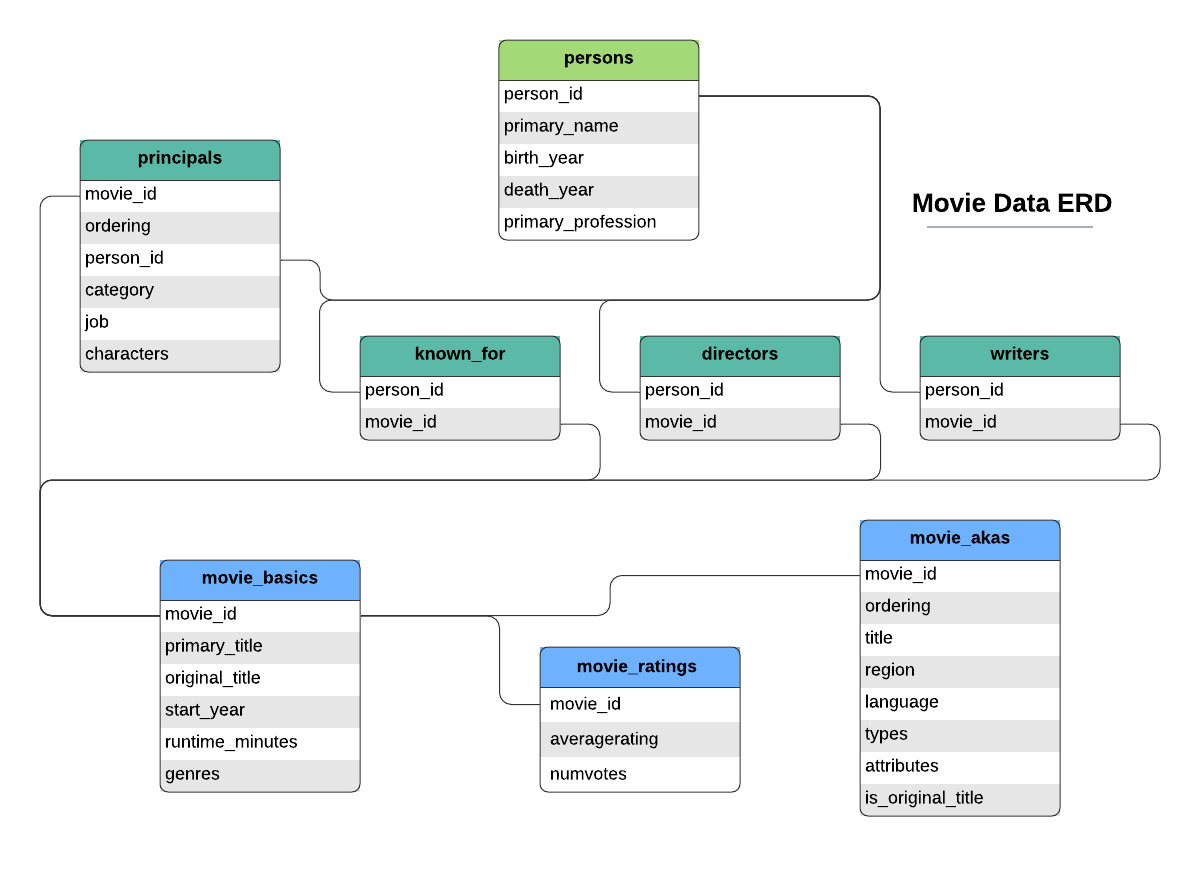

In [14]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect(imdb_file)
cur = conn.cursor()

In [15]:
# load movie basics
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
print(movie_basics.shape)
movie_basics.head()

(146144, 6)


movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [16]:
# load known for table 
persons = pd.DataFrame(
    data=cur.execute("""SELECT * FROM persons;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
persons.head()

person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator

In [17]:
# load known for table 
principals = pd.DataFrame(
    data=cur.execute("""SELECT * FROM principals;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
principals.head()

movie_id  ordering  person_id  category       job        characters
0  tt0111414         1  nm0246005     actor      None       ["The Man"]
1  tt0111414         2  nm0398271  director      None              None
2  tt0111414         3  nm3739909  producer  producer              None
3  tt0323808        10  nm0059247    editor      None              None
4  tt0323808         1  nm3579312   actress      None  ["Beth Boothby"]

In [18]:
# Define the SQL query
sql_query = """
    SELECT mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres,
           p.primary_name, pr.category, mr.averagerating, mr.numvotes
    FROM movie_basics mb
    JOIN principals pr ON mb.movie_id = pr.movie_id
    JOIN persons p ON pr.person_id = p.person_id
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
"""

# Execute the SQL query and fetch the results into a DataFrame
movie_data = pd.read_sql_query(sql_query, conn)
conn.close()

In [19]:
movie_data.head(20)

movie_id                    primary_title              original_title  \
0   tt0063540                        Sunghursh                   Sunghursh   
1   tt0063540                        Sunghursh                   Sunghursh   
2   tt0063540                        Sunghursh                   Sunghursh   
3   tt0063540                        Sunghursh                   Sunghursh   
4   tt0063540                        Sunghursh                   Sunghursh   
5   tt0063540                        Sunghursh                   Sunghursh   
6   tt0063540                        Sunghursh                   Sunghursh   
7   tt0063540                        Sunghursh                   Sunghursh   
8   tt0063540                        Sunghursh                   Sunghursh   
9   tt0063540                        Sunghursh                   Sunghursh   
10  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
11  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
12  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
13  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
14  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
15  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
16  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
17  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
18  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
19  tt0069049       The Other Side of the Wind  The Other Side of the Wind   

    start_year  runtime_minutes              genres         primary_name  \
0         2013            175.0  Action,Crime,Drama              Naushad   
1         2013            175.0  Action,Crime,Drama           Abrar Alvi   
2         2013            175.0  Action,Crime,Drama               Gulzar   
3         2013            175.0  Action,Crime,Drama          Dilip Kumar   
4         2013            175.0  Action,Crime,Drama        Sanjeev Kumar   
5         2013            175.0  Action,Crime,Drama  Harnam Singh Rawail   
6         2013            175.0  Action,Crime,Drama         Balraj Sahni   
7         2013            175.0  Action,Crime,Drama       Vyjayanthimala   
8         2013            175.0  Action,Crime,Drama       Mahasweta Devi   
9         2013            175.0  Action,Crime,Drama        Anjana Rawail   
10        2019            114.0     Biography,Drama            Mani Kaul   
11        2019            114.0     Biography,Drama          Aruna Irani   
12        2019            114.0     Biography,Drama         Arun Khopkar   
13        2019            114.0     Biography,Drama         K.K. Mahajan   
14        2019            114.0     Biography,Drama         Rekha Sabnis   
15        2019            114.0     Biography,Drama          Om Shivpuri   
16        2019            114.0     Biography,Drama         Jaidev Verma   
17        2018            122.0               Drama         Orson Welles   
18        2018            122.0               Drama    Peter Bogdanovich   
19        2018            122.0               Drama          John Huston   

           category  averagerating  numvotes  
0          composer            7.0        77  
1            writer            7.0        77  
2            writer            7.0        77  
3             actor            7.0        77  
4             actor            7.0        77  
5          director            7.0        77  
6             actor            7.0        77  
7           actress            7.0        77  
8            writer            7.0        77  
9            writer            7.0        77  
10         director            7.2        43  
11          actress            7.2        43  
12            actor            7.2        43  
13  cinematographer            7.2        43  
14          actress            7.2        43  
15            act

In [20]:
#extra files
directory_extra = './extraData'
dir_extracted_extra = list_and_extract_files(directory_extra)

All files: 
 ['unzipped', 'golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
Zipped files: 
 ['golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
zipped data  golden_globe_awards.zip  extracted successfully into ./extraData/unzipped
zipped data  tmdb_5000.zip  extracted successfully into ./extraData/unzipped


In [21]:
oscars_df = pd.read_csv(os.path.join(dir_extracted_extra, 'golden_globe_awards.csv'))
oscars_df.head()

year_film  year_award  ceremony  \
0       1943        1944         1   
1       1943        1944         1   
2       1943        1944         1   
3       1943        1944         1   
4       1943        1944         1   

                                            category                 nominee  \
0  Best Performance by an Actress in a Supporting...          Katina Paxinou   
1  Best Performance by an Actor in a Supporting R...           Akim Tamiroff   
2                     Best Director - Motion Picture              Henry King   
3                                            Picture  The Song Of Bernadette   
4                          Actress In A Leading Role          Jennifer Jones   

                      film   win  
0  For Whom The Bell Tolls  True  
1  For Whom The Bell Tolls  True  
2   The Song Of Bernadette  True  
3                      NaN  True  
4   The Song Of Bernadette  True

In [22]:
golden_globes_df = pd.read_csv(os.path.join(dir_extracted_extra, 'the_oscar_award.csv'))
golden_globes_df.head()

year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False

In [23]:
movies_meta_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_movies.csv'), low_memory=False)
movies_meta_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [24]:
movie_credits_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_credits.csv'), low_memory=False)
movie_credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [25]:
movie_content_rating_df = pd.read_csv(os.path.join(dir_extracted_extra, 'movie_metadata_with_R.csv'))
movie_content_rating_df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

## 3.3. Merging Data Frames.

* We'll filter by year IMDB base, drop NaNs, reshape columns to include cast, writers, producers, directors.
* We'll merge TMDB with Oscar/GG and remove duplicates, filter by year, filter by columns, drop NaNs.
* For Content Rating, we'll drop NaNs and remove duplicates.

### 3.3.1. Cleaning  IMDB Dataframe. 
We'll remove extra long movies and movies with very few votes.
We then filter it by year.

In [26]:
# max runtime value is 51420.000000, we need to cap movie duration at a reasonable length (say 4 hours)
max_runtime_min = 240;
movie_data = movie_data[(movie_data['start_year']>=2000) & (movie_data['runtime_minutes']<max_runtime_min)]
movie_data_clean = movie_data.dropna().copy()
movie_data_clean.shape

(563673, 10)

In [27]:
# filter the DataFrame for each crew category
actors_df = movie_data_clean[movie_data_clean['category'].isin(['actor', 'actress'])]
producers_df = movie_data_clean[movie_data_clean['category'] == 'producer']
writers_df = movie_data_clean[movie_data_clean['category'] == 'writer']
directors_df = movie_data_clean[movie_data_clean['category'] == 'director']

# aggregate crew members for each movie
actors_aggregated = actors_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='cast_names')
producers_aggregated = producers_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='producers')
writers_aggregated = writers_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='writers')
directors_aggregated = directors_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='directors')

# merge the aggregated DataFrames with the original DataFrame
merged_df = pd.merge(movie_data_clean, actors_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, producers_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, writers_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, directors_aggregated, on='movie_id', how='left')
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['movie_id'])
# display the merged DataFrame
cols_of_interest = ['movie_id', 'primary_title', 'start_year', 'averagerating', \
                    'numvotes', 'runtime_minutes', 'genres',
                   'cast_names','producers', 'writers', 'directors']
imdb_df = merged_df_no_duplicates[cols_of_interest].copy()
imdb_df.rename(columns={'primary_title': 'title', 'start_year':'year', \
                           'averagerating':'avg_rating', 'numvotes':'total_votes', 
                          'runtime_minutes':'duration_min'}, \
                  inplace=True)

# release memory
del merged_df_no_duplicates
del merged_df
del movie_data_clean
del movie_data

imdb_df.describe()

year    avg_rating   total_votes  duration_min
count  65573.000000  65573.000000  6.557300e+04  65573.000000
mean    2014.258506      6.319125  3.961614e+03     93.399631
std        2.600042      1.458392  3.212259e+04     22.361049
min     2010.000000      1.000000  5.000000e+00      3.000000
25%     2012.000000      5.500000  1.600000e+01     81.000000
50%     2014.000000      6.500000  6.200000e+01     91.000000
75%     2016.000000      7.300000  3.530000e+02    104.000000
max     2019.000000     10.000000  1.841066e+06    239.000000

Additional big cleanup/adjustment for the IMDB is genre splitting. We're going to split the genres into 3 columns:
`genre1` and `genre2`. We then check the vote histogram distribution for the genres and filter out genres with lesser amount of votes. 

In [28]:
# See what we're dealing with.
(imdb_df.genres).value_counts

<bound method IndexOpsMixin.value_counts of 0                 Action,Crime,Drama
10                   Biography,Drama
17                             Drama
27              Comedy,Drama,Fantasy
37        Adventure,Animation,Comedy
                     ...            
563635                         Drama
563645                   Documentary
563647                   Documentary
563657                  Drama,Family
563666                   Documentary
Name: genres, Length: 65573, dtype: object>

In [29]:
# split the genres column by comma and expand it into two separate columns
genre_split = imdb_df['genres'].str.split(',', expand=True)

# assign the first two columns of the genre_split DataFrame to new columns in df
imdb_df['genre1'] = genre_split[0]
imdb_df['genre2'] = genre_split[1]

# replace 'None' values in genre2 column with corresponding values from genre1 column
imdb_df['genre2'].fillna(imdb_df['genre1'], inplace=True)

# drop the original genres column
imdb_df.drop(columns=['genres'], inplace=True)
imdb_df['genre1'] = imdb_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
imdb_df['genre2'] = imdb_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')

imdb_df.head()

movie_id                            title  year  avg_rating  total_votes  \
0   tt0063540                        Sunghursh  2013         7.0           77   
10  tt0066787  One Day Before the Rainy Season  2019         7.2           43   
17  tt0069049       The Other Side of the Wind  2018         6.9         4517   
27  tt0100275         The Wandering Soap Opera  2017         6.5          119   
37  tt0137204                  Joe Finds Grace  2017         8.1          263   

    duration_min                                         cast_names  \
0          175.0  Dilip Kumar, Sanjeev Kumar, Balraj Sahni, Vyja...   
10         114.0  Aruna Irani, Arun Khopkar, Rekha Sabnis, Om Sh...   
17         122.0  Peter Bogdanovich, John Huston, Susan Strasber...   
27          80.0  Luis Alarcón, Francisco Reyes, Patricia Rivade...   
37          83.0  C. Ernst Harth, Chilton Crane, Anthony Harriso...   

                                    producers  \
0                                         NaN   
10                                        NaN   
17           Frank Marshall, Filip Jan Rymsza   
27                   Leo Kocking, Andrés Racz   
37  Ron Chartier, Ingrid Kenning, Jim Wallace   

                                              writers  \
0   Abrar Alvi, Gulzar, Mahasweta Devi, Anjana Rawail   
10                                                NaN   
17                                                NaN   
27                                            Pía Rey   
37                                                NaN   

                        directors     genre1     genre2  
0             Harnam Singh Rawail     Action      Crime  
10                      Mani Kaul  Biography      Drama  
17                   Orson Welles      Drama      Drama  
27  Raoul Ruiz, Valeria Sarmiento     Comedy      Drama  
37                            NaN  Adventure  Animation

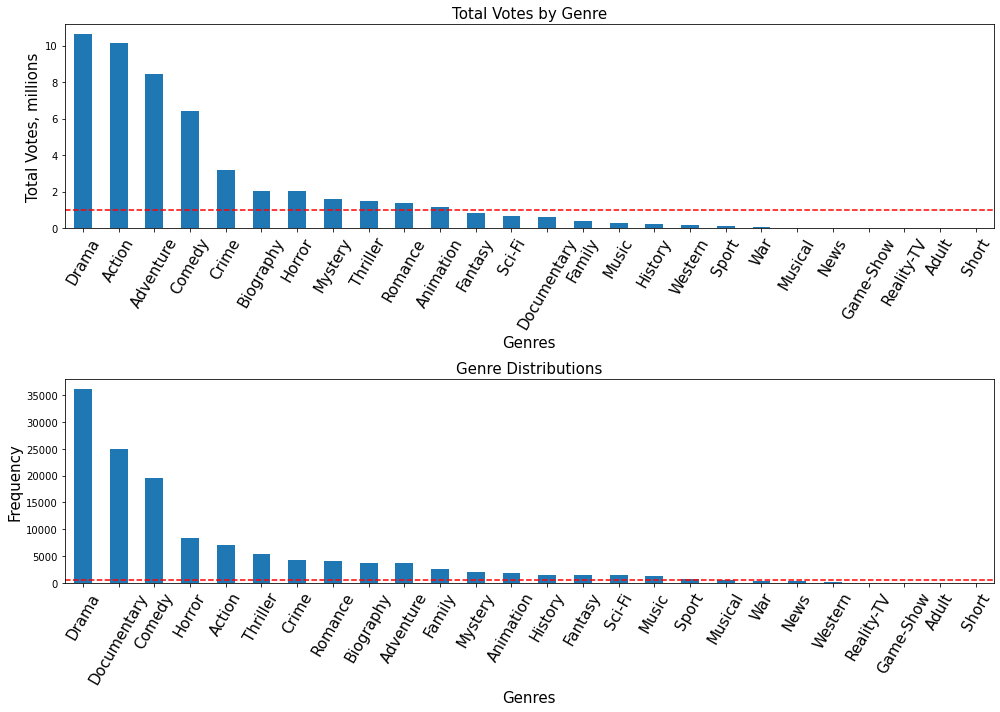

In [30]:
# Next step: combine genre1, genre2 into one column and plot vote distribution.
# This will give us an idea what are the popular genres we should be looking into.

# Extract genre1 and votes from imdb_clean
df1 = imdb_df[['genre1', 'total_votes']].rename(columns={'genre1': 'genre'})

# Extract genre2 and votes from imdb_clean
df2 = imdb_df[['genre2', 'total_votes']].rename(columns={'genre2': 'genre'})

# Concatenate horizontally
concatenated_df = pd.concat([df1, df2])
concatenated_df['total_votes'] = concatenated_df['total_votes']/1e+07

# Group by genre and sum up votes
grouped_df = concatenated_df.groupby('genre')['total_votes'].sum()
sorted_df = grouped_df.sort_values(ascending= False)

fig, axes = plt.subplots(2, 1, figsize=(14, 10)) 

sorted_df.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Genres', fontsize=15)
axes[0].set_ylabel('Total Votes, millions', fontsize=15)
axes[0].set_title('Total Votes by Genre', fontsize=15)
axes[0].tick_params(axis='x', rotation=60, labelsize=15) 
axes[0].axhline(y=1, color='r', linestyle='--')
plt.tight_layout()

#genre distribution
genre_counts = concatenated_df['genre'].value_counts()

genre_counts.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Genres', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)
axes[1].set_title('Genre Distributions', fontsize=15)
axes[1].tick_params(axis='x', rotation=60, labelsize=15)
axes[1].axhline(y=500, color='r', linestyle='--')

plt.tight_layout()

### 3.3.2. Cleaning Movie Budget Dataframe.
We'll add `year` column to filter out everything before 2000. Then we'll add `net_profit` and `roi` as the raw profit and the return on investment percentage of budget.

In [31]:
# df info
movie_budgets_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [32]:
# add year column
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df['month'] = movie_budgets_df['release_date'].dt.month

# function will strip $ and , then convert to numeric
def profits_str2num(profit_col):
    cleaned_str = profit_col.str.replace("$", "").str.replace(",", "")
    cleaned_num = pd.to_numeric(cleaned_str, errors='coerce')
    return cleaned_num
    

# add 'net_profit' and 'roi' columns
gross_numeric = profits_str2num(movie_budgets_df.worldwide_gross)
budget_numeric = profits_str2num(movie_budgets_df.production_budget)

# convert values to millions
movie_budgets_df['gross_usd_mil'] = gross_numeric/1e+06
movie_budgets_df['budget_usd_mil'] = budget_numeric/1e+06

movie_budgets_df['net_profit_usd_mil'] = (gross_numeric - budget_numeric)/1e+06
movie_budgets_df['roi_pct'] = 100*(gross_numeric - budget_numeric)/budget_numeric

We'll set the minimum budget to be `$500,000` and the minimum gross at `$0`. 

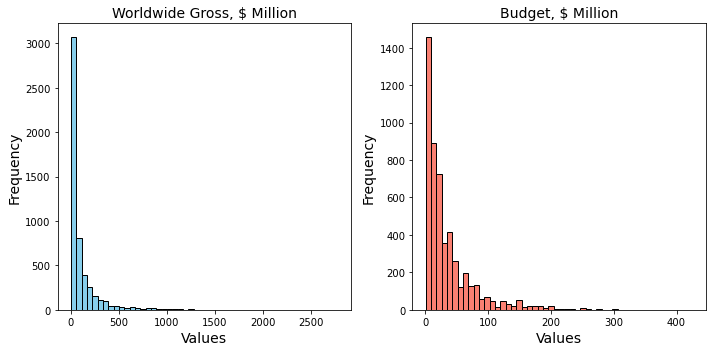

In [33]:
min_budget_mil = 0.5;
min_gross_mil = 0;
movie_budgets_df = movie_budgets_df[(movie_budgets_df['budget_usd_mil'] > min_budget_mil) & \
                          (movie_budgets_df['gross_usd_mil'] > min_gross_mil)].copy()

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the first histogram
axes[0].hist(movie_budgets_df['gross_usd_mil'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Values', fontsize = 14)
axes[0].set_ylabel('Frequency', fontsize = 14)
axes[0].set_title('Worldwide Gross, $ Million', fontsize = 14)

# Plot the second histogram
axes[1].hist(movie_budgets_df['budget_usd_mil'], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Values', fontsize = 14)
axes[1].set_ylabel('Frequency', fontsize = 14)
axes[1].set_title('Budget, $ Million', fontsize = 14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
movie_budgets_df_y2k = movie_budgets_df[movie_budgets_df['year']>=2000]

# select subset of columns then remove nans
cols_of_interest = ['movie', 'year', 'month', 'net_profit_usd_mil', 'budget_usd_mil', 'gross_usd_mil', 'roi_pct']
movie_budgets_df_clean = movie_budgets_df_y2k[cols_of_interest].dropna()

# Rename the 'movie' column to 'title'
movie_budgets_df_clean.rename(columns={'movie':'title'}, inplace=True)
movie_budgets_df_clean.head()

title  year  month  \
0                                       Avatar  2009     12   
1  Pirates of the Caribbean: On Stranger Tides  2011      5   
2                                 Dark Phoenix  2019      6   
3                      Avengers: Age of Ultron  2015      5   
4            Star Wars Ep. VIII: The Last Jedi  2017     12   

   net_profit_usd_mil  budget_usd_mil  gross_usd_mil     roi_pct  
0         2351.345279           425.0    2776.345279  553.257713  
1          635.063875           410.6    1045.663875  154.667286  
2         -200.237650           350.0     149.762350  -57.210757  
3         1072.413963           330.6    1403.013963  324.384139  
4          999.721747           317.0    1316.721747  315.369636

### 3.3.3. Combining IMDB and Budget Dataframes.

Let's see how much movie title cleaning we might need to do before merging.

In [35]:
# how many movie titles from budget df are NOT present in IMDB df
movie_budgets_df_clean[~movie_budgets_df_clean['title'].isin(imdb_df.title)]

title  year  month  \
4              Star Wars Ep. VIII: The Last Jedi  2017     12   
5           Star Wars Ep. VII: The Force Awakens  2015     12   
7     Pirates of the Caribbean: At Worldâs End  2007      5   
15                                  Spider-Man 3  2007      5   
19        Harry Potter and the Half-Blood Prince  2009      7   
...                                          ...   ...    ...   
5394                                      B-Girl  2010      1   
5400                       That Way Madness Lies  2018     12   
5403                                 Starsuckers  2009     12   
5410                               Mercy Streets  2000     10   
5412                                Arnolds Park  2007     10   

      net_profit_usd_mil  budget_usd_mil  gross_usd_mil     roi_pct  
4             999.721747          317.00    1316.721747  315.369636  
5            1747.311220          306.00    2053.311220  571.016739  
7             663.420425          300.00     963.420425  221.140142  
15            636.860230          258.00     894.860230  246.845050  
19            685.213767          250.00     935.213767  274.085507  
...                  ...             ...            ...         ...  
5394           -0.698840            0.70       0.001160  -99.834286  
5400           -0.648553            0.65       0.001447  -99.777385  
5403           -0.625188            0.64       0.014812  -97.685625  
5410           -0.426401            0.60       0.173599  -71.066833  
5412           -0.576384            0.60       0.023616  -96.064000  

[2148 rows x 7 columns]

In [36]:
# Uh-oh, some heavy-hitters didn't make it. Can't believe Avatar didn't make it!
movie_basics[movie_basics.primary_title.str.contains('Avatar')]
# confirming we widn't yank out the most expesive movie accidentally

movie_id                primary_title               original_title  \
1795    tt10168040              My Avatar Horse              My Avatar Horse   
4315    tt10403262              Xbox Avatar Fun              Xbox Avatar Fun   
11392    tt1630029                     Avatar 2                     Avatar 2   
16337    tt1757678                     Avatar 3                     Avatar 3   
17060    tt1775309                       Avatar                        Abatâ   
20368    tt1854506           Aliens vs. Avatars           Aliens vs. Avatars   
34245    tt2271191       Avatars as Prostitutes       Avatars as Prostitutes   
52213    tt3095356                     Avatar 4                     Avatar 4   
68178    tt3879186  Avatarii: Birth of a Fandom  Avatarii: Birth of a Fandom   
77990    tt4472992            Avatarachi Goshta            Avatarachi Goshta   
82231    tt4727514              The Last Avatar              The Last Avatar   
88870    tt5141528                     Avataran                     Avataran   
96592    tt5637536                     Avatar 5                     Avatar 5   
112823   tt6620864           The Avatar Project           The Avatar Project   

        start_year  runtime_minutes                       genres  
1795          2012              NaN                        Drama  
4315          2019              NaN                       Action  
11392         2021              NaN     Action,Adventure,Fantasy  
16337         2023              NaN       Action,Adventure,Drama  
17060         2011             93.0                       Horror  
20368         2011             80.0                Horror,Sci-Fi  
34245         2012             51.0  Animation,Documentary,Drama  
52213         2025              NaN     Action,Adventure,Fantasy  
68178         2014              NaN                  Documentary  
77990         2014            118.0                        Drama  
82231         2014             90.0                        Drama  
88870         2016              NaN                       Sci-Fi  
96592         2027              NaN     Action,Adventure,Fantasy  
112823        2017             66.0                     Thriller

Supplimentary functions to clean movie titles in both tables and find closest match within movie release year.

In [37]:
# stripping titles and finding closest match
import string
from difflib import SequenceMatcher

# function to preprocess title
def preprocess_title(title):
    # remove punctuation and convert to lowercase
    title = title.translate(str.maketrans('', '', string.punctuation)).lower()
    return title

# function to find the closest match between row (name) and df2 (column)
def find_closest_match(row, df2):
    #select subset of a year 
    df2_subset = df2[df2['year'] == row['year']]
    string1 = row['title_preprocessed']
    # List to store similarity ratios
    ratios = []
    
    # iterate over each title in df2_subset
    for title in df2_subset['title_preprocessed']:
        # Create a SequenceMatcher object
        matcher = SequenceMatcher(None, string1, title)
        # Calculate similarity ratio and append to ratios list
        ratios.append(matcher.ratio())
    # if not empty 
    if ratios:
        # find index of highest similarity ratio
        max_index = ratios.index(max(ratios))
        # return the title corresponding to the highest similarity ratio
        closest_title = df2_subset.iloc[max_index]['title_preprocessed']
        return closest_title
    else:
        return None

# add preprocessed title for both dataframes
movie_budgets_df_clean.loc[:, 'title_preprocessed'] = movie_budgets_df_clean['title'].apply(preprocess_title).copy()
imdb_df.loc[:, 'title_preprocessed'] = imdb_df['title'].apply(preprocess_title).copy()

# find titles not found in IMDb
found_in_imdb_df = movie_budgets_df_clean

In [38]:
# find closest match
found_in_imdb_df.loc[:, 'closest_match'] = \
    movie_budgets_df_clean.apply(find_closest_match, args=(imdb_df,), axis=1)

In [39]:
budget_cols = ['month','closest_match', 'net_profit_usd_mil', 'budget_usd_mil', \
               'gross_usd_mil', 'roi_pct',]
imdb_budget_df = pd.merge(found_in_imdb_df[budget_cols], imdb_df, \
                     left_on='closest_match', right_on='title_preprocessed', how='inner')

In [40]:
# display the merged dataframe
imdb_budget_df.head()

month                               closest_match  net_profit_usd_mil  \
0      5  pirates of the caribbean on stranger tides          635.063875   
1      6                                dark phoenix         -200.237650   
2      5                      avengers age of ultron         1072.413963   
3     12                     star wars the last jedi          999.721747   
4     12    star wars episode vii  the force awakens         1747.311220   

   budget_usd_mil  gross_usd_mil     roi_pct   movie_id  \
0           410.6    1045.663875  154.667286  tt1298650   
1           350.0     149.762350  -57.210757  tt6565702   
2           330.6    1403.013963  324.384139  tt2395427   
3           317.0    1316.721747  315.369636  tt2527336   
4           306.0    2053.311220  571.016739  tt2488496   

                                         title  year  avg_rating  total_votes  \
0  Pirates of the Caribbean: On Stranger Tides  2011         6.6       447624   
1                                 Dark Phoenix  2019         6.0        24451   
2                      Avengers: Age of Ultron  2015         7.3       665594   
3                     Star Wars: The Last Jedi  2017         7.1       462903   
4   Star Wars: Episode VII - The Force Awakens  2015         8.0       784780   

   duration_min                                         cast_names  \
0         136.0  Johnny Depp, Geoffrey Rush, Penélope Cruz, Ian...   
1         113.0  Nicholas Hoult, James McAvoy, Michael Fassbend...   
2         141.0  Robert Downey Jr., Chris Evans, Mark Ruffalo, ...   
3         152.0  Carrie Fisher, Mark Hamill, John Boyega, Daisy...   
4         136.0  Oscar Isaac, Domhnall Gleeson, John Boyega, Da...   

                       producers  \
0                            NaN   
1                            NaN   
2                    Kevin Feige   
3  Kathleen Kennedy, Ram Bergman   
4   Kathleen Kennedy, Bryan Burk   

                                             writers      directors  genre1  \
0  Stuart Beattie, Ted Elliott, Tim Powers, Terry...   Rob Marshall  Action   
1  John Byrne, Jack Kirby, Stan Lee, Chris Clarem...  Simon Kinberg  Action   
2       Jack Kirby, Stan Lee, Joe Simon, Jim Starlin    Joss Whedon  Action   
3                                       George Lucas   Rian Johnson  Action   
4       George Lucas, Lawrence Kasdan, Michael Arndt    J.J. Abrams  Action   

      genre2                          title_preprocessed  
0  Adventure  pirates of the caribbean on stranger tides  
1  Adventure                                dark phoenix  
2  Adventure                      avengers age of ultron  
3  Adventure                     star wars the last jedi  
4  Adventure    star wars episode vii  the force awakens

### 3.3.4. Cleaning Content Rating Dataframe

We'll split genres, filter by year, filter by relevant columns. 

In [41]:
movie_content_rating_df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [42]:
# Split the genres column by comma and expand it into two separate columns
genre_split = movie_content_rating_df['genres'].str.split('|', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
movie_content_rating_df['genre1'] = genre_split[0]
movie_content_rating_df['genre2'] = genre_split[1]
# replace Science Fiction and replace with Sci-Fi
movie_content_rating_df['genre1'] = movie_content_rating_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
movie_content_rating_df['genre2'] = movie_content_rating_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')

movie_content_rating_df = movie_content_rating_df[movie_content_rating_df['title_year']>=2000]
movie_content_rating_df = movie_content_rating_df.drop_duplicates(subset=['budget', 'title_year'], keep='first')
cols_to_keep = ['genre1', 'genre2', 'content_rating', 'budget', 'gross']
content_rating_df = movie_content_rating_df[cols_to_keep]

In [43]:
content_rating_clean_df = content_rating_df.dropna().copy()
content_rating_clean_df['net_profit'] = content_rating_clean_df['gross'] - content_rating_clean_df['budget']
content_rating_clean_df['net_profit_usd_mil'] = content_rating_clean_df['net_profit']/1e+06
content_rating_clean_df['gross_usd_mil'] = content_rating_clean_df['gross']/1e+06
content_rating_clean_df['budget_usd_mil'] = content_rating_clean_df['budget']/1e+06
content_rating_clean_df.shape

(1114, 9)

### 3.3.5. Cleaning TMDB Dataframe

We'll start with merging movie info (budget, profit) with movie metadata(cast, crew).
We'll split genres into subgenres, extract cast and crew names, filter by year.
We'll add a count of critically acclaimed cast or crew members to TMDB dataframe.
As last step, we keep relevant columns, remove duplicates and drop NaNs.

In [44]:
movies_meta_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [45]:
movie_credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [46]:
subset_cols = ['id', 'budget', 'genres', 'original_language', 'original_title', \
               'release_date', 'revenue', 'vote_average', 'vote_count', 'runtime'] 
movies_meta_subset_df = movies_meta_df[subset_cols].copy()

In [47]:
#merge dataframes, 
movies_meta_subset_df['id'] = movies_meta_subset_df['id'].astype(str)
movie_credits_df['id'] = movie_credits_df['movie_id'].astype(str)

tmdb_movies_rated_df = pd.merge(movies_meta_subset_df, movie_credits_df, on='id', how='inner')
tmdb_movies_rated_df.loc[tmdb_movies_rated_df['budget'].astype(int) <= 0, 'budget'] = None
tmdb_movies_rated_df.loc[tmdb_movies_rated_df['revenue'] <= 0, 'revenue'] = None
tmdb_movies_rated_df = tmdb_movies_rated_df.drop_duplicates(subset=['id', 'release_date'], keep='first')
tmdb_movies_rated_df.dropna(inplace=True)
tmdb_movies_rated_df.shape

(3229, 14)

In [48]:
#write function to implement above change
import ast

def get_first_n_cast_names(row, n):
    list_of_cast_dicts = ast.literal_eval(row) 
    # Use list comprehension to extract the first n names and join them
    first_n_names = ", ".join(dictionary['name'] for dictionary in list_of_cast_dicts[:n])
    return first_n_names


def get_names_crew(row, jobRole):
    # Convert the string representation of list of dictionaries back to a list of dictionaries
    list_of_crew_dicts = ast.literal_eval(row)
    # Use list comprehension to filter and extract names of crew members with the specified job role
    crew_names = ", ".join(dictionary['name'] for dictionary in list_of_crew_dicts if dictionary.get('job') == jobRole) 
    return crew_names

tmdb_movies_rated_df['release_date'] = pd.to_datetime(tmdb_movies_rated_df['release_date'])
tmdb_movies_rated_df['year'] = tmdb_movies_rated_df['release_date'].dt.year.astype(int)
tmdb_movies_rated_df['month'] = tmdb_movies_rated_df['release_date'].dt.month.astype(int)

y2k_df = tmdb_movies_rated_df[tmdb_movies_rated_df['year']>=2000].copy()
y2k_df.head()

id       budget                                             genres  \
0   19995  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     285  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  206647  245000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3   49026  250000000.0  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4   49529  260000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

  original_language                            original_title release_date  \
0                en                                    Avatar   2009-12-10   
1                en  Pirates of the Caribbean: At World's End   2007-05-19   
2                en                                   Spectre   2015-10-26   
3                en                     The Dark Knight Rises   2012-07-16   
4                en                               John Carter   2012-03-07   

        revenue  vote_average  vote_count  runtime  movie_id  \
0  2.787965e+09           7.2       11800    162.0     19995   
1  9.610000e+08           6.9        4500    169.0       285   
2  8.806746e+08           6.3        4466    148.0    206647   
3  1.084939e+09           7.6        9106    165.0     49026   
4  2.841391e+08           6.1        2124    132.0     49529   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  year  month  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009     12  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007      5  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015     10  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012      7  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012      3

In [49]:
# Apply the function to the cast column containing lists of dictionaries
y2k_df['cast_names'] = y2k_df['cast'].apply(get_first_n_cast_names, args=(10,))

In [50]:
# Apply the function to the crew column containing lists of dictionaries
y2k_df['producer'] = y2k_df['crew'].apply(get_names_crew, args=('Producer',))
y2k_df['director'] = y2k_df['crew'].apply(get_names_crew, args=('Director',))
y2k_df['screenplay'] = y2k_df['crew'].apply(get_names_crew, args=('Screenplay',))

In [51]:
# Apply the function to the genres column containing lists of dictionaries
y2k_df['genres'] = y2k_df['genres'].apply(get_first_n_cast_names, args=(3,))

In [52]:
y2k_df.head()

id       budget                              genres original_language  \
0   19995  237000000.0          Action, Adventure, Fantasy                en   
1     285  300000000.0          Adventure, Fantasy, Action                en   
2  206647  245000000.0            Action, Adventure, Crime                en   
3   49026  250000000.0                Action, Crime, Drama                en   
4   49529  260000000.0  Action, Adventure, Science Fiction                en   

                             original_title release_date       revenue  \
0                                    Avatar   2009-12-10  2.787965e+09   
1  Pirates of the Caribbean: At World's End   2007-05-19  9.610000e+08   
2                                   Spectre   2015-10-26  8.806746e+08   
3                     The Dark Knight Rises   2012-07-16  1.084939e+09   
4                               John Carter   2012-03-07  2.841391e+08   

   vote_average  vote_count  runtime  movie_id  \
0           7.2       11800    162.0     19995   
1           6.9        4500    169.0       285   
2           6.3        4466    148.0    206647   
3           7.6        9106    165.0     49026   
4           6.1        2124    132.0     49529   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  year  month  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009     12   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007      5   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015     10   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012      7   
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012      3   

                                          cast_names  \
0  Sam Worthington, Zoe Saldana, Sigourney Weaver...   
1  Johnny Depp, Orlando Bloom, Keira Knightley, S...   
2  Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...   
3  Christian Bale, Michael Caine, Gary Oldman, An...   
4  Taylor Kitsch, Lynn Collins, Samantha Morton, ...   

                                            producer           director  \
0                          James Cameron, Jon Landau      James Cameron   
1  Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...     Gore Verbinski   
2                Barbara Broccoli, Michael G. Wilson         Sam Mendes   
3      Charles Roven, Christopher Nolan, Emma Thomas  Christopher Nolan   
4          Colin Wilson, Jim Morris, Lindsey Collins     Andrew Stanton   

                                          screenplay  
0                                      James Cameron  
1                          Ted Elliott, Terry Rossio  
2  John Logan, Robert Wade, Neal Purvis, Jez Butt...  
3                  Christopher Nolan, Jonathan Nolan  
4       Andrew Stanton, Michael Chabon, Mark Andrews

In [53]:
oscars_df.dropna(inplace=True)
oscars_df.head()

year_film  year_award  ceremony  \
0       1943        1944         1   
1       1943        1944         1   
2       1943        1944         1   
4       1943        1944         1   
5       1943        1944         1   

                                            category         nominee  \
0  Best Performance by an Actress in a Supporting...  Katina Paxinou   
1  Best Performance by an Actor in a Supporting R...   Akim Tamiroff   
2                     Best Director - Motion Picture      Henry King   
4                          Actress In A Leading Role  Jennifer Jones   
5                            Actor In A Leading Role      Paul Lukas   

                      film   win  
0  For Whom The Bell Tolls  True  
1  For Whom The Bell Tolls  True  
2   The Song Of Bernadette  True  
4   The Song Of Bernadette  True  
5       Watch On The Rhine  True

In [54]:
golden_globes_df.dropna(inplace=True)
golden_globes_df.head()

year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False

In [55]:
# get winners and nominants from awards frames
categories_of_interest = ['actress', 'actor', 'directing', 'director', 'writing', 'screenplay', \
                          'producer']
oscars_df['category'] = oscars_df['category'].str.lower()
golden_globes_df['category'] = golden_globes_df['category'].str.lower()

oscars_df = oscars_df[oscars_df['category'].str.contains('|'.join(categories_of_interest), case=False)]
golden_globes_df_filtered = golden_globes_df[golden_globes_df['category'].isin(categories_of_interest)]

In [56]:
import re
winners_oscar_df = oscars_df[oscars_df['win'] == True]
nominated_oscar_df = oscars_df[oscars_df['win'] == False]

# golden_globes_df['nominee_name'] = golden_globes_df['name'].str.replace(" ", "")
winners_gg_df = golden_globes_df[golden_globes_df['winner'] == True]
nominated_gg_df = golden_globes_df[golden_globes_df['winner'] == False]

## define a pattern to match entries with two words
pattern = r'^\s*\w+\s+\w+\s*$'

# filter the list to keep only entries matching the pattern
filtered_list_gg_winner = [entry for entry in winners_gg_df['name'] if re.match(pattern, entry.lower())]
filtered_list_gg_nominee = [entry for entry in nominated_gg_df['name'] if re.match(pattern, entry.lower())]

In [57]:
# create a set of names of everyone who won an Oscar or Golden Globe
all_winners_set = set(filtered_list_gg_winner + list(winners_oscar_df['nominee'].str.lower()))
# create a set of names of everyone who got nominated for an Oscar or Golden Globe
all_nominated_set = set(filtered_list_gg_nominee + list(nominated_oscar_df['nominee'].str.lower()))

In [58]:
# check if name was in awards list
def check_nominated_characters(names_string, awards_list):
    if pd.isna(names_string):
        return 0
    name_list = [name.strip().lower() for name in names_string.split(',')]
    award_count = 0;
    for n in name_list:
        if n in awards_list:
            award_count += 1
    return award_count

In [59]:
# Apply the function to the cast, crew and create a new column indicating whether any cast/crew was nominated
y2k_df['cast_nominated'] = y2k_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['cast_awarded'] = y2k_df['cast_names'].apply(check_nominated_characters, args=(all_winners_set,))

In [60]:
# Check if crew members were nominated or awarded
y2k_df['producer_nominated'] = y2k_df['producer'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['director_nominated'] = y2k_df['director'].apply(check_nominated_characters, args=(all_nominated_set,))
y2k_df['screenplay_nominated'] = y2k_df['screenplay'].apply(check_nominated_characters, args=(all_nominated_set,))

# Check if each cast member was awarded
y2k_df['producer_awarded'] = y2k_df['producer'].apply(check_nominated_characters, args=(all_winners_set,))
y2k_df['director_awarded'] = y2k_df['director'].apply(check_nominated_characters, args=(all_winners_set,))
y2k_df['screenplay_awarded'] = y2k_df['screenplay'].apply(check_nominated_characters, args=(all_winners_set,))

# Split the genres column by comma and expand it into two separate columns
genre_split = y2k_df['genres'].str.split(',', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
y2k_df['genre1'] = genre_split[0].str.strip(' ').copy()
# If the genre_split DataFrame has less than two columns, fill NaN in genre2 column
if len(genre_split.columns) < 2:
    y2k_df['genre2'] = ''
else:
    y2k_df['genre2'] = genre_split[1].str.strip(' ').copy()

# replace Science Fiction and replace with Sci-Fi
y2k_df['genre1'] = y2k_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
y2k_df['genre2'] = y2k_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')


columns_to_keep = ['genre1', 'genre2', 'original_title', \
                   'vote_average', 'vote_count', 'runtime',
                   'year','month', 'cast_nominated', 'cast_awarded', \
                   'producer_nominated', 'producer_awarded', \
                  'director_nominated', 'director_awarded', \
                  'screenplay_nominated', 'screenplay_awarded', \
                   'cast_names', 'producer', 'director', 'screenplay']

tmdb_clean_df = y2k_df[columns_to_keep].copy()
# convert budget, revenue to millions
tmdb_clean_df.loc[:, 'budget_usd_mil'] = y2k_df['budget']/1e+06
tmdb_clean_df.loc[:, 'gross_usd_mil'] = y2k_df['revenue']/1e+06
# add net profit, roi
tmdb_clean_df.loc[:, 'net_profit_usd_mil'] = (tmdb_clean_df['gross_usd_mil'] - tmdb_clean_df['budget_usd_mil'])
tmdb_clean_df.loc[:, 'roi_pct'] = 100*tmdb_clean_df['net_profit_usd_mil']/tmdb_clean_df['budget_usd_mil']

# add total nominations
tmdb_clean_df['total_nominations'] = tmdb_clean_df['cast_nominated'] + \
    tmdb_clean_df['producer_nominated'] + \
    tmdb_clean_df['director_nominated'] + \
    tmdb_clean_df['screenplay_nominated']

# add total awards
tmdb_clean_df['total_awards'] = tmdb_clean_df['cast_awarded'] + \
                                     tmdb_clean_df['producer_awarded'] + \
                                     tmdb_clean_df['director_awarded'] + \
                                     tmdb_clean_df['screenplay_awarded']
tmdb_clean_df['crew_awards'] =  tmdb_clean_df['producer_awarded'] + \
                                     tmdb_clean_df['director_awarded'] + \
                                     tmdb_clean_df['screenplay_awarded']


tmdb_clean_df.head()

genre1     genre2                            original_title  \
0     Action  Adventure                                    Avatar   
1  Adventure    Fantasy  Pirates of the Caribbean: At World's End   
2     Action  Adventure                                   Spectre   
3     Action      Crime                     The Dark Knight Rises   
4     Action  Adventure                               John Carter   

   vote_average  vote_count  runtime  year  month  cast_nominated  \
0           7.2       11800    162.0  2009     12               1   
1           6.9        4500    169.0  2007      5               4   
2           6.3        4466    148.0  2015     10               5   
3           7.6        9106    165.0  2012      7               7   
4           6.1        2124    132.0  2012      3               5   

   cast_awarded  ...                                           producer  \
0             1  ...                          James Cameron, Jon Landau   
1             4  ...  Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...   
2             2  ...                Barbara Broccoli, Michael G. Wilson   
3             6  ...      Charles Roven, Christopher Nolan, Emma Thomas   
4             2  ...          Colin Wilson, Jim Morris, Lindsey Collins   

            director                                         screenplay  \
0      James Cameron                                      James Cameron   
1     Gore Verbinski                          Ted Elliott, Terry Rossio   
2         Sam Mendes  John Logan, Robert Wade, Neal Purvis, Jez Butt...   
3  Christopher Nolan                  Christopher Nolan, Jonathan Nolan   
4     Andrew Stanton       Andrew Stanton, Michael Chabon, Mark Andrews   

   budget_usd_mil  gross_usd_mil  net_profit_usd_mil      roi_pct  \
0           237.0    2787.965087         2550.965087  1076.356577   
1           300.0     961.000000          661.000000   220.333333   
2           245.0     880.674609          635.674609   259.459024   
3           250.0    1084.939099          834.939099   333.975640   
4           260.0     284.139100           24.139100     9.284269   

  total_nominations total_awards crew_awards  
0                 4            4           3  
1                 4            4           0  
2                 7            3           1  
3                10            6           0  
4                 5            2           0  

[5 rows x 27 columns]

### 3.3.6. Historic trends.
Check historic trends for both datasets.

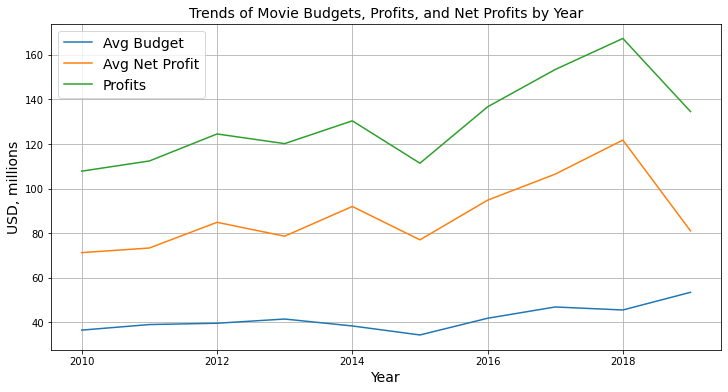

In [61]:
# Historic trends: movie budgets and profits
def plot_historic_trend(df):
    # group by year and aggregate
    grouped_by_year = df.groupby('year').agg({
        'budget_usd_mil': 'mean',
        'net_profit_usd_mil': 'mean',
        'gross_usd_mil': 'mean'
    }).reset_index()

    # melt the df to plot multiple variables
    melted_df = pd.melt(grouped_by_year, id_vars='year', \
                    value_vars=['budget_usd_mil', 'net_profit_usd_mil', 'gross_usd_mil'],
                    var_name='Metric', value_name='Amount')
    
    # Plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted_df, x='year', y='Amount', hue='Metric')
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('USD, millions', fontsize = 14)
    plt.title('Trends of Movie Budgets, Profits, and Net Profits by Year', fontsize = 14)
    plt.legend(['Avg Budget', 'Avg Net Profit', 'Profits'], fontsize = 14)
    plt.grid(True)

    plt.savefig(os.path.join(path_dir_results, 'Historic_Trends_Budget_Profit_plot.jpg'))
    plt.show()


plot_historic_trend(imdb_budget_df)

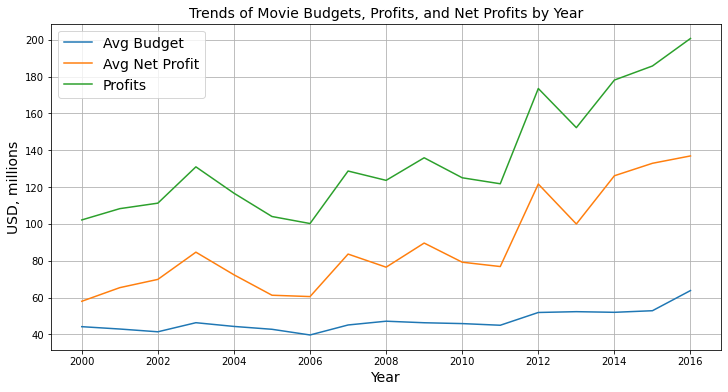

In [62]:
# Historic trends: movie budgets and profits TMDB
plot_historic_trend(tmdb_clean_df)

Looks like `tmdb_clean_df` has the most information but lacks the most recent data. 

### 3.3.8. Check all-time top 10 profitable genres and budgets.

Again' we'll use both `imdb_clean_df` and `tmdb_clean_df` dataframes.

In [63]:
# plots budgets and gross profits by genres 
def plot_budgets_profits_top10(df):
    grouped_by_genre_all_time =\
        df.groupby('genre1').agg({'budget_usd_mil': 'sum', 'gross_usd_mil': 'sum'}).reset_index()

    # sort the df by total budget and total profit in ascending order
    grouped_by_genre_sorted_all_time = \
        grouped_by_genre_all_time.sort_values(by=['budget_usd_mil', 'gross_usd_mil'], ascending=[False, False])
    # calculate average rating for each genre
    top_10_genres_sum = grouped_by_genre_sorted_all_time.head(10).copy()
    top_10_genres_sum.loc[:, 'budget_usd_mil'] = top_10_genres_sum.loc[:, 'budget_usd_mil']/1e+03
    top_10_genres_sum.loc[:, 'gross_usd_mil'] = top_10_genres_sum.loc[:, 'gross_usd_mil']/1e+03

    palette = sns.color_palette("husl", n_colors=len(top_10_genres_sum))

    plt.figure(figsize=(10, 10))
    sns.barplot(x='genre1', y='budget_usd_mil', data=top_10_genres_sum, hue='genre1', \
            palette=palette, dodge=False)
    sns.barplot(x='genre1', y='gross_usd_mil', data=top_10_genres_sum, hue='genre1', \
            palette=palette, alpha=0.5, dodge=False)
    plt.xlabel('USD (millions)', fontsize=18)
    plt.ylabel('Billions', fontsize=18)
    plt.title('All-time Budget and Profit by Genre', fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Add legend only for 'gross_usd_mil' data
    handles, labels = plt.gca().get_legend_handles_labels()
    gross_legend = plt.legend(handles[len(top_10_genres_sum):], labels[len(top_10_genres_sum):], title='Genre', fontsize=15)
    plt.gca().add_artist(gross_legend);
    plt.savefig(os.path.join(path_dir_results, "All-time_Budget_Gross_plot.png"))

    plt.show()

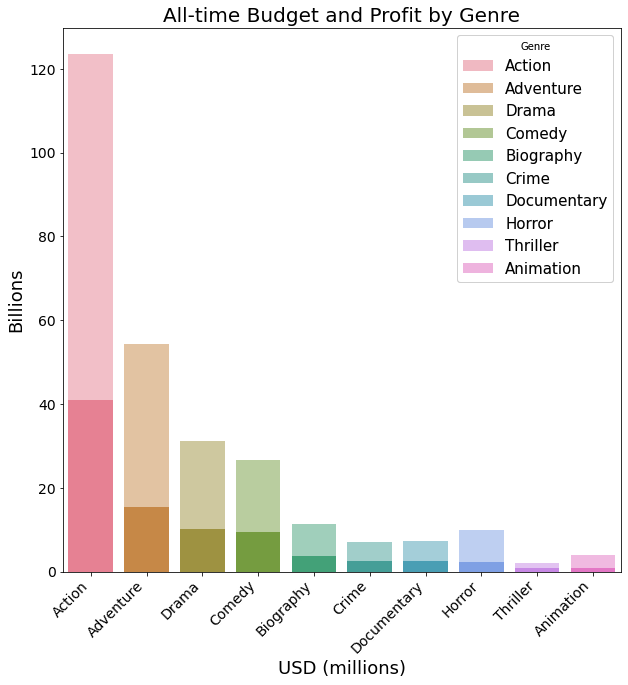

In [64]:
plot_budgets_profits_top10(imdb_budget_df)

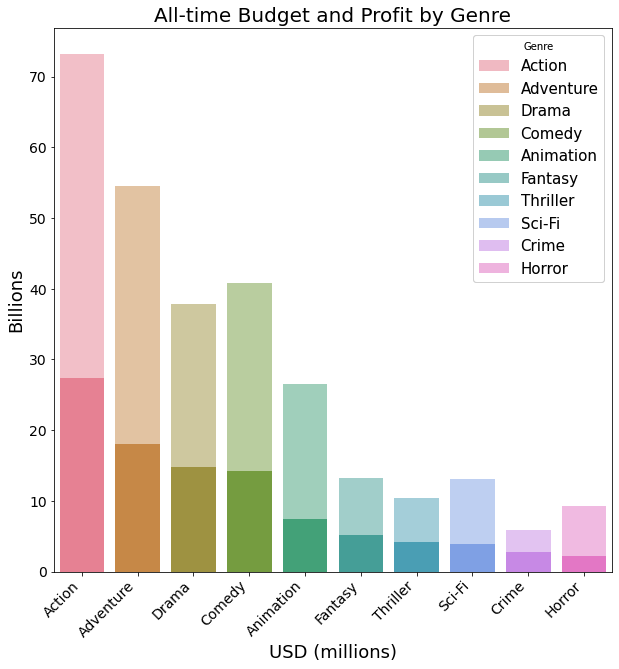

In [65]:
plot_budgets_profits_top10(tmdb_clean_df)

### 3.3.9. Combine two dataframes for budget analysis.
We'll create two slices with identical columns and extract all movie data from `imdb_clean_df` after 2016.
Before we do that, we'll add the nominated/awarded for the `imdb_df`.

In [66]:
imdb_budget_df.head()

month                               closest_match  net_profit_usd_mil  \
0      5  pirates of the caribbean on stranger tides          635.063875   
1      6                                dark phoenix         -200.237650   
2      5                      avengers age of ultron         1072.413963   
3     12                     star wars the last jedi          999.721747   
4     12    star wars episode vii  the force awakens         1747.311220   

   budget_usd_mil  gross_usd_mil     roi_pct   movie_id  \
0           410.6    1045.663875  154.667286  tt1298650   
1           350.0     149.762350  -57.210757  tt6565702   
2           330.6    1403.013963  324.384139  tt2395427   
3           317.0    1316.721747  315.369636  tt2527336   
4           306.0    2053.311220  571.016739  tt2488496   

                                         title  year  avg_rating  total_votes  \
0  Pirates of the Caribbean: On Stranger Tides  2011         6.6       447624   
1                                 Dark Phoenix  2019         6.0        24451   
2                      Avengers: Age of Ultron  2015         7.3       665594   
3                     Star Wars: The Last Jedi  2017         7.1       462903   
4   Star Wars: Episode VII - The Force Awakens  2015         8.0       784780   

   duration_min                                         cast_names  \
0         136.0  Johnny Depp, Geoffrey Rush, Penélope Cruz, Ian...   
1         113.0  Nicholas Hoult, James McAvoy, Michael Fassbend...   
2         141.0  Robert Downey Jr., Chris Evans, Mark Ruffalo, ...   
3         152.0  Carrie Fisher, Mark Hamill, John Boyega, Daisy...   
4         136.0  Oscar Isaac, Domhnall Gleeson, John Boyega, Da...   

                       producers  \
0                            NaN   
1                            NaN   
2                    Kevin Feige   
3  Kathleen Kennedy, Ram Bergman   
4   Kathleen Kennedy, Bryan Burk   

                                             writers      directors  genre1  \
0  Stuart Beattie, Ted Elliott, Tim Powers, Terry...   Rob Marshall  Action   
1  John Byrne, Jack Kirby, Stan Lee, Chris Clarem...  Simon Kinberg  Action   
2       Jack Kirby, Stan Lee, Joe Simon, Jim Starlin    Joss Whedon  Action   
3                                       George Lucas   Rian Johnson  Action   
4       George Lucas, Lawrence Kasdan, Michael Arndt    J.J. Abrams  Action   

      genre2                          title_preprocessed  
0  Adventure  pirates of the caribbean on stranger tides  
1  Adventure                                dark phoenix  
2  Adventure                      avengers age of ultron  
3  Adventure                     star wars the last jedi  
4  Adventure    star wars episode vii  the force awakens

In [67]:
# Apply the function to the cast, crew and create a new column indicating whether any cast/crew was nominated/awarded
imdb_budget_df['cast_nominated'] = imdb_budget_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['cast_awarded'] = imdb_budget_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
# Check if crew members were nominated or awarded
imdb_budget_df['producer_nominated'] = imdb_budget_df['producers'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['director_nominated'] = imdb_budget_df['directors'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['screenplay_nominated'] = imdb_budget_df['writers'].apply(check_nominated_characters, args=(all_nominated_set,))

# Check if each cast member was awarded
imdb_budget_df['producer_awarded'] = imdb_budget_df['producers'].apply(check_nominated_characters, args=(all_winners_set,))
imdb_budget_df['director_awarded'] = imdb_budget_df['directors'].apply(check_nominated_characters, args=(all_winners_set,))
imdb_budget_df['screenplay_awarded'] = imdb_budget_df['writers'].apply(check_nominated_characters, args=(all_winners_set,))

# add total nominations
imdb_budget_df['total_nominations'] = imdb_budget_df['cast_nominated'] + \
    imdb_budget_df['producer_nominated'] + \
    imdb_budget_df['director_nominated'] + \
    imdb_budget_df['screenplay_nominated']

# add total awards
imdb_budget_df['total_awards'] = imdb_budget_df['cast_awarded'] + \
                                     imdb_budget_df['producer_awarded'] + \
                                     imdb_budget_df['director_awarded'] + \
                                     imdb_budget_df['screenplay_awarded']
# add total awards
imdb_budget_df['crew_awards'] = imdb_budget_df['producer_awarded'] + \
                                     imdb_budget_df['director_awarded'] + \
                                     imdb_budget_df['screenplay_awarded']

imdb_budget_df.rename(columns={'duration_min':'runtime',\
                        'producers':'producer', \
                        'writers':'screenplay',\
                        'directors':'director'}, inplace=True)

In [68]:
imdb_slice_df = imdb_budget_df[imdb_budget_df['year']>2016]

cols_to_use = ['genre1', 'genre2', 'year','month', 'runtime', \
                     'budget_usd_mil', 'gross_usd_mil', 'net_profit_usd_mil', \
                     'roi_pct', 'producer', 'screenplay', 'director', 'cast_names', \
              'total_nominations', 'total_awards', \
               'cast_awarded', 'crew_awards']
tmdb_slice_df = tmdb_clean_df[cols_to_use].copy() 

imdb_slice_df = imdb_slice_df[cols_to_use].copy()

In [69]:
movie_df = pd.concat([imdb_slice_df, tmdb_slice_df])
movie_df.shape

(2715, 17)

# 4. Exploratory Analysis.

Here we'll explore the relationship between movie's ratings, budget, gross, profit and genres.
Historic trends:

* Movie budgets and profits, what are the historic trends?
* What are the most expensive and profitable genres?
* What are average budgets, profits for each genre? 
* What are the highest-rated genres?

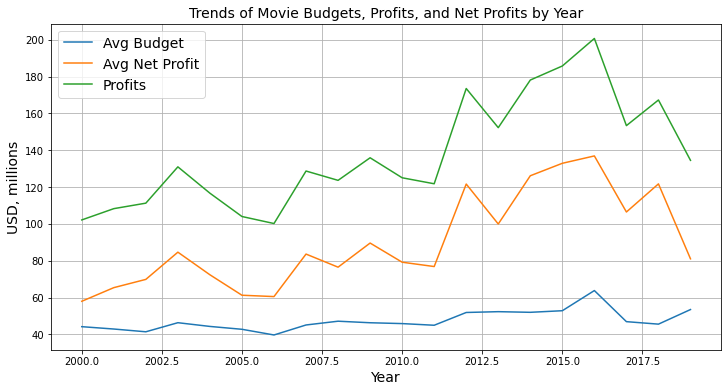

In [70]:
#historic trend
plot_historic_trend(movie_df)

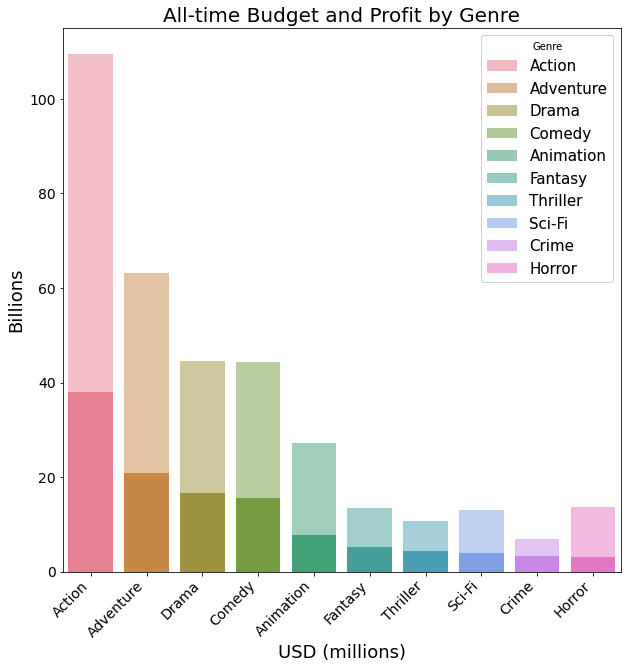

<Figure size 432x288 with 0 Axes>

In [71]:
plot_budgets_profits_top10(movie_df)
plt.savefig(os.path.join(path_dir_results, "CLEAN_All-time_Budget_Gross_plot.png"));

We'll define top 10 most profitable genres and look how budgets and profits are distributed.

In [72]:
# Most profitable genres
top_movies_represented = movie_df.groupby('genre1').agg({'net_profit_usd_mil': 'sum'}).reset_index()
top10_genres = top_movies_represented.sort_values(by='net_profit_usd_mil', ascending=False)['genre1'].head(10)
top10_genres = top10_genres.to_list()
top10_genres

['Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Animation',
 'Horror',
 'Sci-Fi',
 'Fantasy',
 'Family',
 'Thriller']

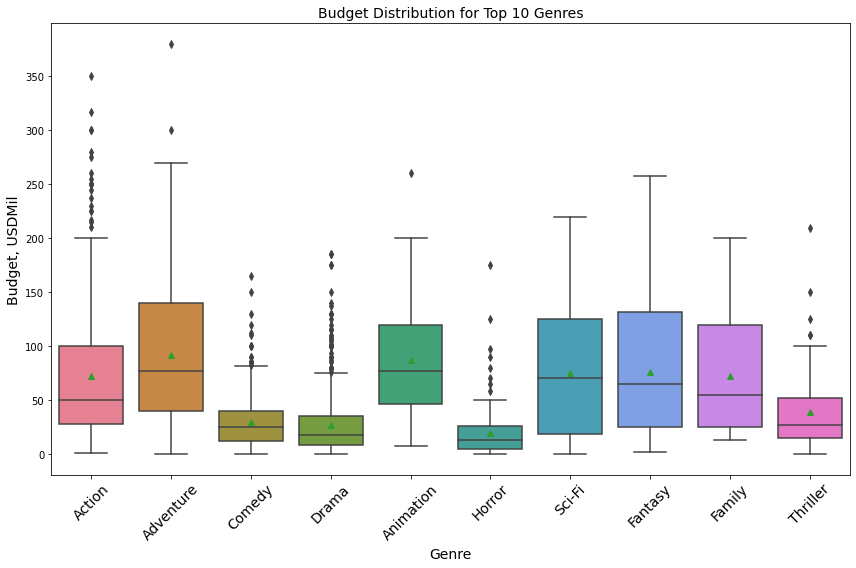

In [73]:
# Boxplot budgets 

# Filter the DataFrame to include only the top 10 genres
top10_genres_df = movie_df[movie_df['genre1'].isin(top10_genres)]
# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='budget_usd_mil', data=top10_genres_df, palette='husl', order=top10_genres, showmeans=True)
plt.ylabel('Budget, USDMil', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Budget Distribution for Top 10 Genres', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# production plot
plt.savefig(os.path.join(path_dir_results, "top10_Budgets_plot.png"))
plt.show()

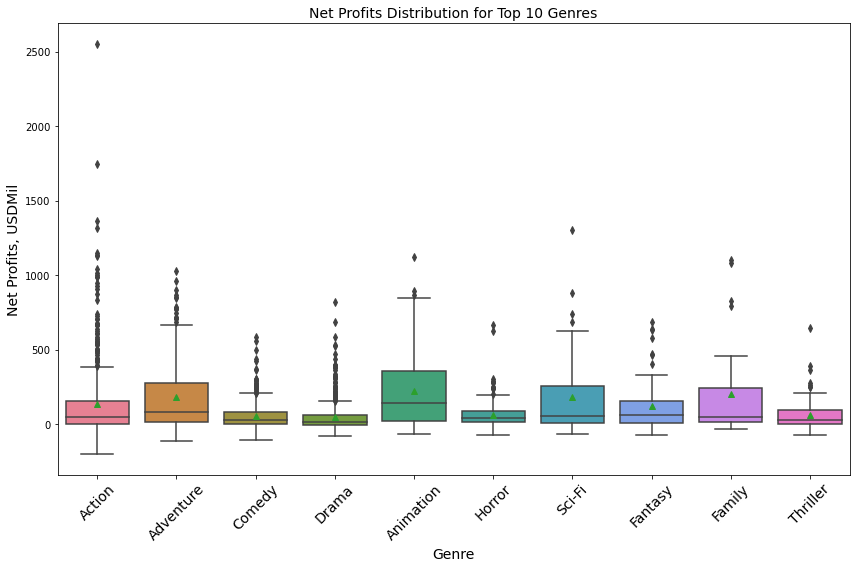

In [74]:
# Netprofits boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='net_profit_usd_mil', data=top10_genres_df, palette='husl', order=top10_genres, showmeans=True)
plt.ylabel('Net Profits, USDMil', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Net Profits Distribution for Top 10 Genres', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# production plot
plt.savefig(os.path.join(path_dir_results, "CLEAN_top10_NetProfits_plot.png"))
plt.show()

## 4.1. Genre Budgets and Profits Analysis.

Below we'll define supplemental plotting functions.
These functions are going to take our fatframe filtered by genre1 == 'genre' as one of the parameters and display a metric of profit vs other meterics.

In [75]:
# Displaying histogram of genre budget
def display_genre_budget_hist(df_genre, genre, color, path_dir_results):
    plt.figure(figsize=(8, 6))
    
    # plot histogram for budget
    sns.histplot(df_genre['budget_usd_mil'], kde=False, bins=100, color=color)
    
    # set labels and title
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Histogram of {genre} Budget', fontsize=18)
    
    plt.savefig(os.path.join(path_dir_results, f'Histogram of {genre} Budget.png'))
    plt.tight_layout()
    plt.show()

In [76]:
#Displaying genre ROI histogram
def display_genre_roi_hist(df_genre, genre, color, path_dir_results):
    plt.figure(figsize=(8, 6))
    
    # def ROI values under 50%
    roi_under_50 = (df_genre['roi_pct'] < 50).sum()
    ntotal = df_genre.shape[0]
    
    # plot histogram for ROI
    sns.histplot(df_genre['roi_pct'], kde=False, bins=100, color=color)
    
    # add a vertical line at ROI = 50
    plt.axvline(x=50, color='red', linestyle='--')
    
    # add text with ROI statistics
    plt.text(0.35, 0.95, f"ROI < 50%: {roi_under_50}\nTotal: {ntotal}",
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {genre} ROI', fontsize=18)
    
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'Histogram of {genre} ROI.png'))
    plt.show()

In [77]:
# Displaying genre's OLS Model
import statsmodels.api as sm

def display_genre_ols(df_genre, genre, color, path_dir_results):
    plt.figure(figsize=(8, 6))
    
    # add constant term for the intercept
    X = sm.add_constant(df_genre["budget_usd_mil"])
    y = df_genre["gross_usd_mil"]
    
    # fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
        
    # create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=df_genre, x="budget_usd_mil", y="gross_usd_mil", alpha=0.7, color=color)

    # add the regression line for the current genre
    plt.plot(df_genre["budget_usd_mil"], results.predict(X), color="black")
    
    # add model parameters and p-values as text
    plt.text(0.05, 0.95, f"Intercept: {results.params['const']:.2f}\nSlope: {results.params['budget_usd_mil']:.2f}\nP-value: {results.pvalues['budget_usd_mil']:.4f}",
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    # set title and labels
    plt.title(f"Movie Budget vs. Gross Profit for Genre: {genre}", fontsize=14)
    plt.xlabel("Budget (USD millions)", fontsize=14)
    plt.ylabel("Gross Profit (USD millions)", fontsize=14)
    plt.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    plt.tight_layout()
    
    # save and display the plot
    plt.savefig(os.path.join(path_dir_results, f"Expected_Profits_plot_{genre}.png"))
    plt.show()
    return results.params['budget_usd_mil']

In [78]:
# genre success stats  (not in use)
def display_success_genre(df_genre, genre, color):
    # define successfull movies as movies ith ROI > 50%
    df_genre.loc[:, 'success_status'] = df_genre.loc[:, 'roi_pct'] > 50
    # min, max, count of available budgets for genre
    min_budget =  genre_df['budget_usd_mil'].min()
    max_budget = genre_df['budget_usd_mil'].max()
    total_count = len(genre_df['budget_usd_mil'])
    
    step = 0.5;
    # try-catch for genres with too few datapoints
    try:
        spacing = int((max_budget - min_budget)/step)
        bins_genre = np.linspace(min_budget, max_budget, min(spacing, total_count))
        success_ratio = genre_df.groupby(pd.cut(genre_df['budget_usd_mil'], bins=bins_genre))['success_status'].mean()
        # remove NaN values from success_ratio
        success_ratio_cleaned = success_ratio.dropna()
        bins = bins_genre[:-1]
        bins_matched = bins[~success_ratio.isna()]
        if len(success_ratio_cleaned >0):
            # create a line plot of budget bins vs. success ratio
            sns.lineplot(x=bins_matched, y=success_ratio_cleaned, marker='o', color = color)
            plt.axhline(y=0.5, color='red', linestyle='--')
    
            #  labels and title
            plt.xlabel('Budget (USD millions)')
            plt.ylabel('Success Ratio')
            plt.title(f'Success Ratio by Budget of {genre} %')

    except ValueError as e:
        # handle the ValueError caused by NaN values in bins_genre
        print("ValueError:", e, genre, total_count)
        print("NaN values are present")
  
    # Show the plot
    plt.show()
    plt.savefig(os.path.join(path_dir_results, f'Histogram of Success ROI.png'))

In [110]:
import calendar

# function will plot avg budget and revenue vs release month
def display_genre_release_month(df_genre, genre, color, path_dir_results):
    # Plot data
    plt.figure(figsize=(10, 6))
    df_genre = df_genre.groupby(['genre1', 'month']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil': 'mean'}).reset_index()

    df_genre['month_str'] = df_genre['month'].apply(lambda x: calendar.month_name[x])
    
    sns.barplot(data=df_genre, x='month_str', y='budget_usd_mil', label='Budget', color=color)
    sns.barplot(data=df_genre, x='month_str', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)

    # Set title and labels
    plt.title(f'Profits and Release Time for {genre}', fontsize=20)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('USD, millions', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    plt.legend()
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'Release_Month_{genre}_Over_Time.png')) 
    top_3_profitable_months = df_genre.nlargest(3, 'gross_usd_mil')[['month_str', 'gross_usd_mil']]
    plt.show()
    list_month = top_3_profitable_months['month_str'].values
    month_str = ', '.join(list_month)
    return month_str

In [109]:
# function will plot duration vs revenue
def display_genre_duration(df_genre, genre, color, path_dir_results):
    # Plot data
    plt.figure(figsize=(10, 6))
    
    # define the bins for categorizing runtimes
    bins = [0, 80, 100, 120, 140, 160, 180, 200, 240]
    
    # define labels for each category
    labels = ['<80', '80-100', '101-120', '121-140', '141-160', '161-180', '181-200', '>200']
    
    # use pd.cut() to categorize runtimes into bins
    df_genre = df_genre.copy()
    df_genre['runtime_category'] = pd.cut(df_genre['runtime'], bins=bins, labels=labels, right=False)

    df_genre = df_genre.groupby(['genre1', 'runtime_category']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil': 'mean'}).reset_index()
    
    sns.barplot(data=df_genre, x='runtime_category', y='budget_usd_mil', label='Budget', color=color)
    sns.barplot(data=df_genre, x='runtime_category', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)

    # Set title and labels
    plt.title(f'Profits by Runtime for {genre}', fontsize=20)
    plt.xlabel('Duration, min', fontsize=18)
    plt.ylabel('USD, millions', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    plt.legend()
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'Profits_of_{genre}_Over_Duration.png'))   
    plt.show()
    top_3_profitable_time = df_genre.nlargest(3, 'gross_usd_mil')[['runtime_category', 'gross_usd_mil']]
    list_runtime = top_3_profitable_time['runtime_category'].values
    runtime_str = ', '.join(list_runtime)
    return runtime_str 

In [81]:
# function will display content rating vs avg movie profits 
def display_genre_content_rating(df_genre, genre, color, path_dir_results):
    # try/catch for genres with no rating info
    try:
        plt.figure(figsize=(10, 6))
        # group together by genre and content rating
        df_genre = df_genre.groupby(['genre1', 'content_rating']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil': 'mean'}).reset_index()
    
        sns.barplot(data=df_genre, x='content_rating', y='budget_usd_mil', label='Budget', color=color)
        sns.barplot(data=df_genre, x='content_rating', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)
       
        # set title and labels
        plt.title(f'Profits by Content Rating for {genre}', fontsize=20)
        plt.xlabel('Content Rating', fontsize=18)
        plt.ylabel('USD, millions', fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    
        plt.legend()

        plt.tight_layout()
    
        plt.savefig(os.path.join(path_dir_results, f'Profit_by_Content_Rating_By_{genre}_plot.png'))
        plt.show()
        
        #return top content rating
        top_content_rating = df_genre.loc[df_genre['gross_usd_mil'].idxmax(), 'content_rating']
        return top_content_rating
    except ValueError as e:
        # handle the ValueError caused by low number of datapoints for content rating
        print("ValueError:", e, genre)

In [82]:
# cast or crew for top 10 movies in genre1
def display_genre_top_cast_or_crew(df_genre, genre, cast_or_crew, color, path_dir_results):
    # split names and explode them into separate rows
    cast_or_crew_df = df_genre[cast_or_crew].str.split(',', expand=True) \
                        .stack().reset_index(level=1, drop=True).rename(cast_or_crew)

    # merge the cast or crew names back to the original DataFrame
    df_expanded = df_genre.drop(cast_or_crew, axis=1).join(cast_or_crew_df)

    # group by cast or crew member and calculate total net profit
    cast_or_crew_profit = df_expanded.groupby(cast_or_crew)['net_profit_usd_mil'].sum().reset_index()
    cast_or_crew_profit.dropna(inplace = True)
    # select the top 10 cast or crew members with the highest total net profit
    top_10_cast_or_crew = cast_or_crew_profit.nlargest(10, 'net_profit_usd_mil')
    # plot the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_cast_or_crew, x=cast_or_crew, y='net_profit_usd_mil', palette='viridis')
    plt.title(f'Top 10 Most Successful {cast_or_crew.capitalize()} by Total Net Profit for {genre}', fontsize=16)
    plt.xlabel(cast_or_crew.capitalize(), fontsize=14)
    plt.ylabel('Profit, USD millions', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # save the plot
    plt.savefig(os.path.join(path_dir_results, f'Top 10 {cast_or_crew.capitalize()} of {genre} Plot.png'))    
    plt.show()

In [108]:
# cast or crew for top 10 most profitable movies in genre with awards 
def display_top_cast_or_crew_with_awards(genre_df, genre, cast_or_crew, awards_list, color, path_dir_results):
    
    genre_df_slice = genre_df[[cast_or_crew, 'net_profit_usd_mil']]
    # split the 'producer' column by comma and expand it into separate rows
    cast_or_crew_df = genre_df_slice[cast_or_crew].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename(cast_or_crew)

    # merge the cast or crew names back to the original DataFrame
    df_expanded = genre_df_slice.drop(cast_or_crew, axis=1).merge(cast_or_crew_df, left_index=True, right_index=True)
    # group by cast or crew member and calculate total net profit
    cast_or_crew_profit = df_expanded.groupby(cast_or_crew)['net_profit_usd_mil'].sum()
    # convert Series to DataFrame
    cast_or_crew_profit = cast_or_crew_profit.to_frame().reset_index()

    # set 'cast_or_crew' column as index
    cast_or_crew_profit.set_index(cast_or_crew, inplace=True)
    # eeset the index
    cast_or_crew_profit.reset_index(inplace=True)    # top 10 cast or crew members with the highest total net profit
    top_10_cast_or_crew = cast_or_crew_profit.nlargest(10, 'net_profit_usd_mil')
        
   # Check if each member of the top 10 cast or crew has won any awards
    top_10_cast_or_crew[cast_or_crew] = top_10_cast_or_crew[cast_or_crew].apply(lambda name: f"*{name}" if name in awards_list else name)

    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_cast_or_crew, x=cast_or_crew, y='net_profit_usd_mil', palette='viridis')

    plt.title(f'Top 10 Most Successful {cast_or_crew.capitalize()} by Total Net Profit')
    plt.xlabel('Cast or Crew Member')
    plt.ylabel('Total Profit, USD millions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    list_cast = top_10_cast_or_crew[cast_or_crew].values
    cast_str = ', '.join(list_cast)
    return cast_str

In [116]:
# plot top profitable 5 subgenres for each genre
def plot_genre_subgenre_bar(df_genre, genre, color, path_dir_results):
    # Filter the grouped DataFrame based on genre2

    # Create DataFrame for plotting
    df_genre = df_genre.groupby(['genre1', 'genre2']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil':'mean'}).reset_index()
    plot_data = df_genre.nlargest(5, 'gross_usd_mil')

    # Plotting
    plt.figure(figsize=(14, 8))

    # Plot bars for 'budget_usd_mil' as stacked bars
    sns.barplot(data=plot_data, x='genre2', y='gross_usd_mil', \
                label='Revenue', color=color, alpha=0.5)
    sns.barplot(data=plot_data, x='genre2', y='budget_usd_mil', color=color, \
                label='Budget (USD Millions)')

    # Set labels and title
    plt.xlabel('Sub-Genre', fontsize=14)
    plt.ylabel('Movie Profit (USD million)', fontsize=14)
    plt.title(f'Most profitable sub-genres for {genre}', fontsize=16)

    plt.xticks(rotation=45, ha='right',fontsize=14)
    # Set legend
    plt.legend(fontsize=12)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(os.path.join(path_dir_results, f"{genre}_Budget_Profit_Genre_Subgenre_plot.png"))
    genre_cast = plot_data['genre2'].unique()
    genre_str = ', '.join(genre_cast)

    return genre_str 
    # Show the plot
    plt.show()

## 4.2. Genre Budgets and Profits Analysis: Generating Plots for all Genres
In this block we'll walk youy through genreating analysis plots for `Action` and `Adventure` genres.

In [85]:
analysis_genres = ['Action', 'Adventure']
palette = sns.color_palette("husl", n_colors=len(analysis_genres))
 # Get the top five most profitable 'genre1' by 'gross_usd_mil'
grouped_df = movie_df[movie_df['genre1'].isin(analysis_genres)]
grouped_content_df = content_rating_clean_df[content_rating_clean_df['genre1'].isin(analysis_genres)]

## 4.2.1. Budget, ROI
We'll look into the historic budget distribution, profits, modelled expected return. 

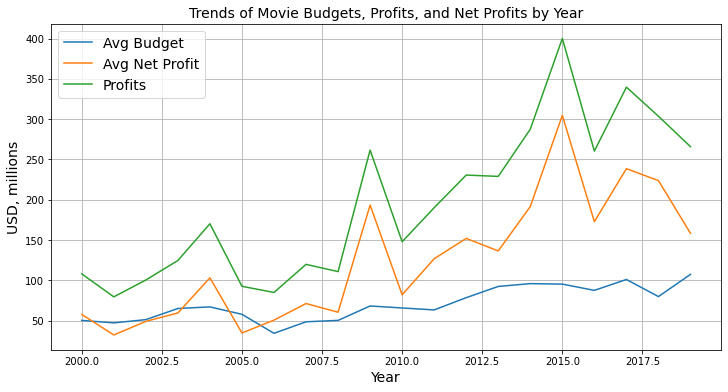

In [86]:
genre_df = grouped_df[grouped_df['genre1'] == 'Action']
#display_success_genre(genre_df, genre, color)
plot_historic_trend(genre_df)

We can see from this plot that the average `Adventure` budget has increased from 50 millions to 100 millions in 10 years. In the same time, average gross went from 120 million to 300 million, so adventure movies const more to make but bring more profit.

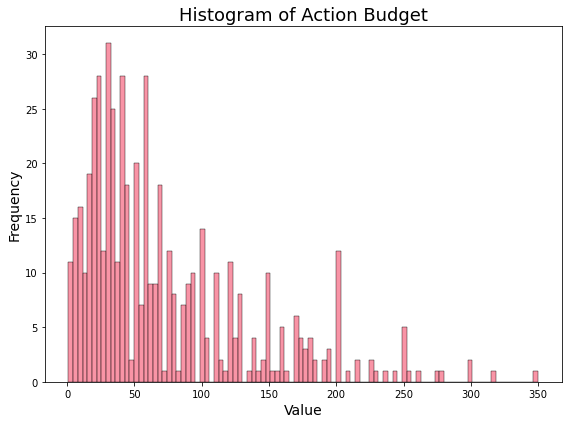

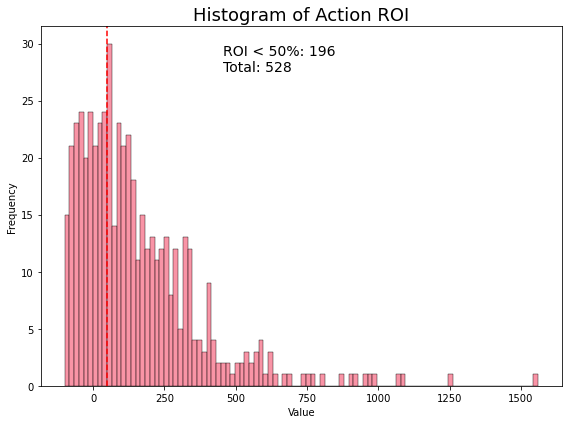

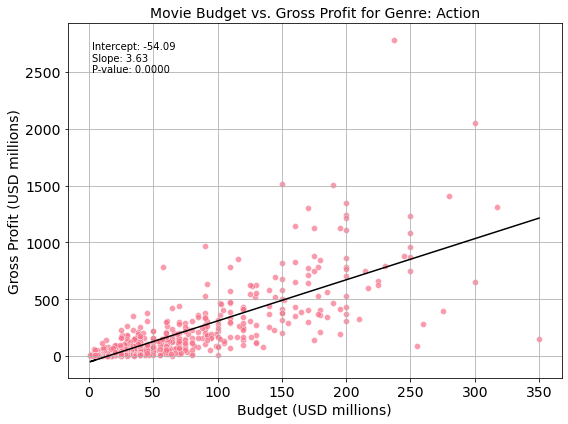

3.62525708491943


In [87]:
#budget historic, success, roi, disribution
display_genre_budget_hist(genre_df, 'Action', palette[0], path_dir_results)
display_genre_roi_hist(genre_df, 'Action', palette[0], path_dir_results)
expected_ret = display_genre_ols(genre_df, 'Action', palette[0], path_dir_results)
print(expected_ret)

The majority of `Action` movies cost between 25 and 100 million dollars. Almost 37% of movies had ROI of 50% or less. Modelled expected return per 1 million of budget is 3.6 million of profit.

## 4.2.2 Key metrics: Duration, Content Rating, Release Date.

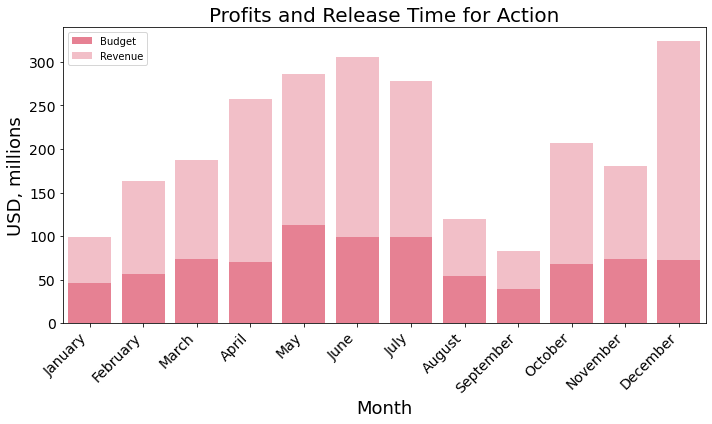

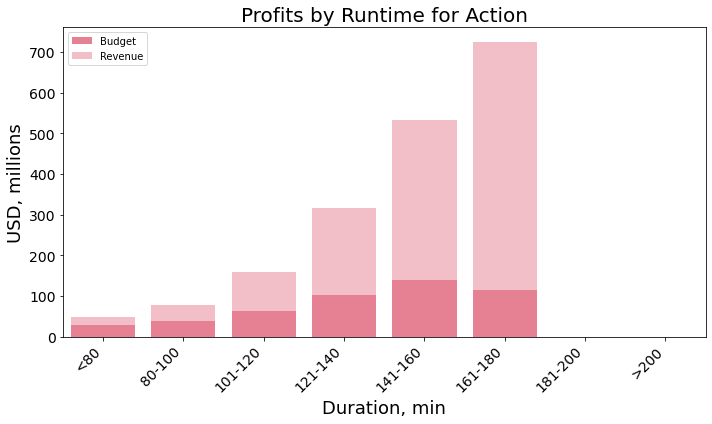

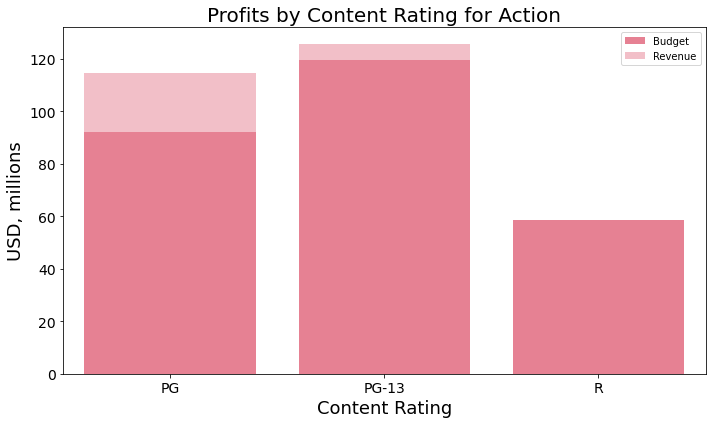

'161-180, 141-160, 121-140'

In [115]:

#release month
preffered_month = display_genre_release_month(genre_df, 'Action', palette[0], path_dir_results)
#duration 
aa = preffered_duration = display_genre_duration(genre_df, 'Action', palette[0], path_dir_results)
#content rating
genre_content_df = grouped_content_df[grouped_content_df['genre1'] == 'Action']
preffered_content = display_genre_content_rating(genre_content_df, 'Action', palette[0], path_dir_results)

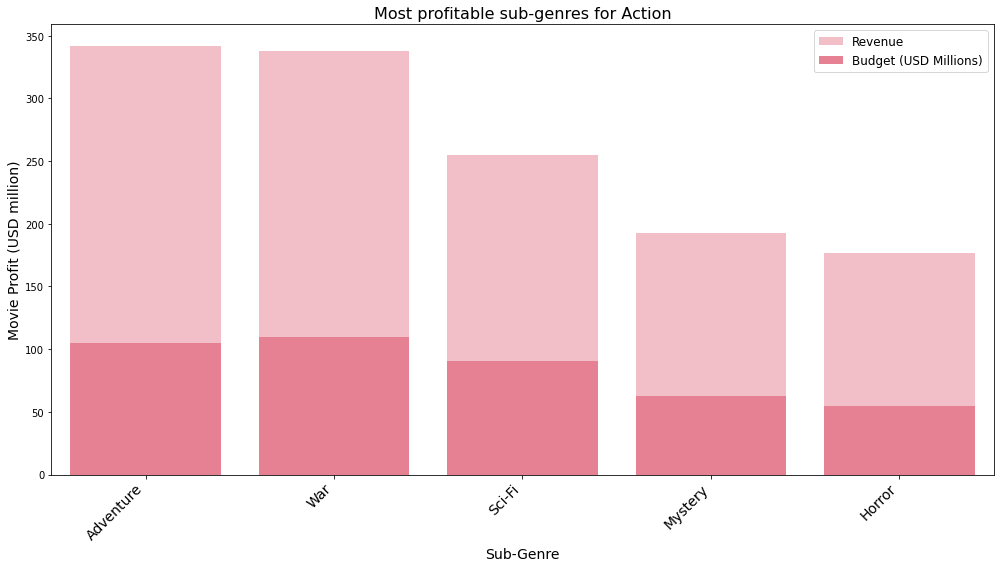

In [117]:
#subgenre
preffered_subgenre = plot_genre_subgenre_bar(genre_df, 'Action', palette[0], path_dir_results)

Data shows that for `Action` best release months would be May-July (Summer) and December (Holiday season). 
Best content rating would be PG or PG-13. Best subgenres to consider would be `Adventure`, `War`, `Sci-Fi`.
Recommended duration: 2-3 hours.

## 4.2.3 Key metrics: Cast and Crew, Having Critically Acclaimed Crew or Cast.
In this final section, we'll look at the most profitable cast and crew members, as well as check if having a critically acclaimed cast or crew would increase the movie ROI.

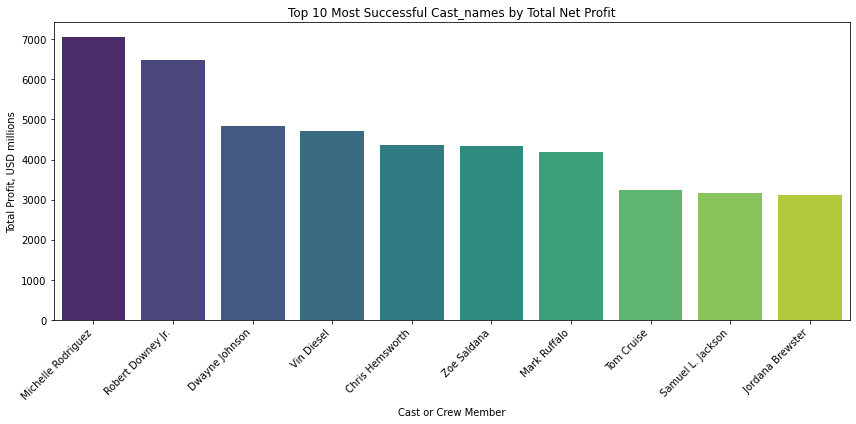

In [90]:
display_top_cast_or_crew_with_awards(genre_df, 'Action', 'cast_names', all_winners_set, palette[0], path_dir_results);

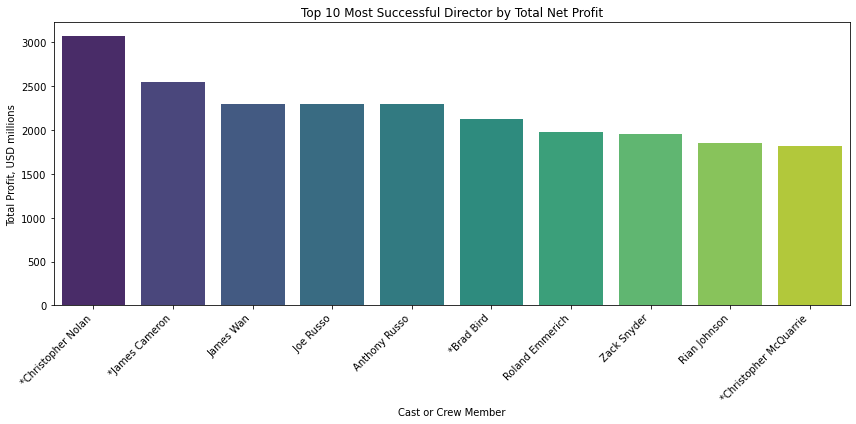

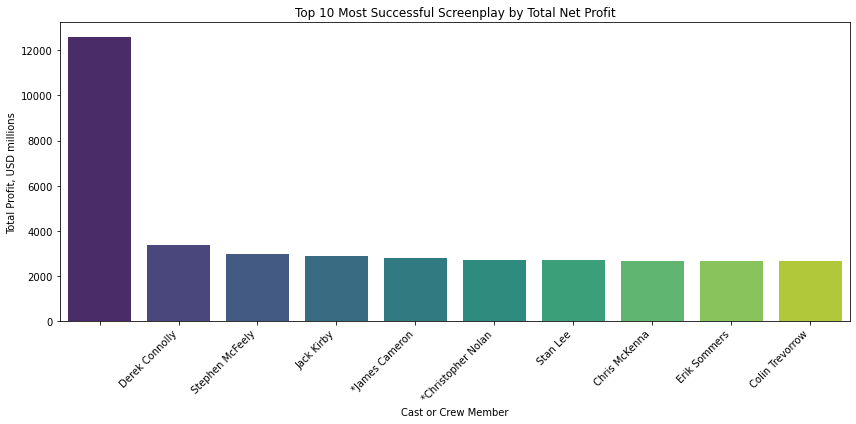

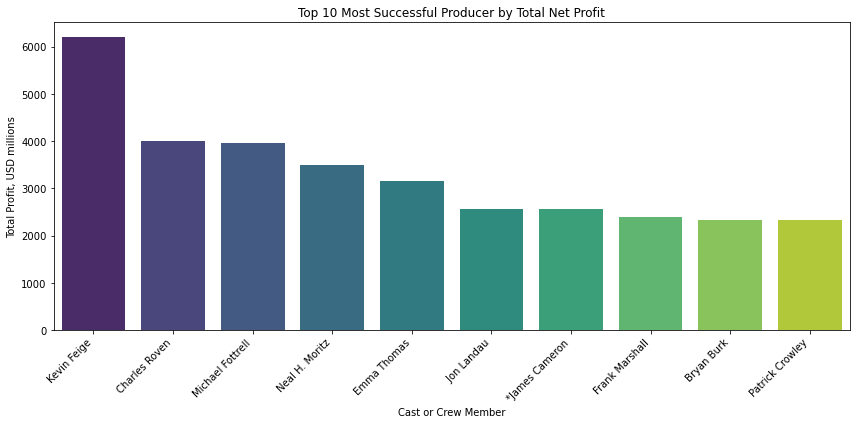

In [113]:
#crew
display_top_cast_or_crew_with_awards(genre_df, 'Action', 'director', all_winners_set, palette[0], path_dir_results);
display_top_cast_or_crew_with_awards(genre_df, 'Action', 'screenplay', all_winners_set, palette[0], path_dir_results);
aa = display_top_cast_or_crew_with_awards(genre_df, 'Action', 'producer', all_winners_set, palette[0], path_dir_results);

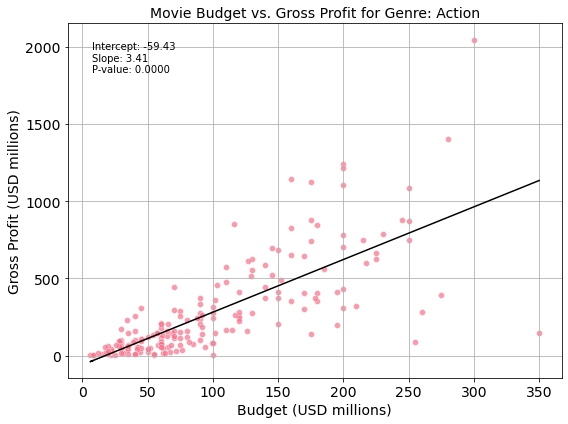

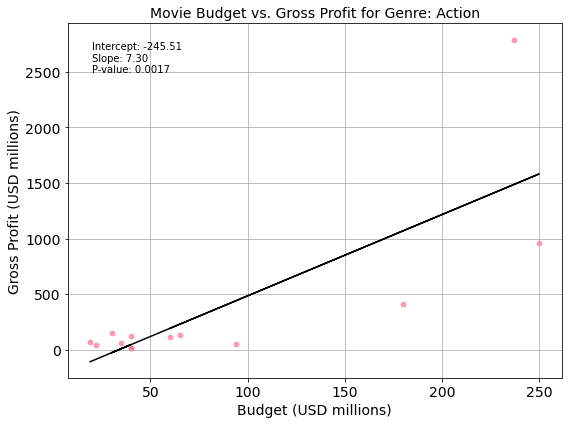

In [92]:
#OLD with/without awards
genre_df_cast_awarded = genre_df[(genre_df['cast_awarded']>1)]
expected_ret_awards = display_genre_ols(genre_df_cast_awarded, 'Action', palette[0], path_dir_results)

genre_df_crew_awarded = genre_df[(genre_df['crew_awards']>1)]
expected_awards = display_genre_ols(genre_df_crew_awarded, 'Action', palette[0], path_dir_results)

As we can see here, having critically-acclaimed crew is better for projected return.

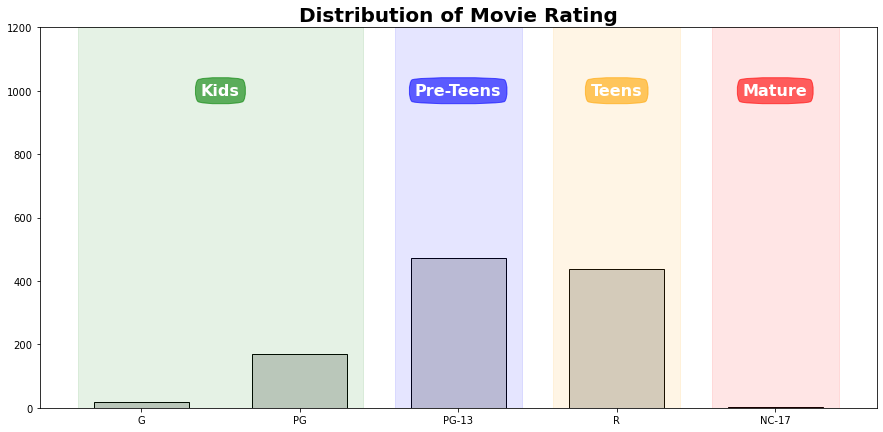

<Figure size 432x288 with 0 Axes>

In [93]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color="#d0d0d0", width=0.6, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 1], [2, 2], [3, 3], [4, 4]]  # Adjusted span_range for 0-4 rating

    for idx, sub_title in enumerate(['Kids', 'Pre-Teens', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2, height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
    
movie_rating = content_rating_clean_df['content_rating'].value_counts()
rating_order = [label for label in ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA'] if label in movie_rating.index]

rating_barplot(movie_rating[rating_order], "Movie", 1000, 1200)
plt.savefig(os.path.join(path_dir_results, "CLEAN_Movie_Ratings.png"))


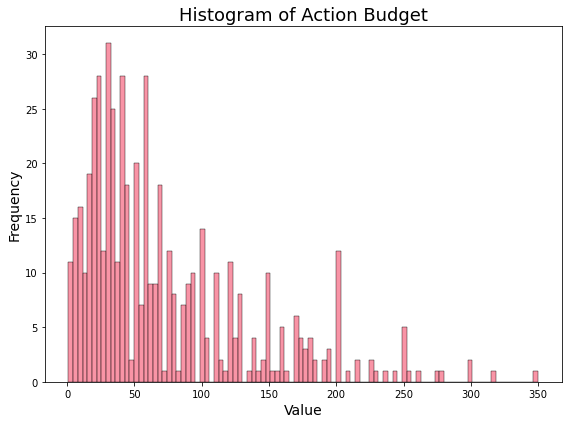

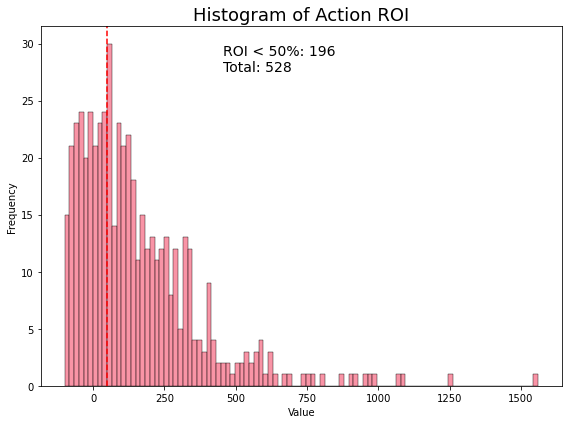

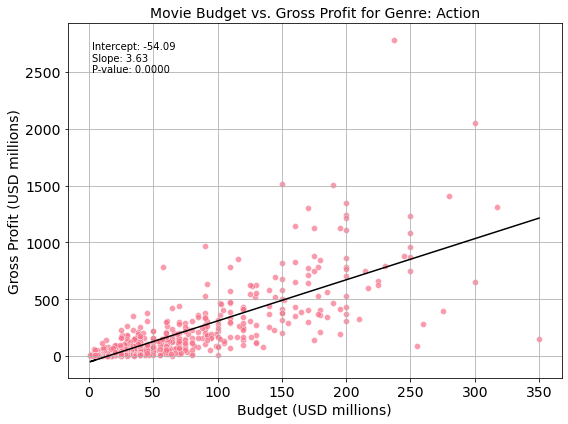

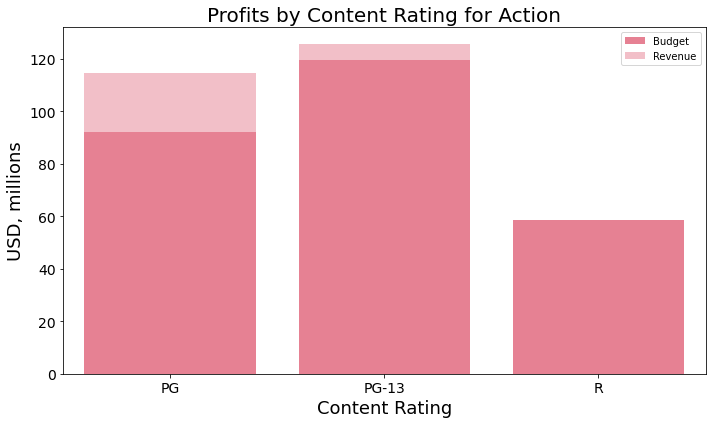

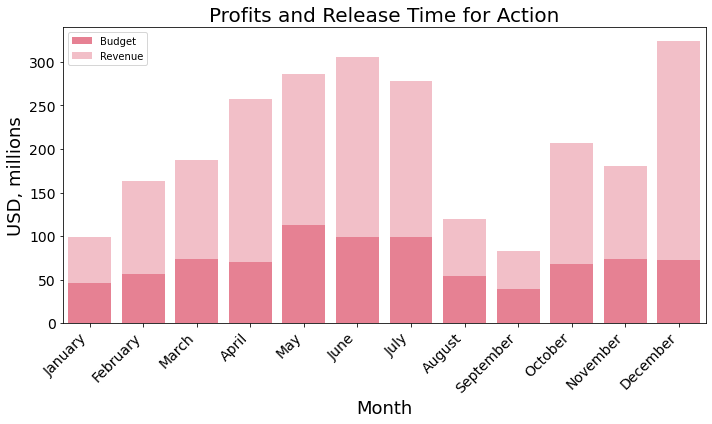

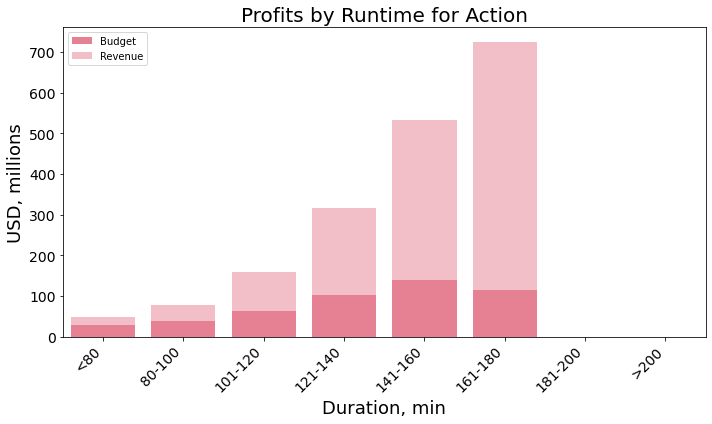

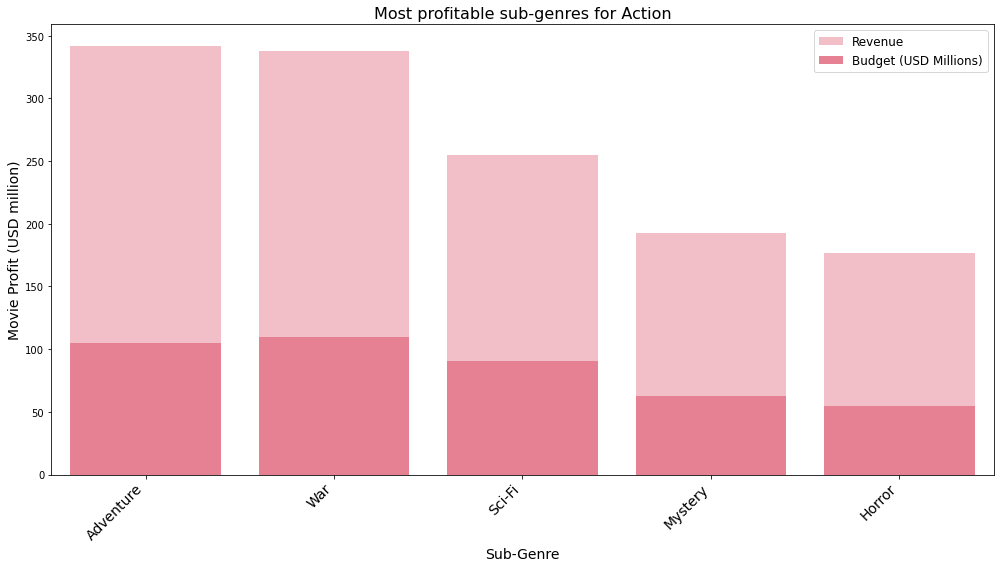

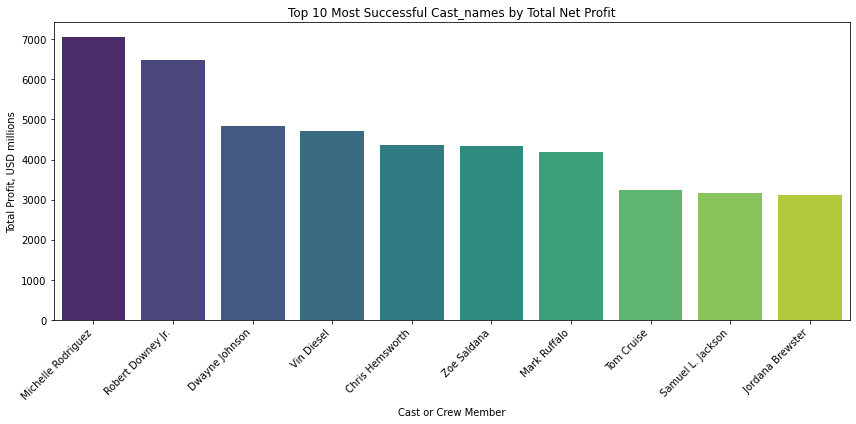

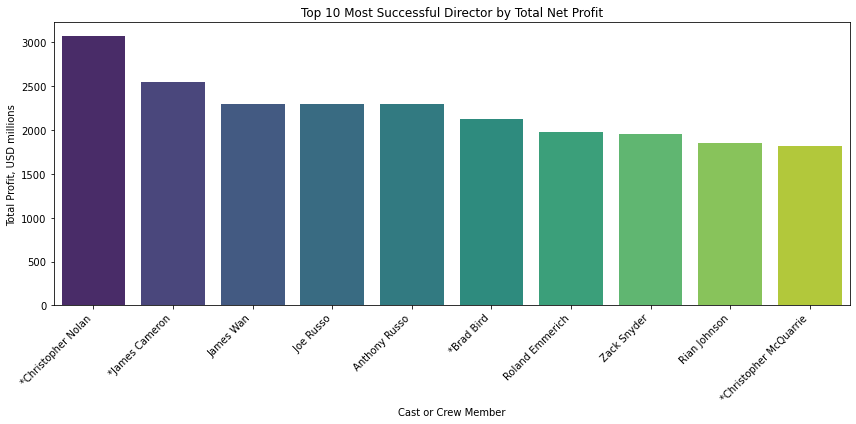

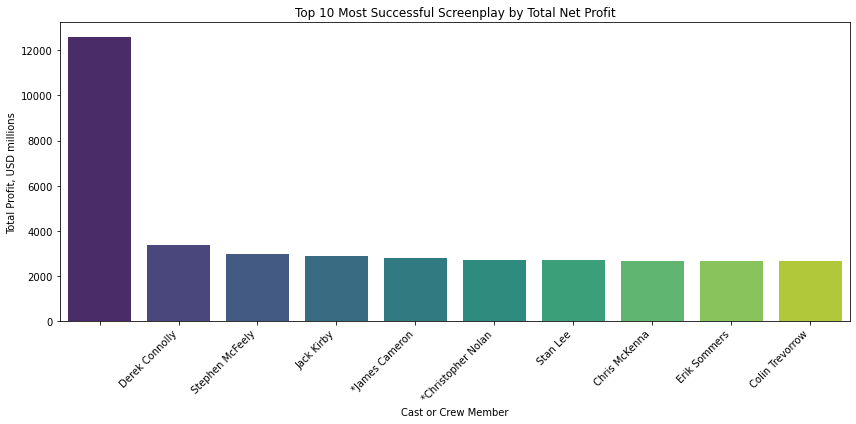

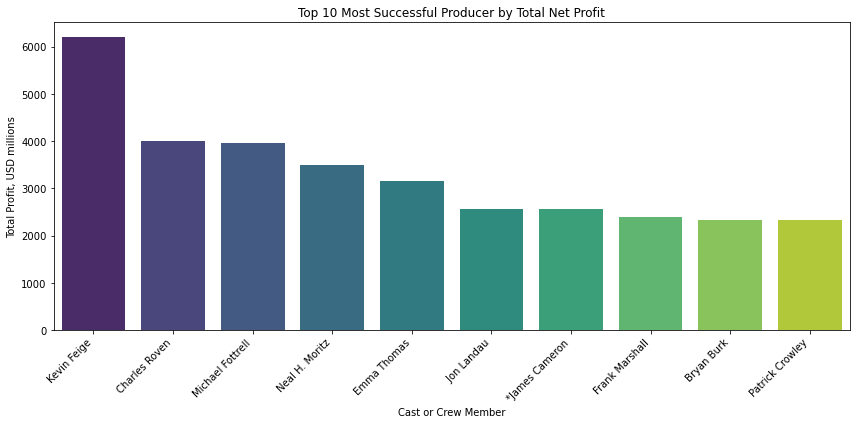

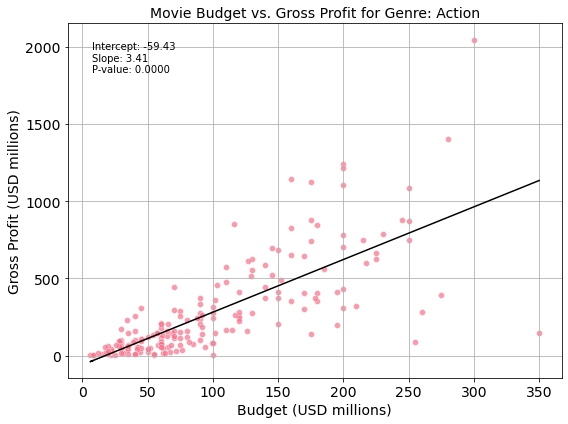

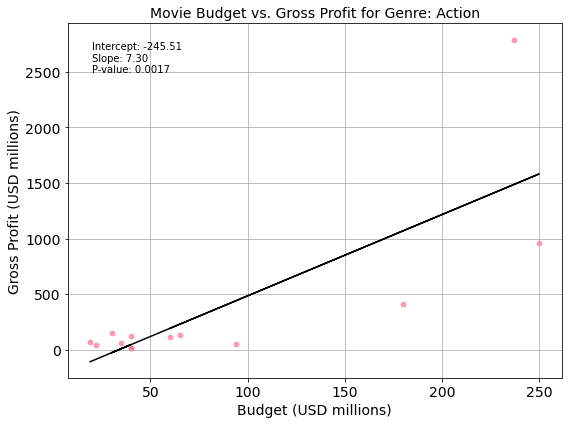

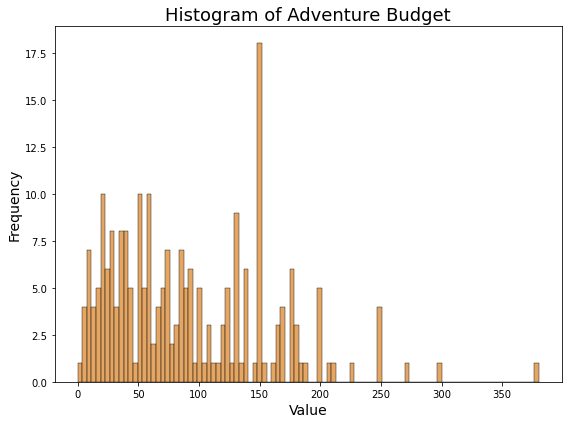

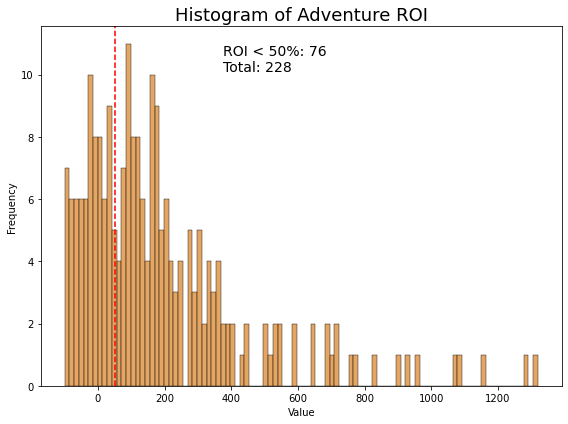

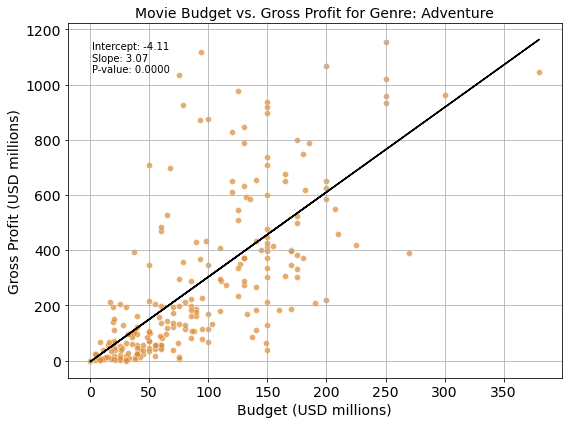

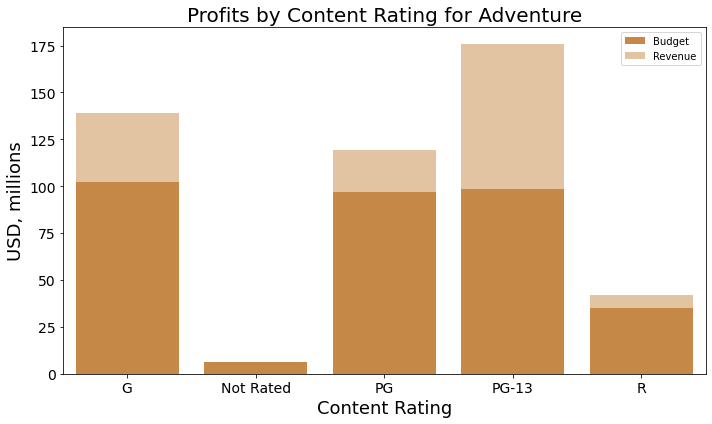

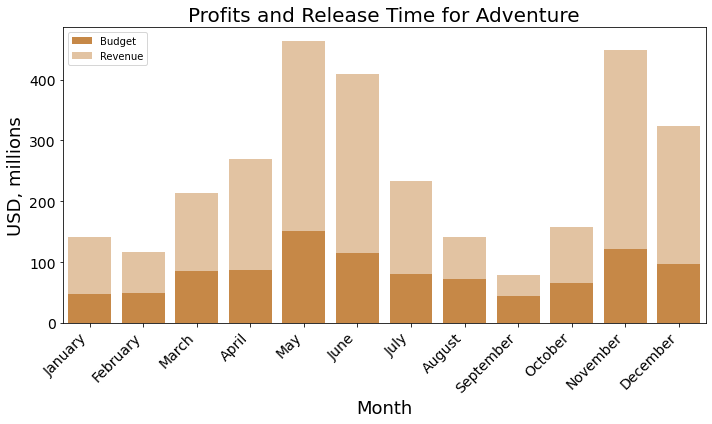

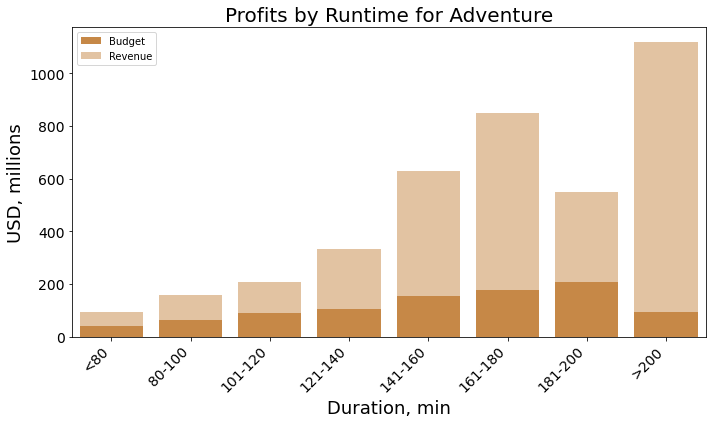

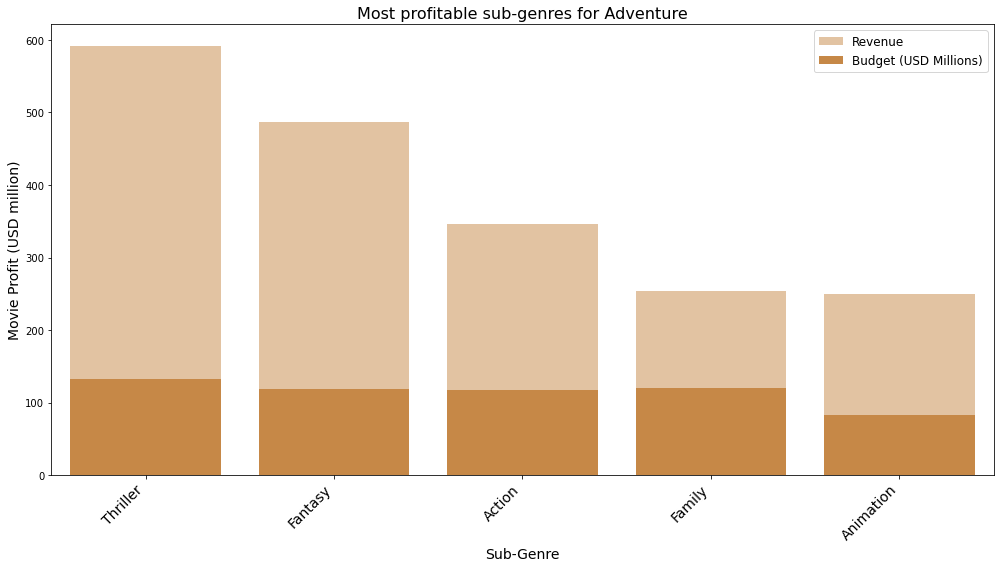

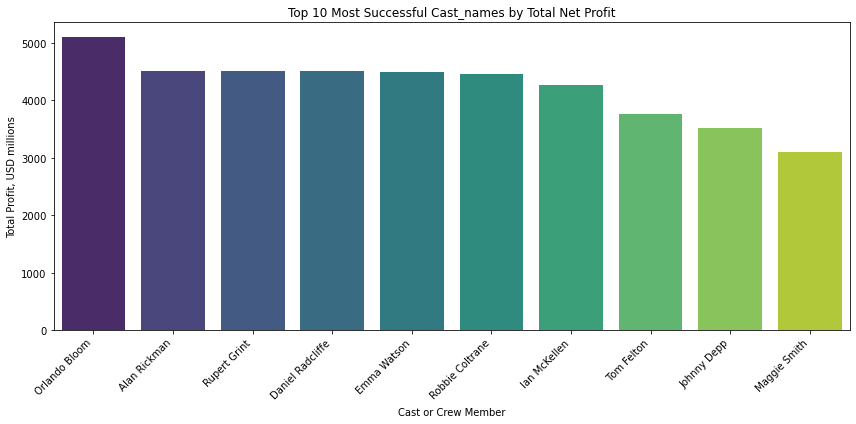

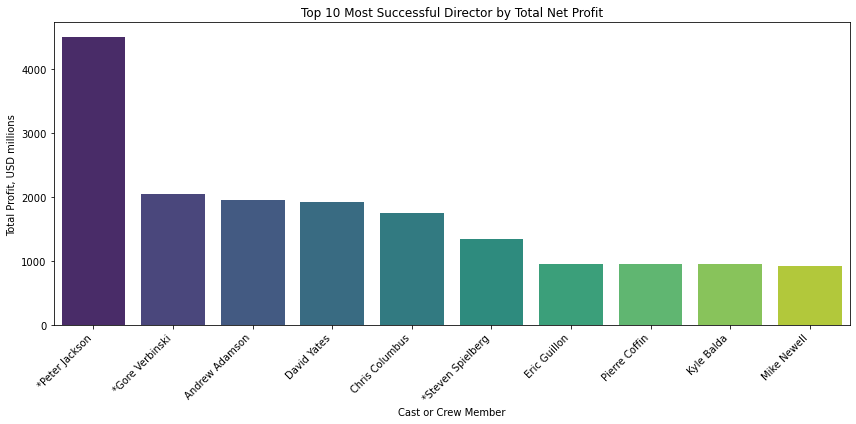

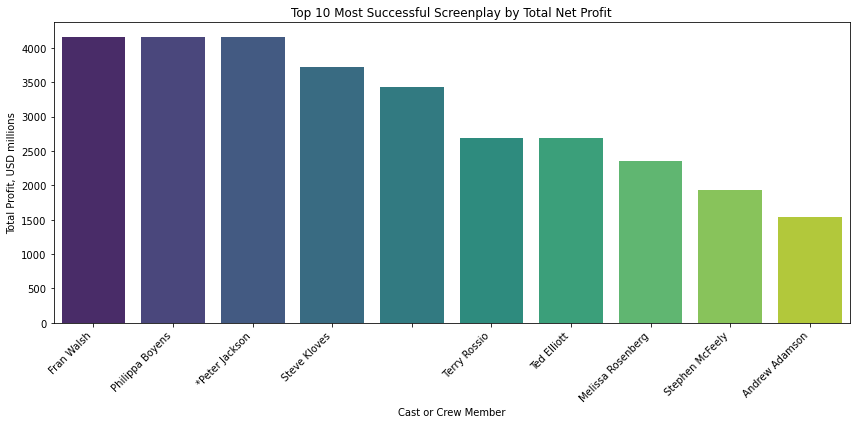

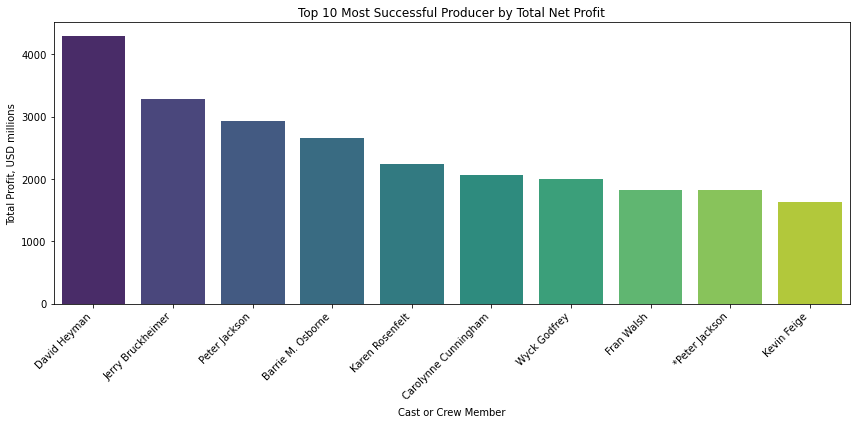

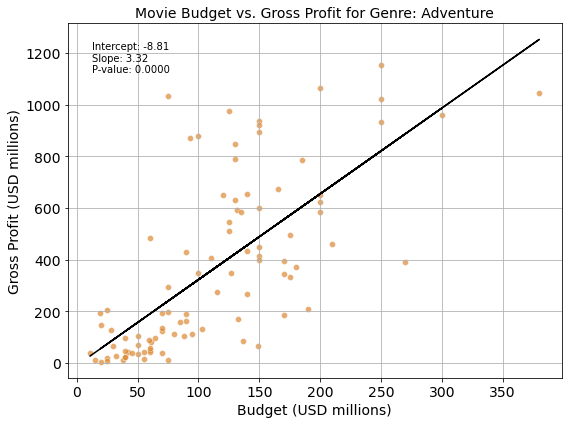

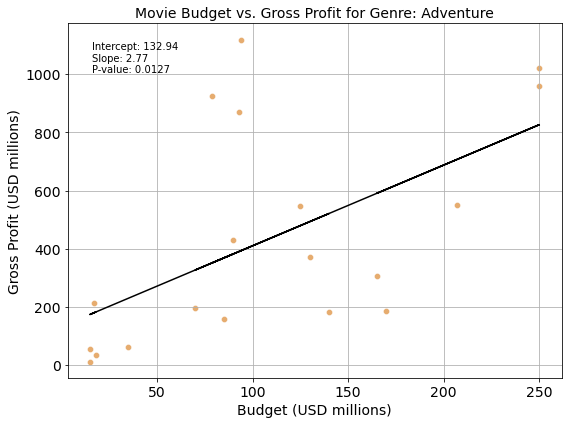

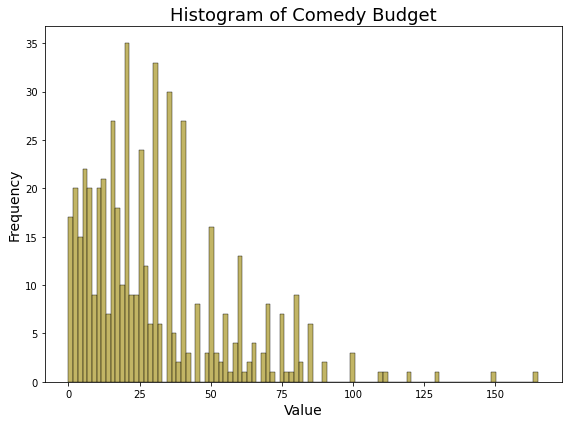

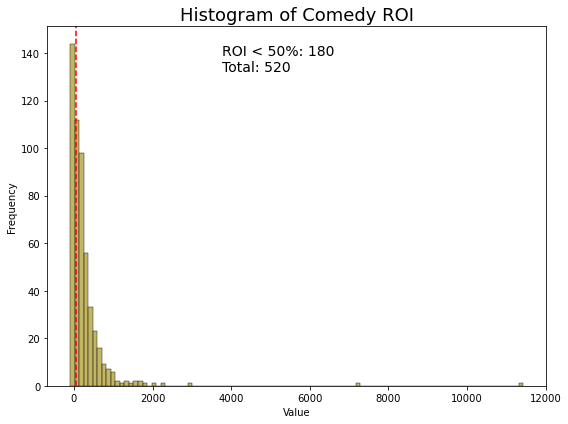

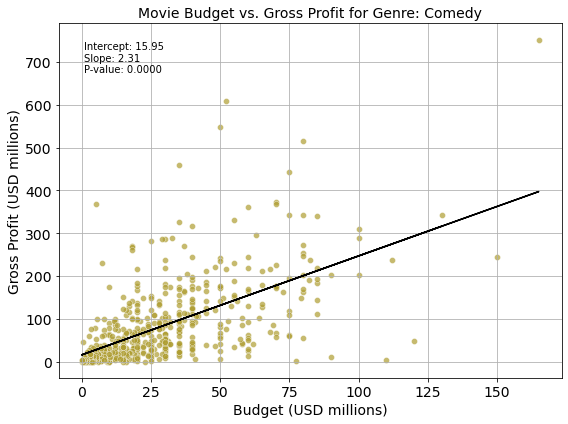

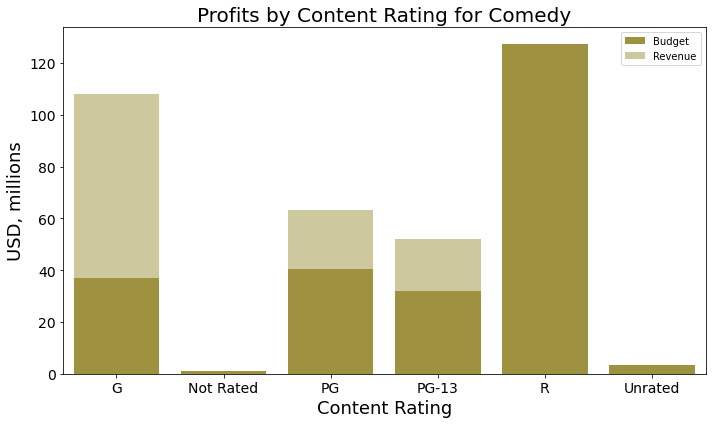

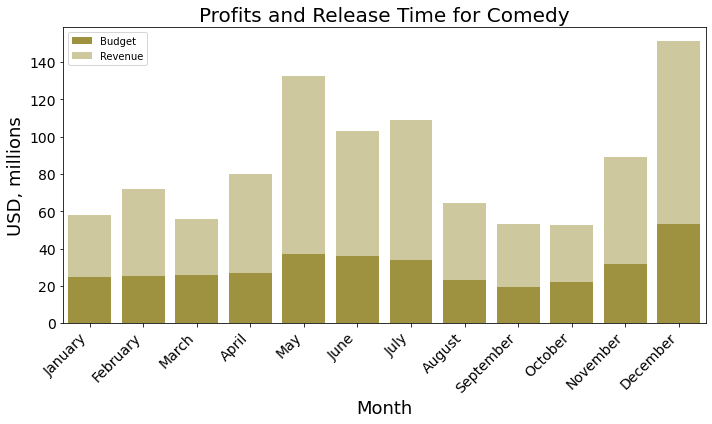

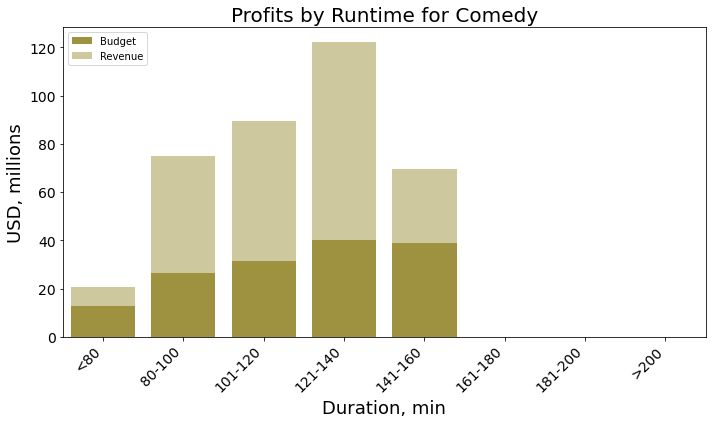

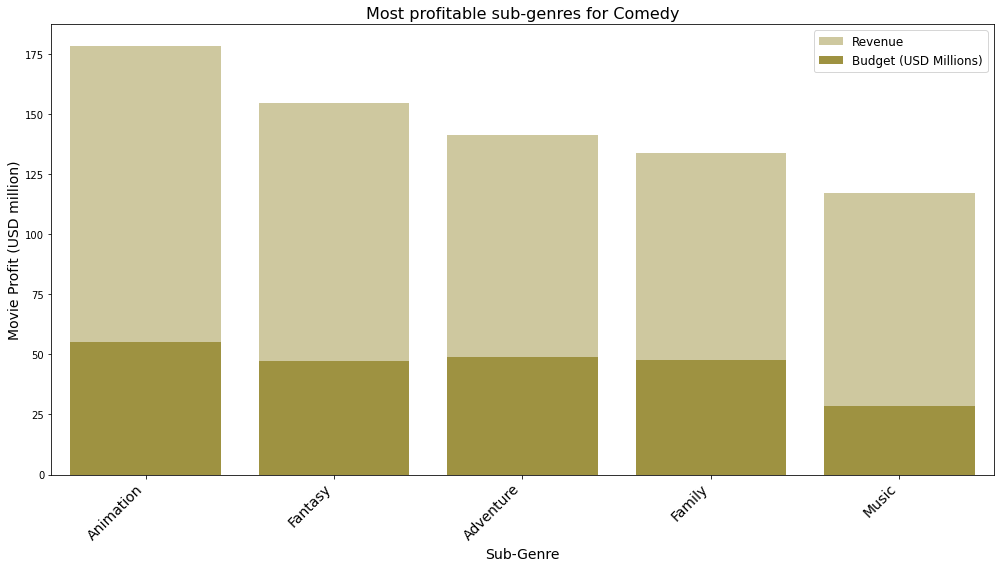

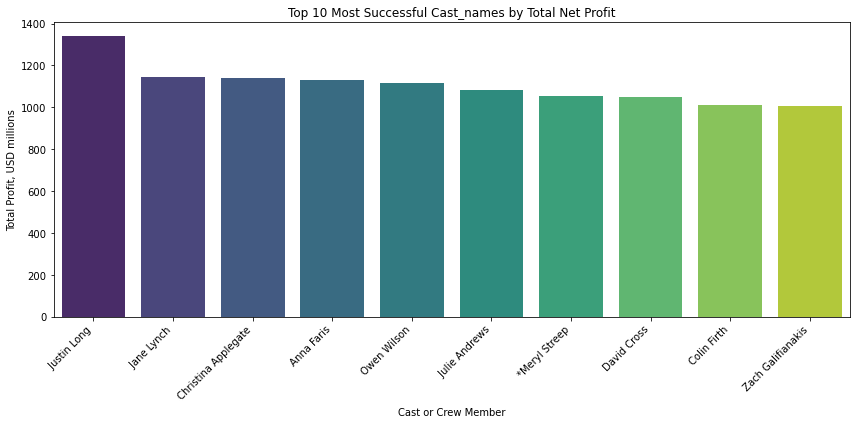

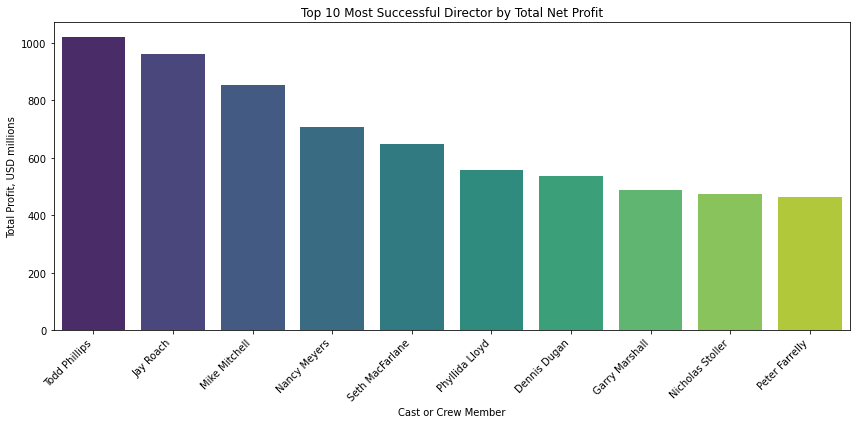

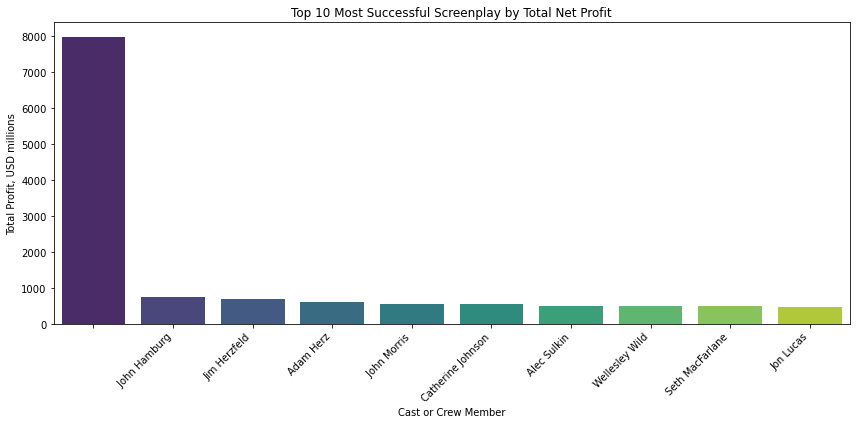

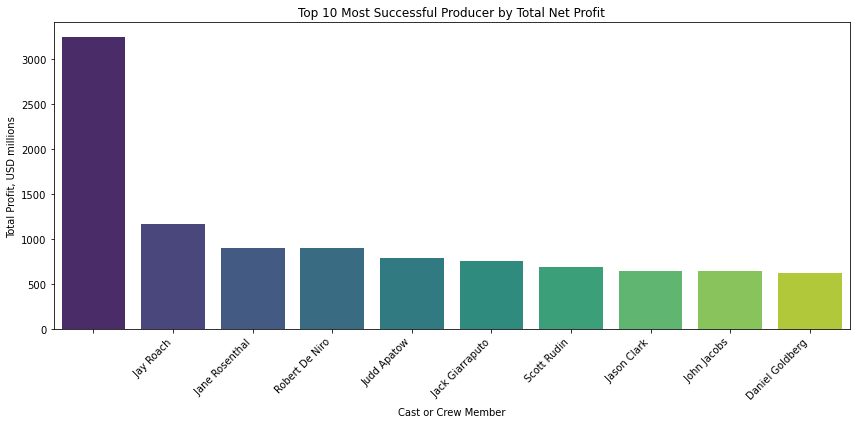

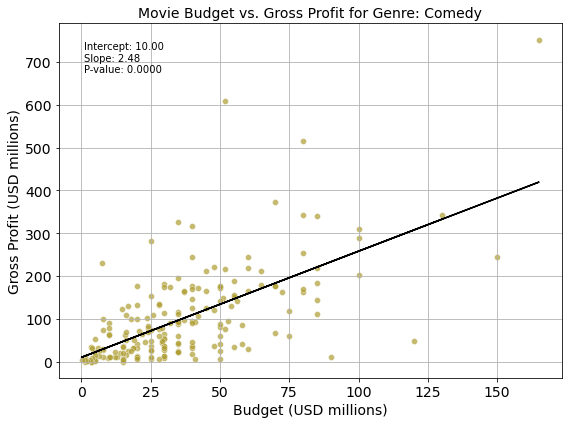

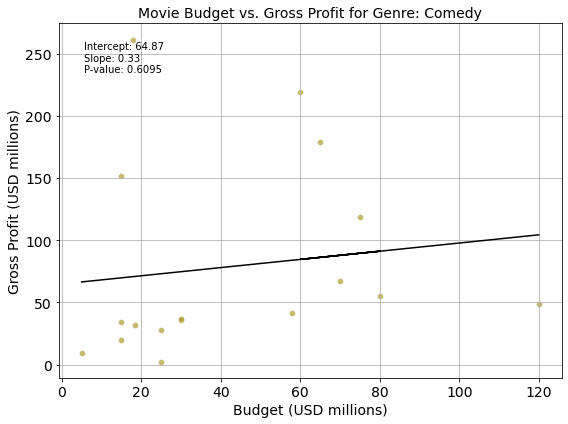

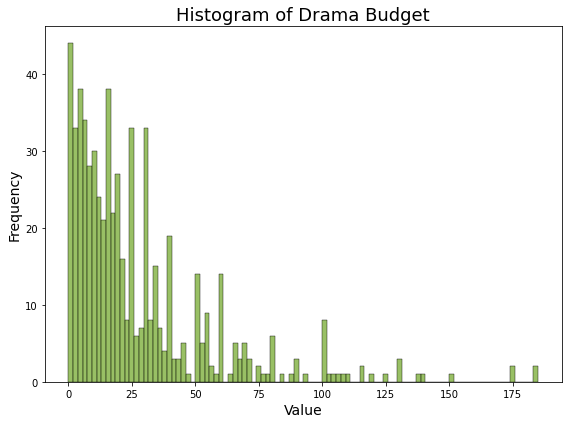

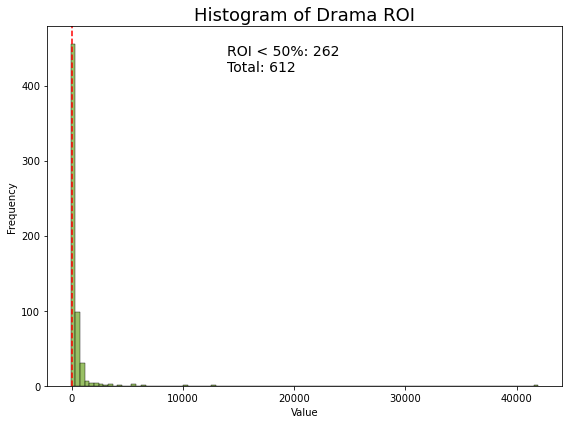

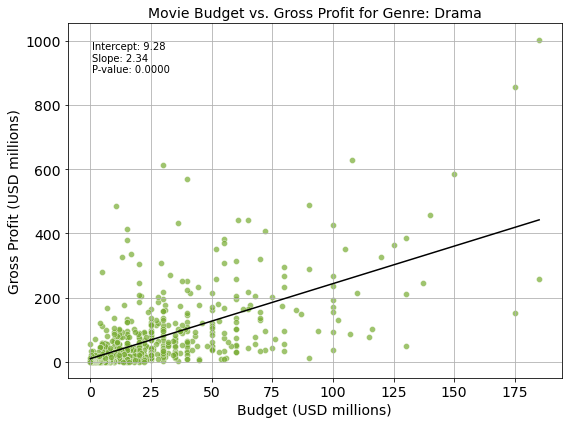

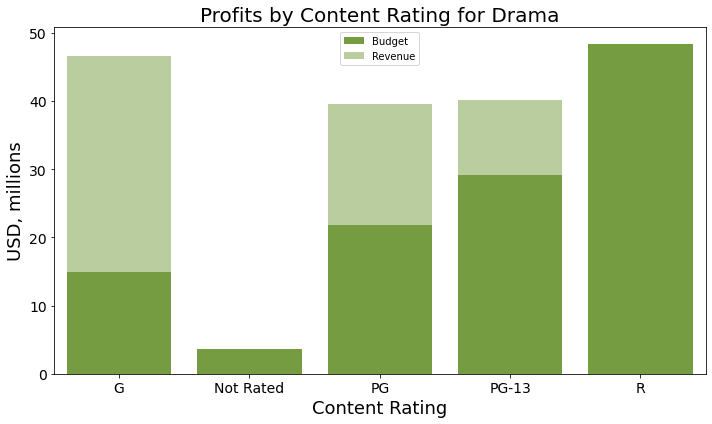

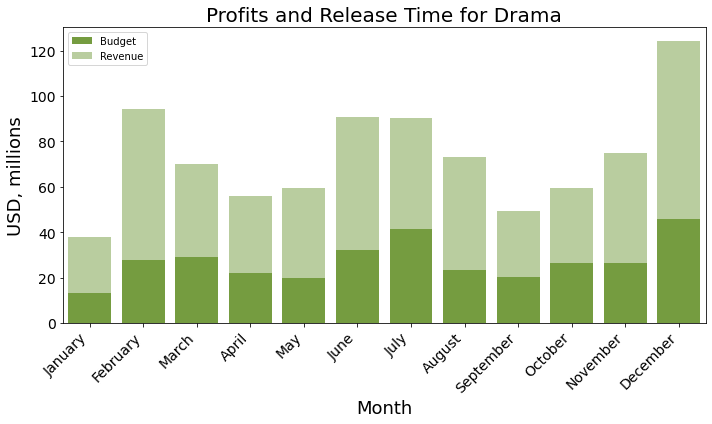

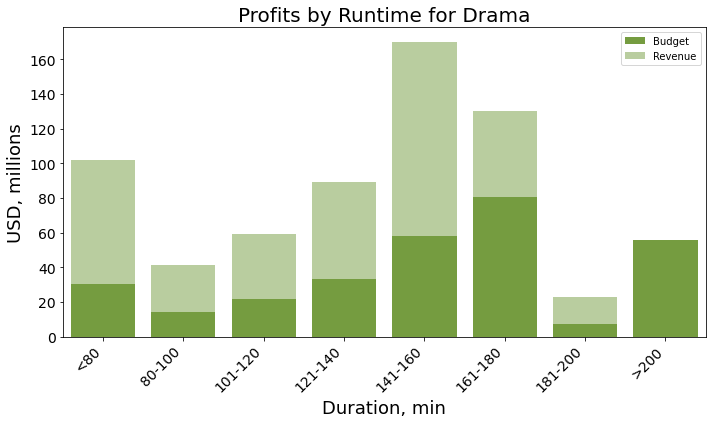

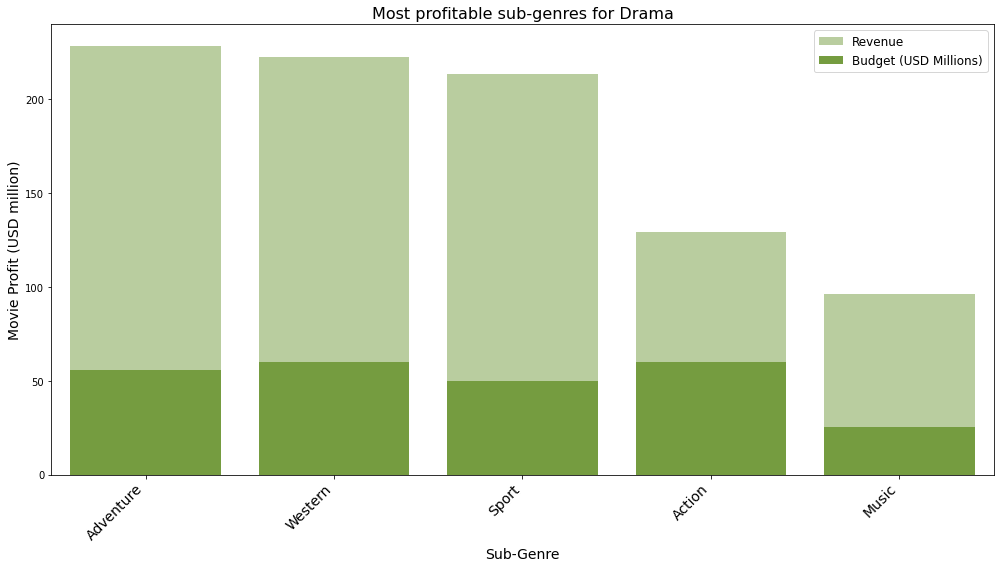

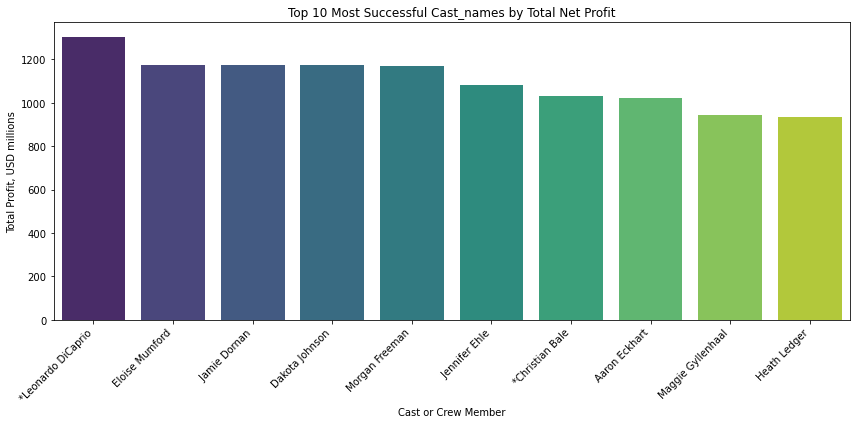

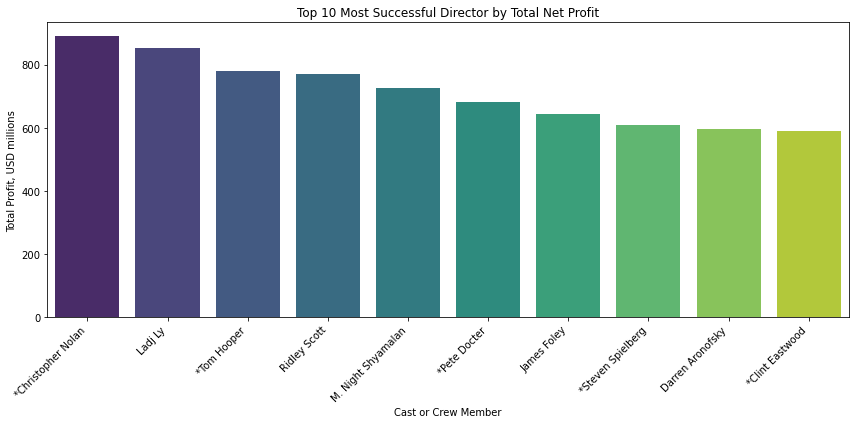

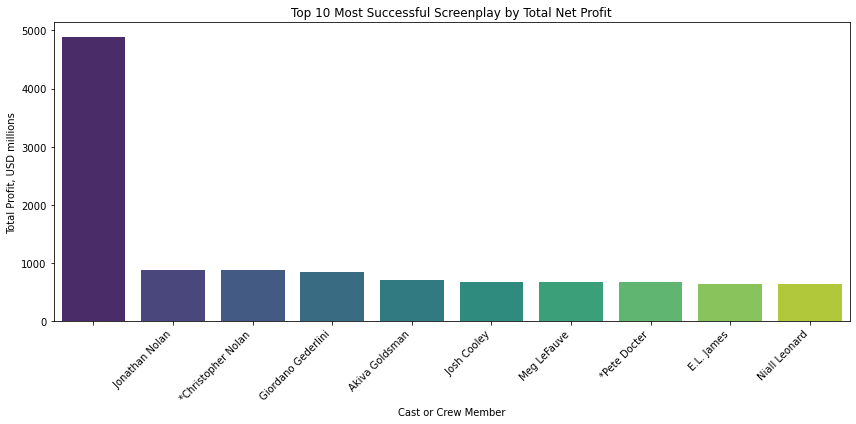

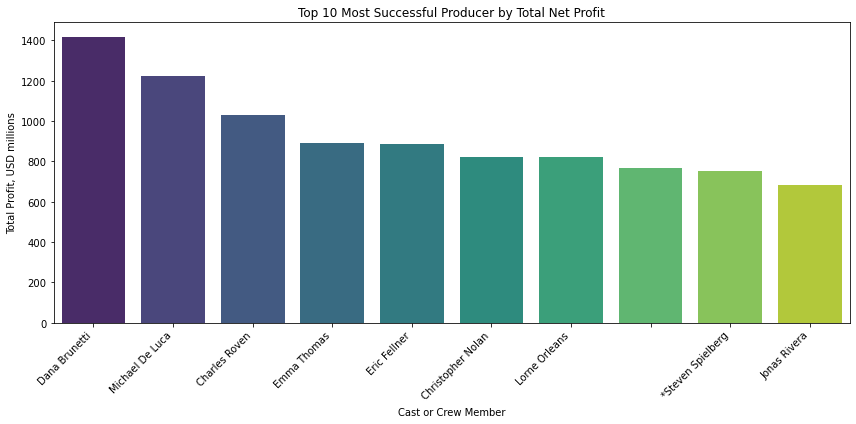

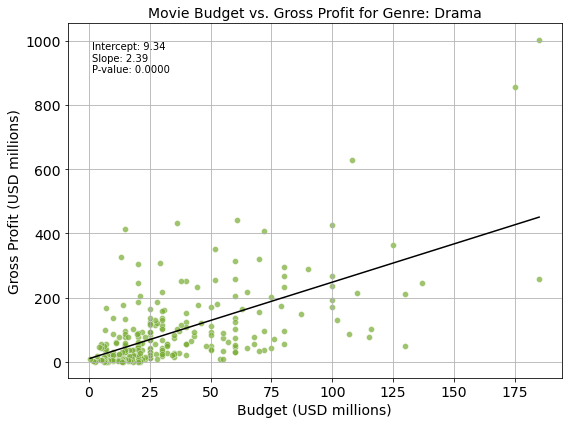

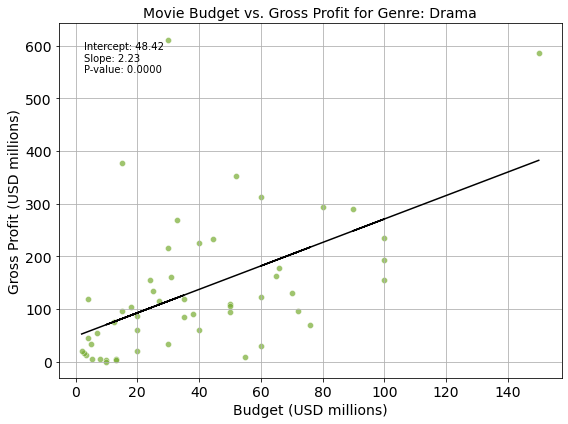

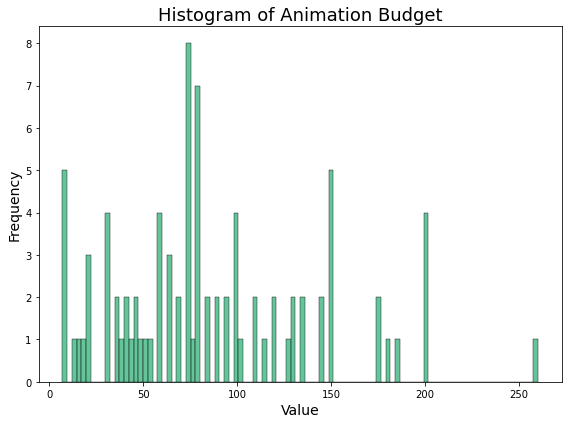

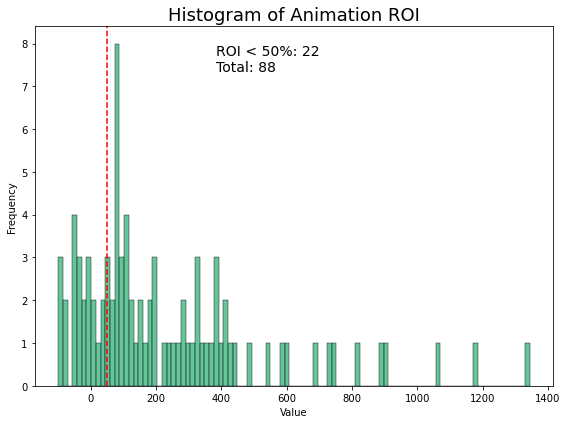

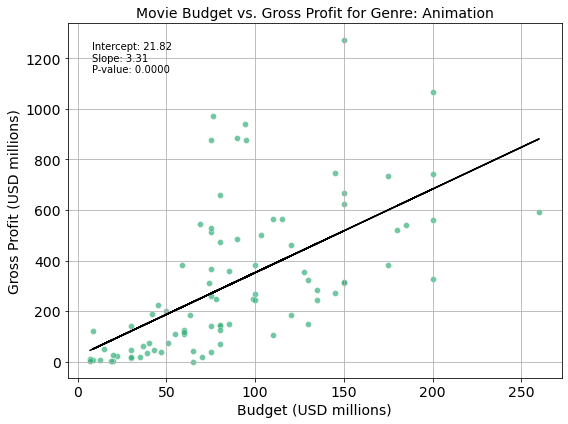

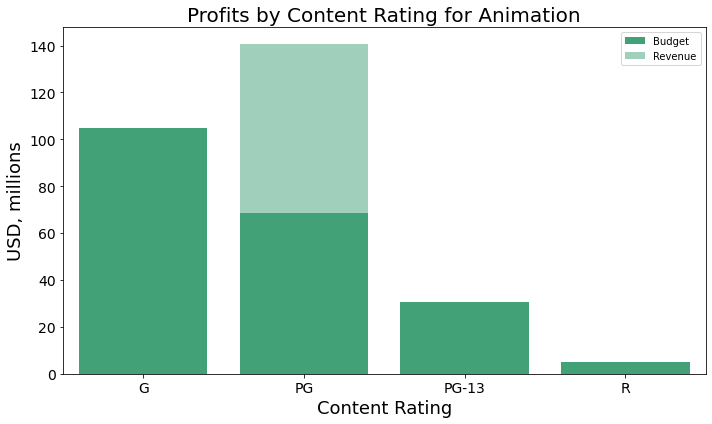

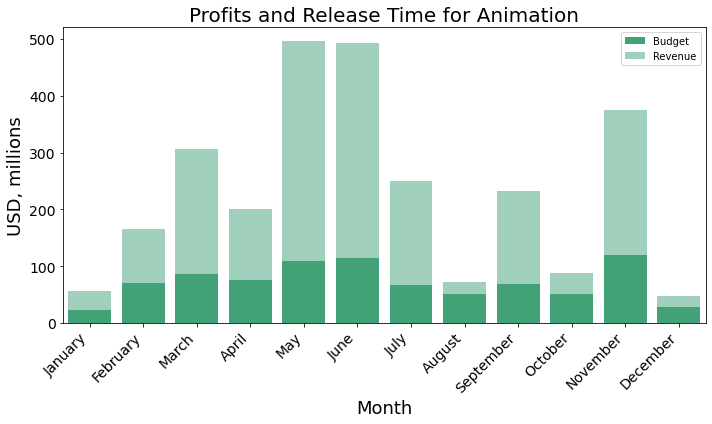

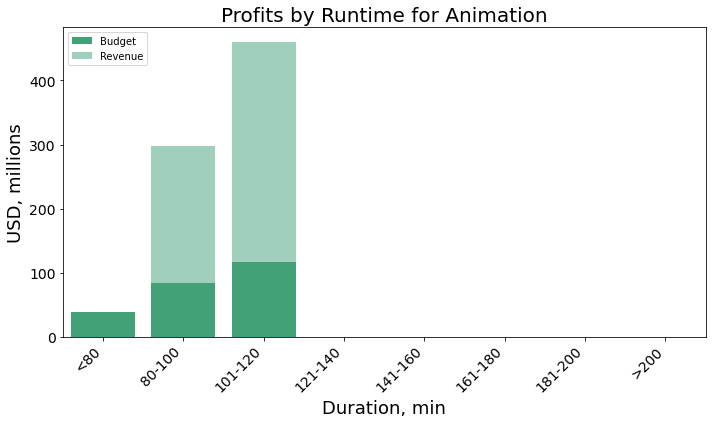

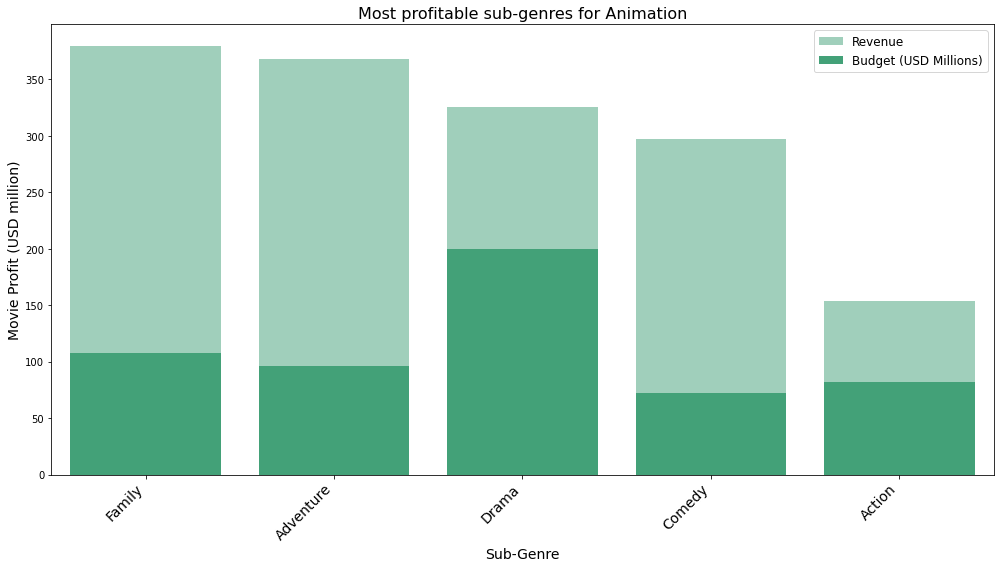

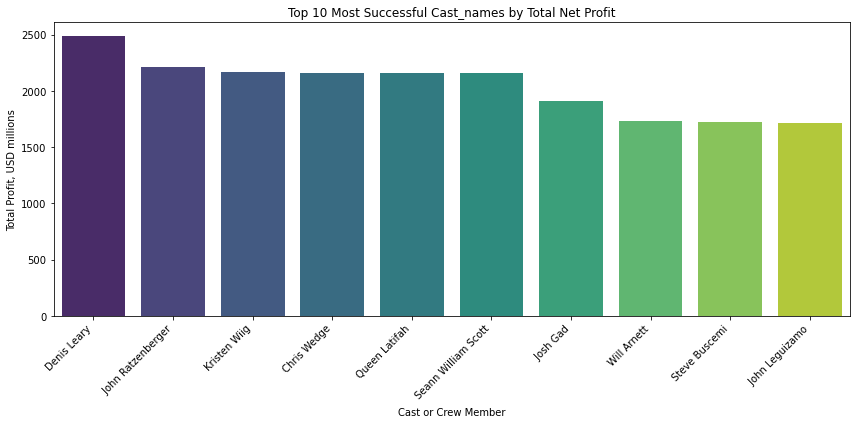

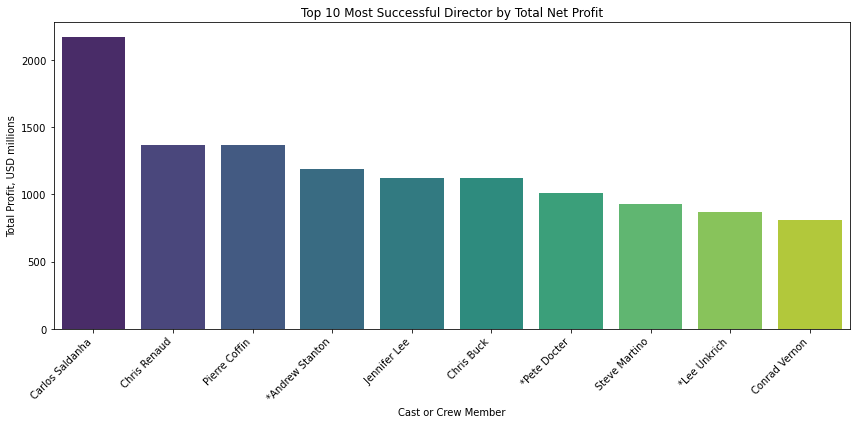

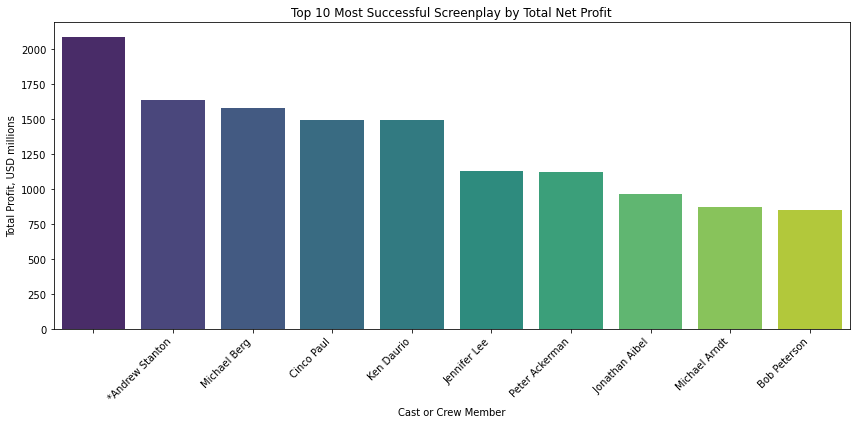

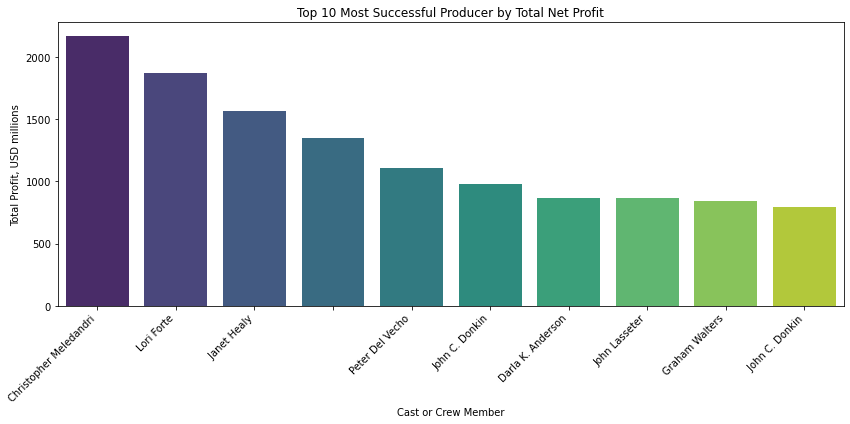

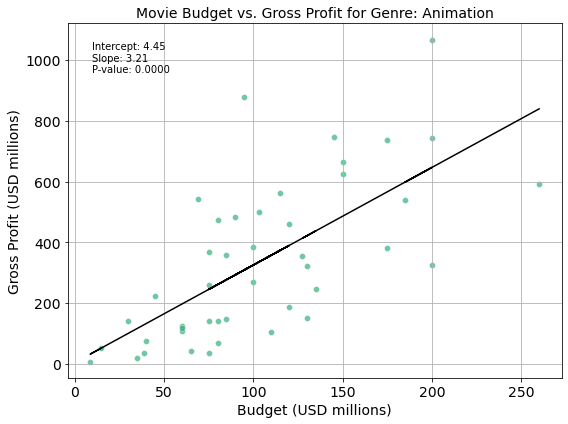

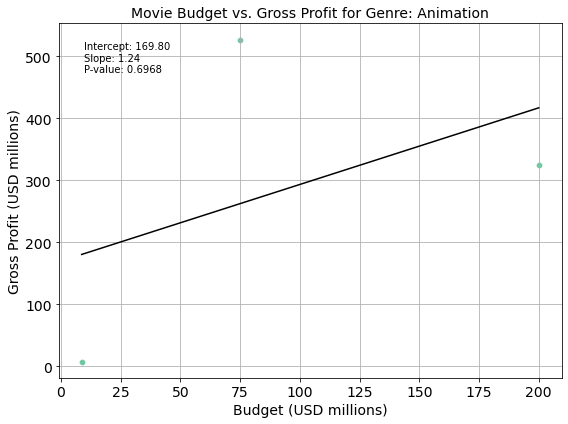

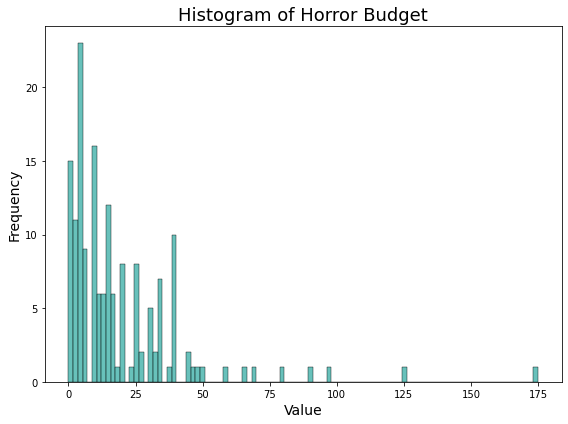

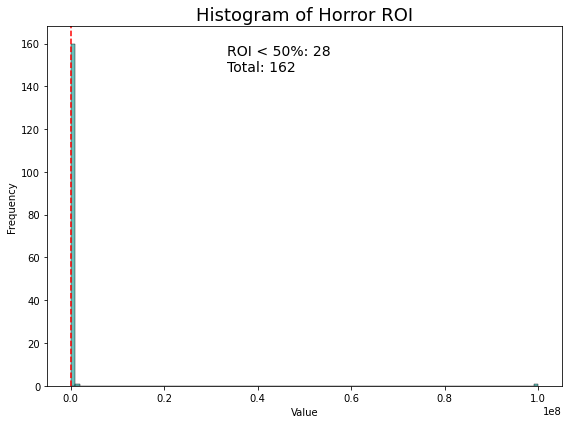

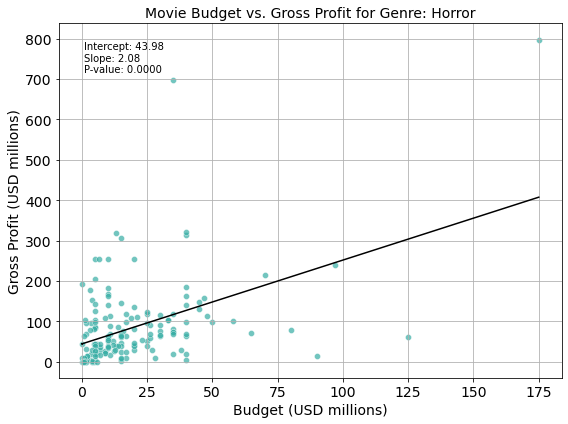

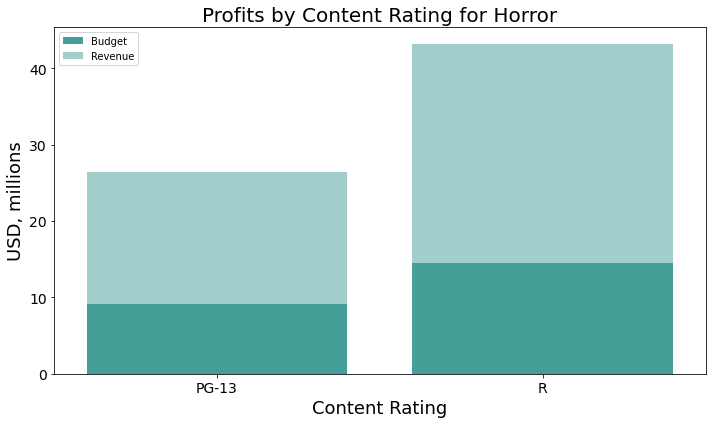

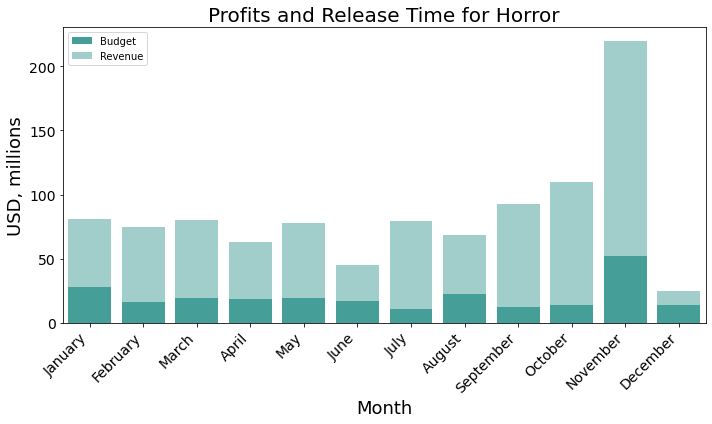

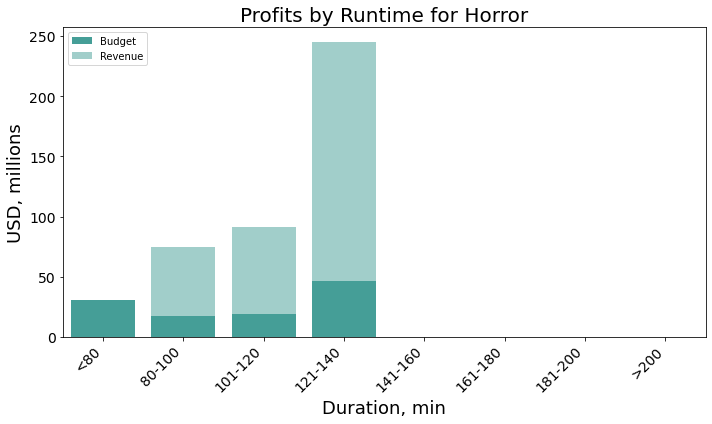

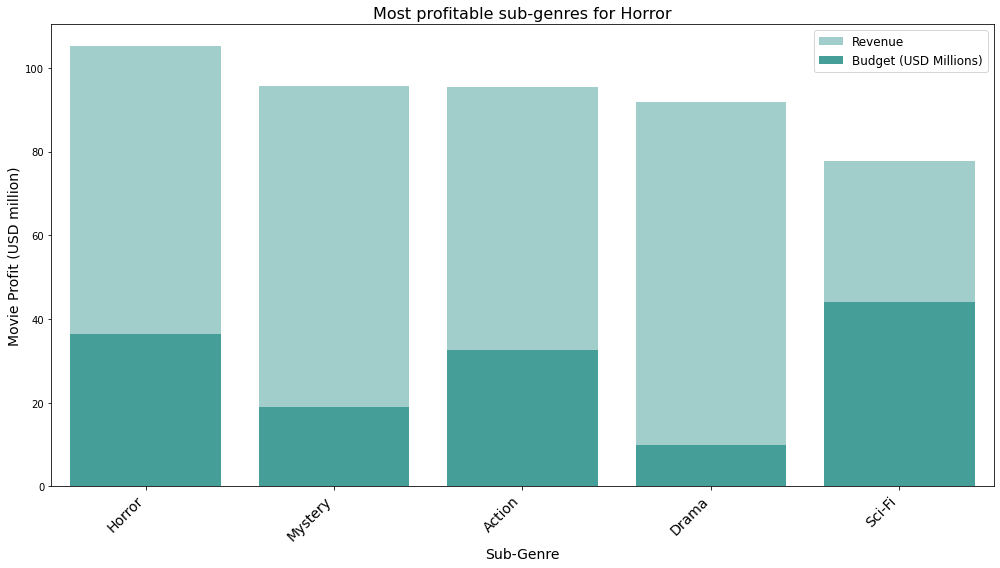

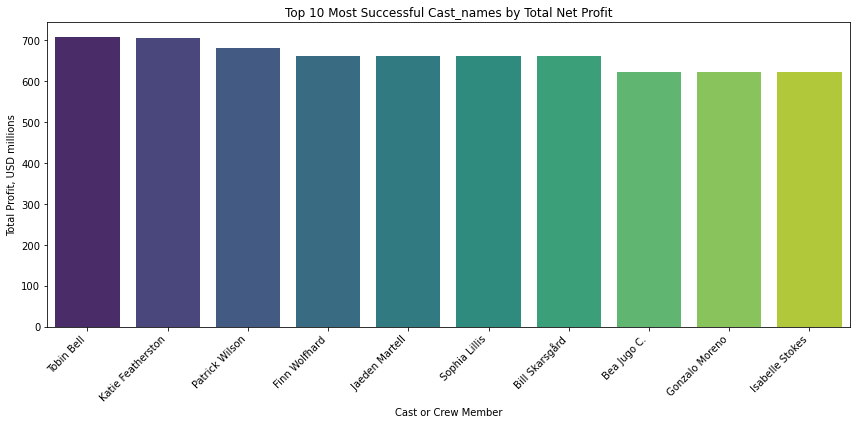

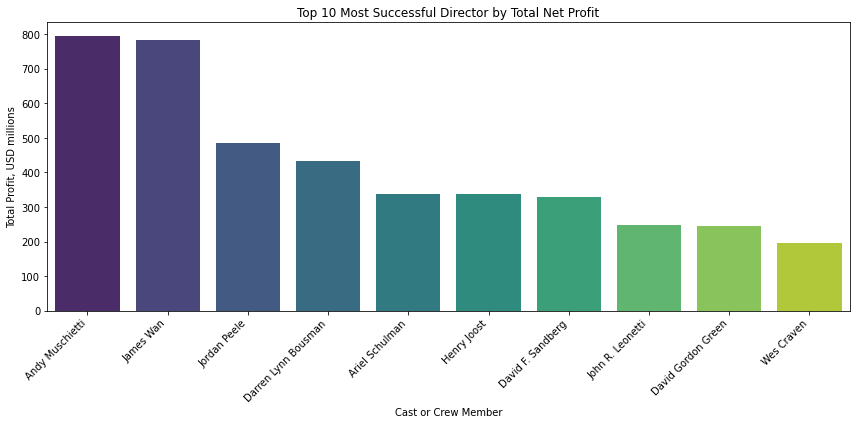

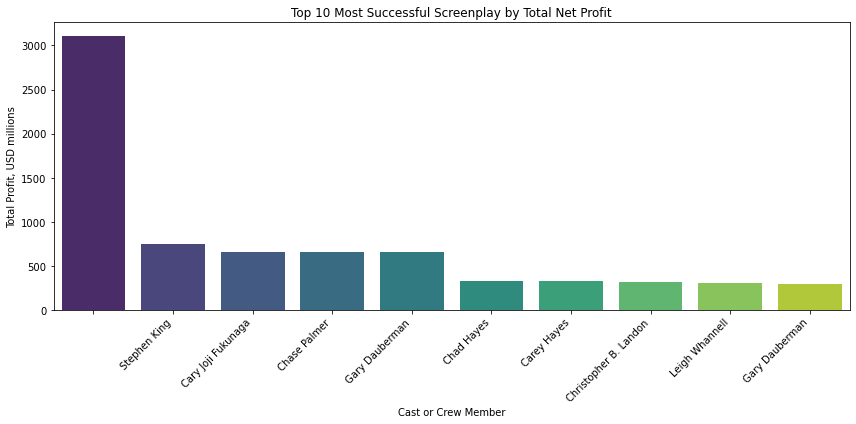

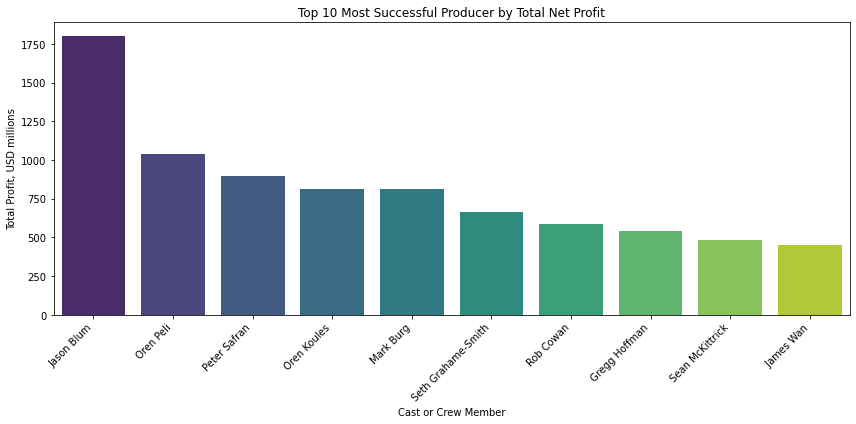

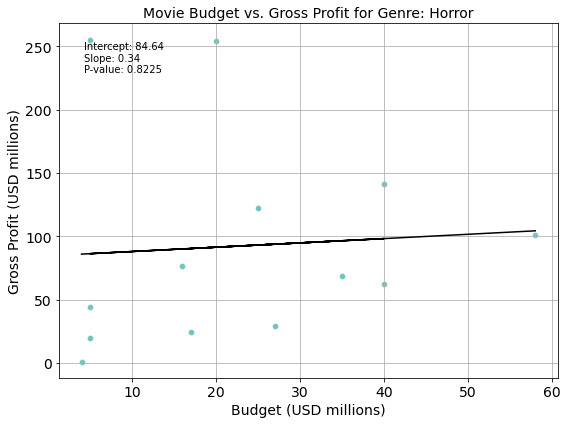

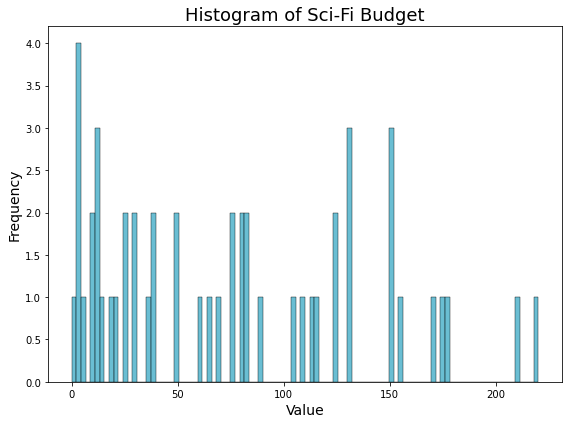

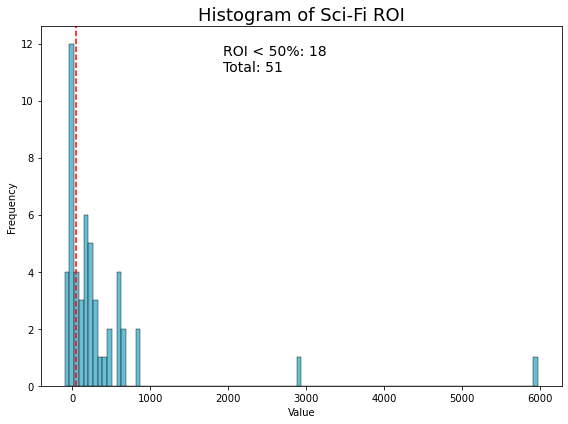

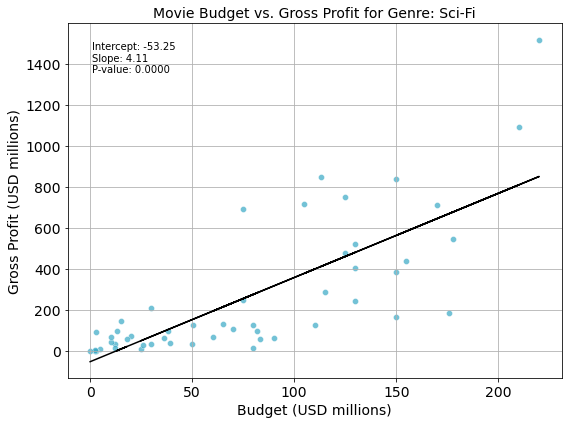

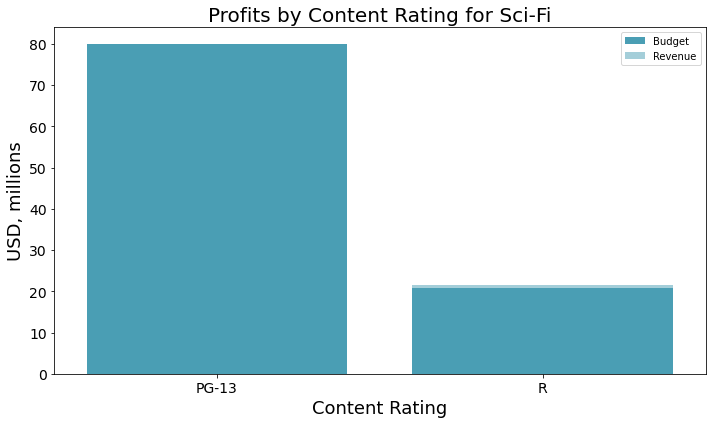

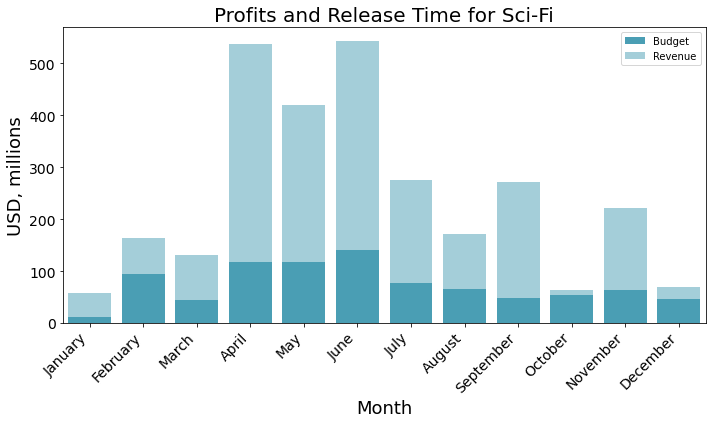

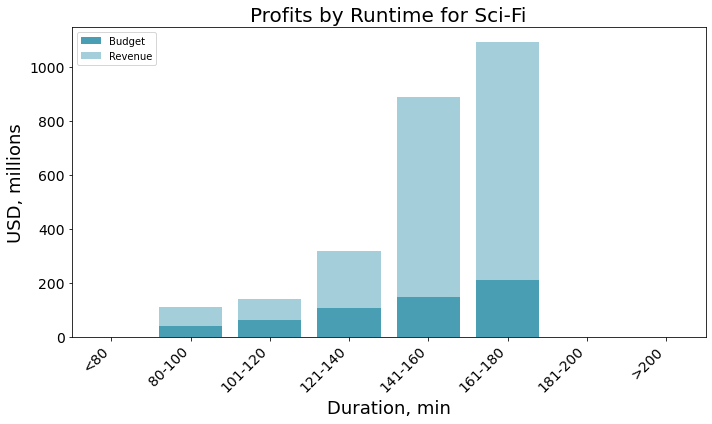

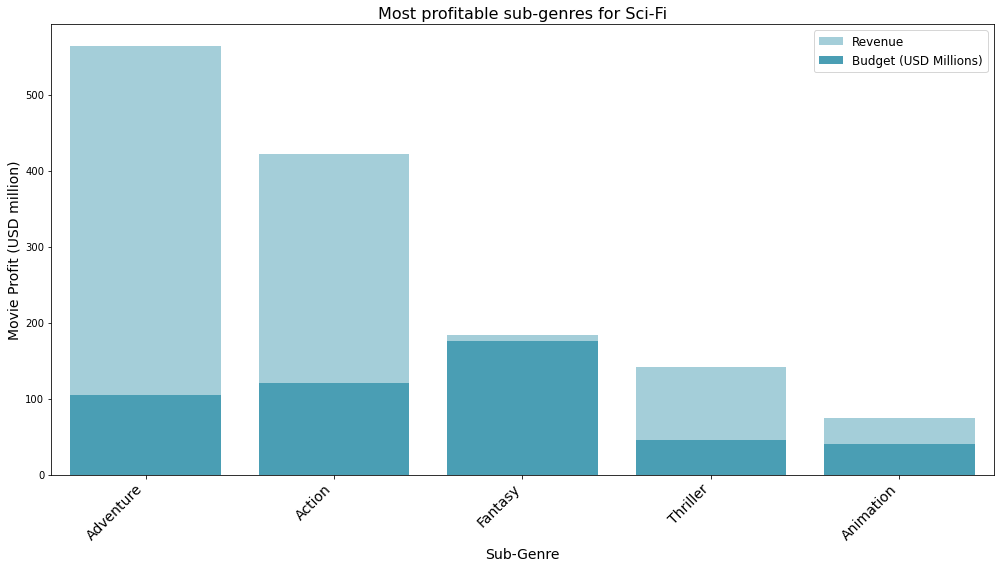

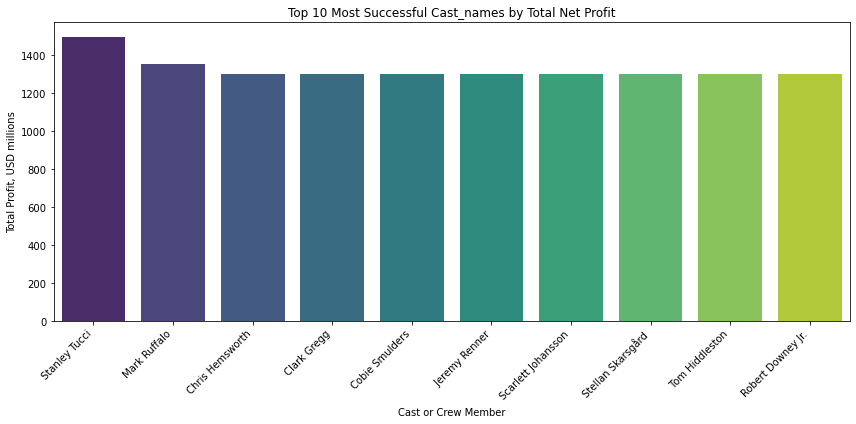

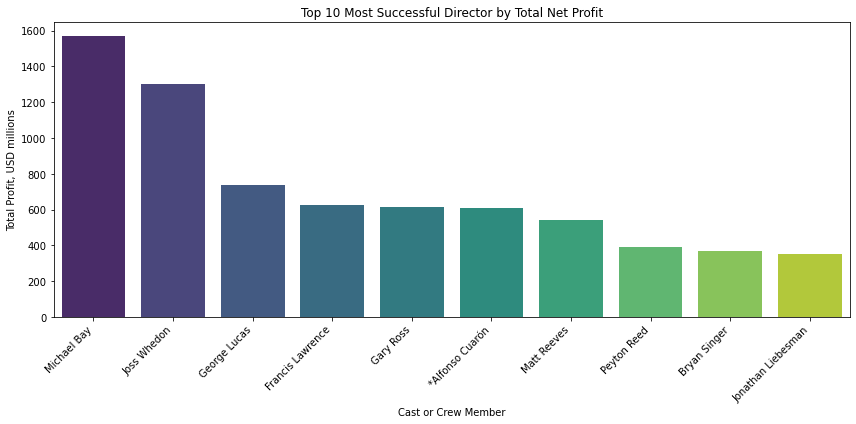

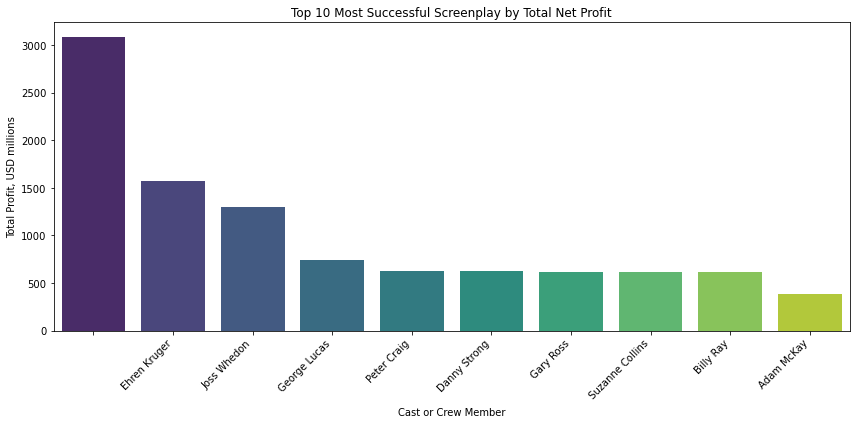

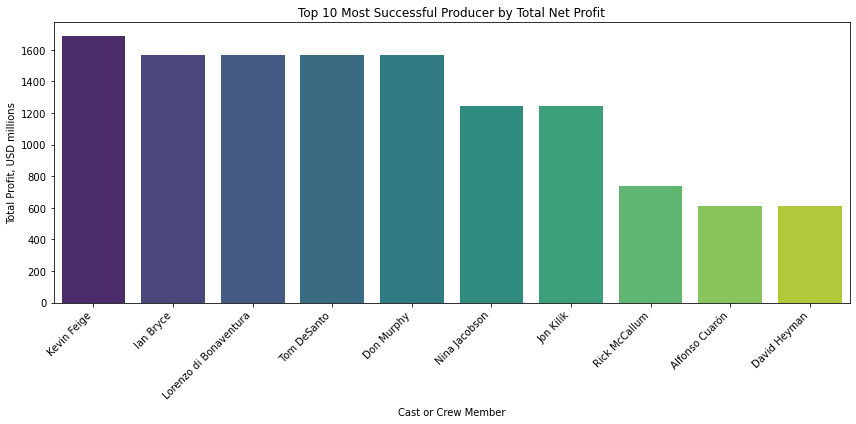

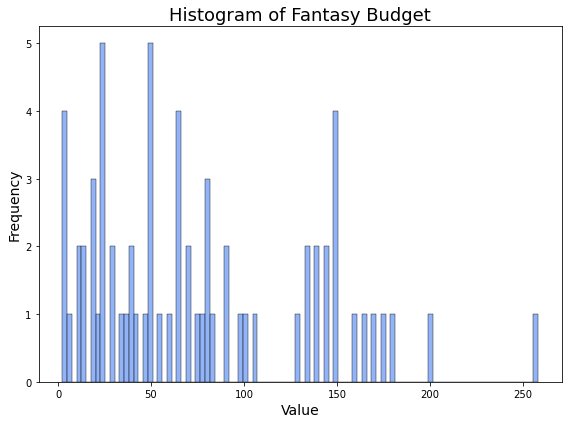

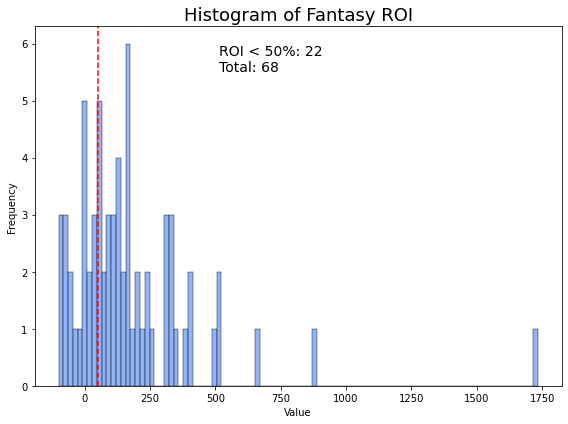

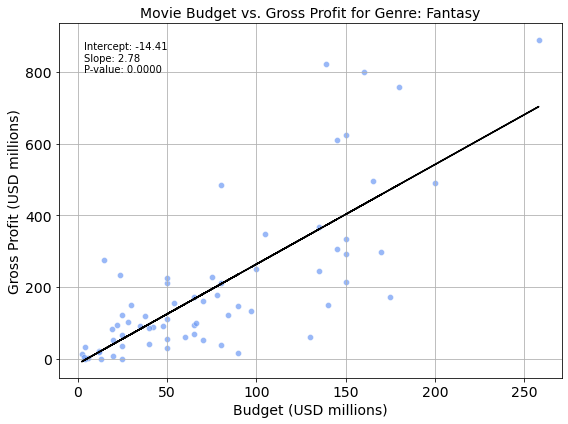

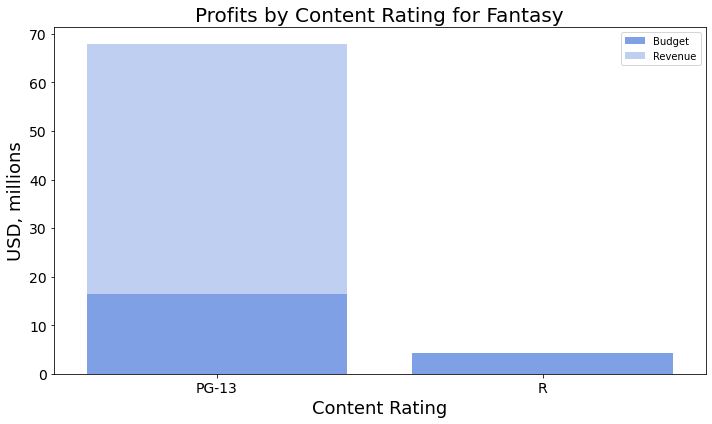

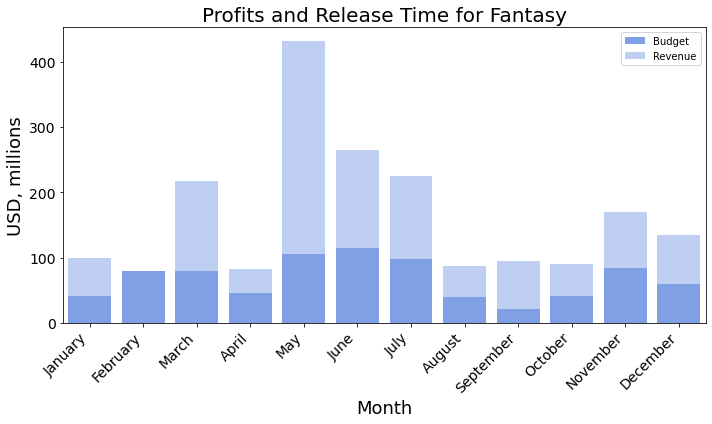

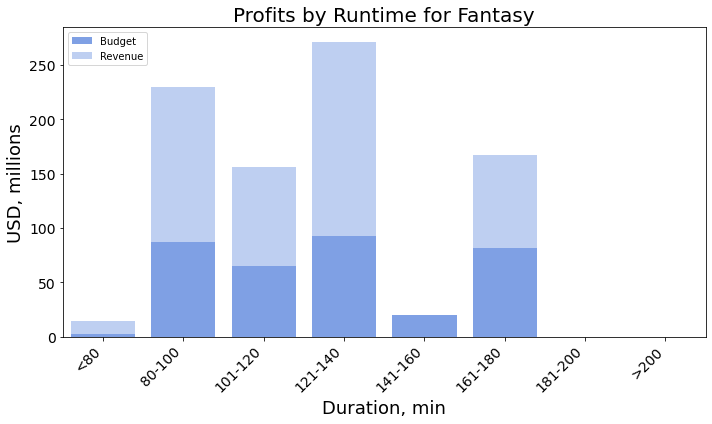

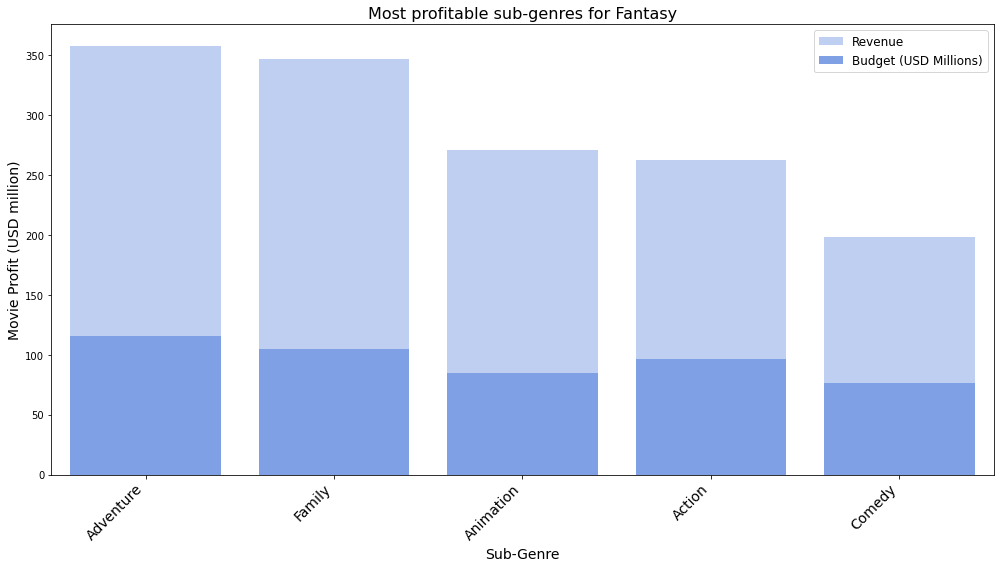

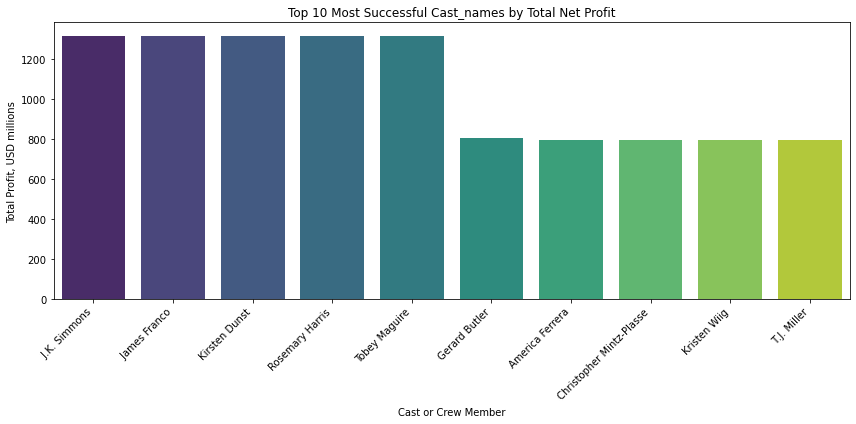

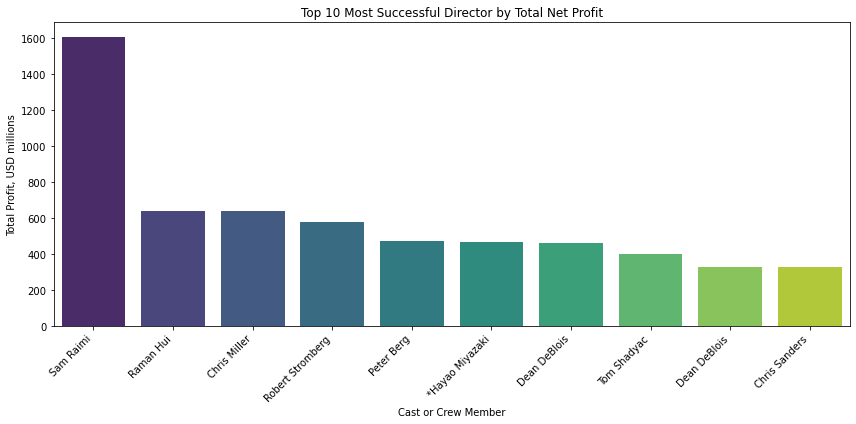

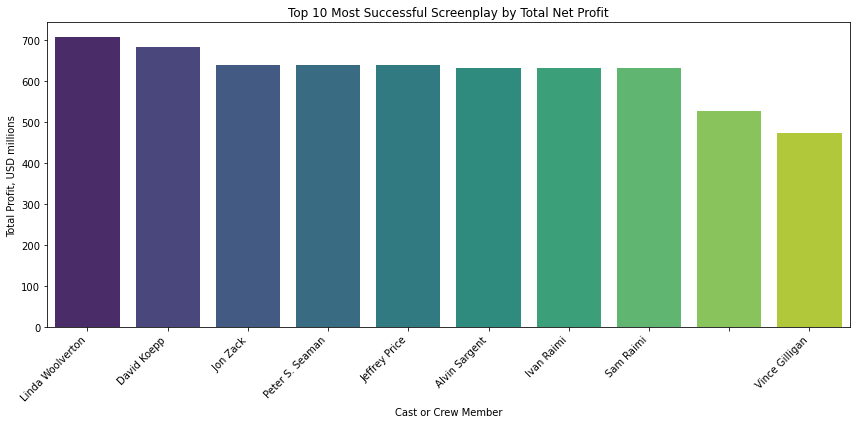

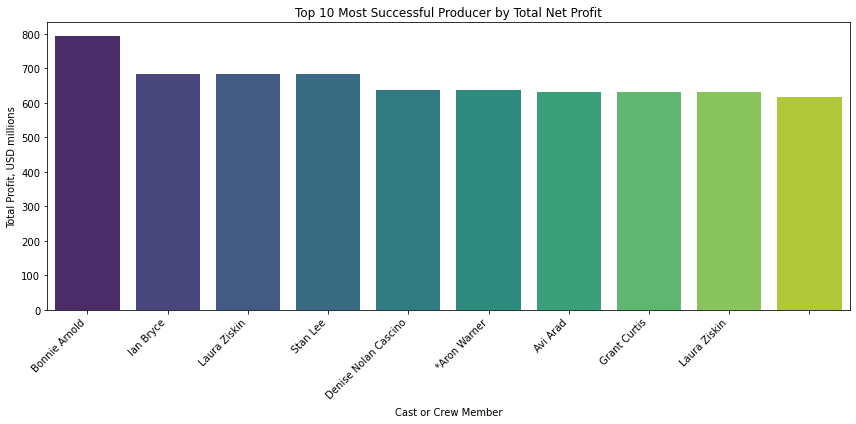

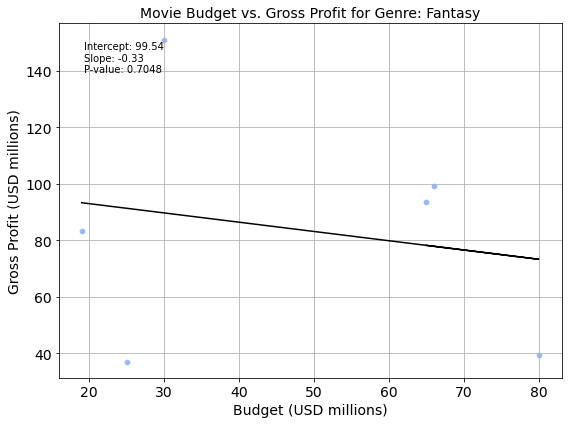

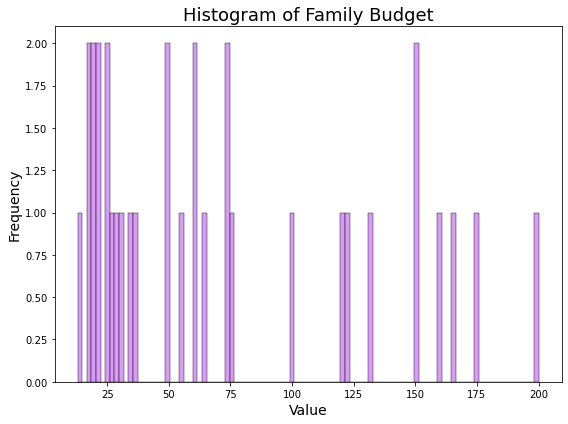

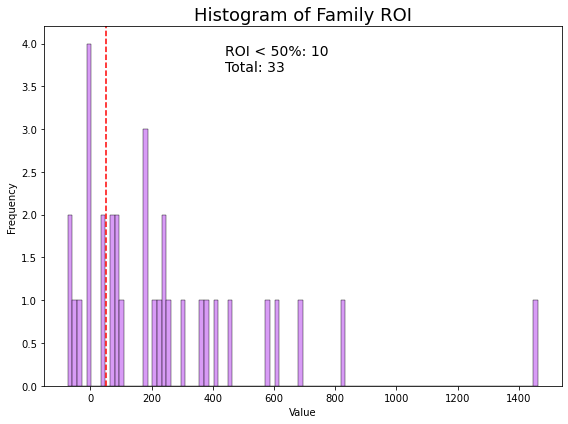

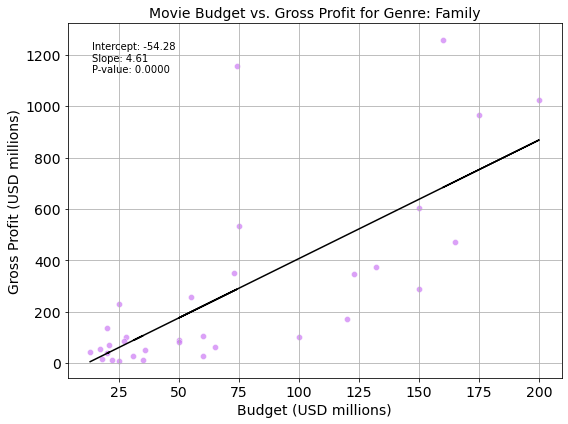

ValueError: min() arg is an empty sequence Family


<Figure size 720x432 with 0 Axes>

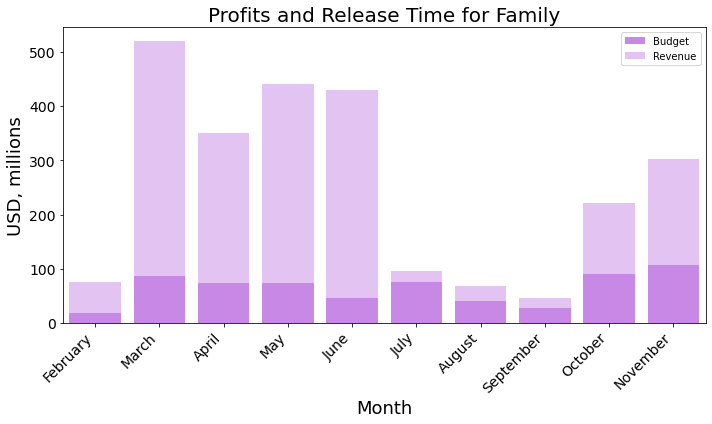

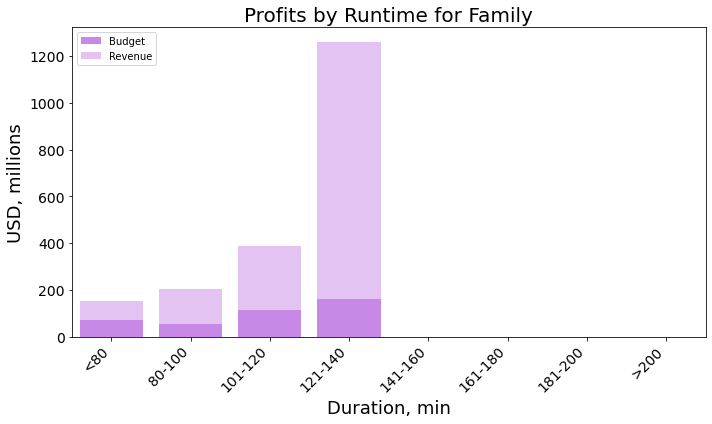

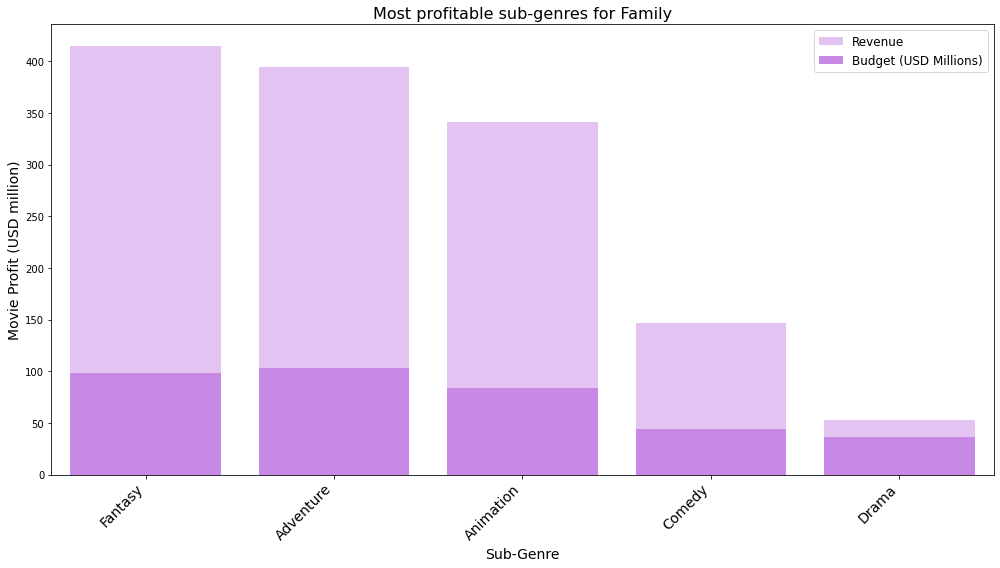

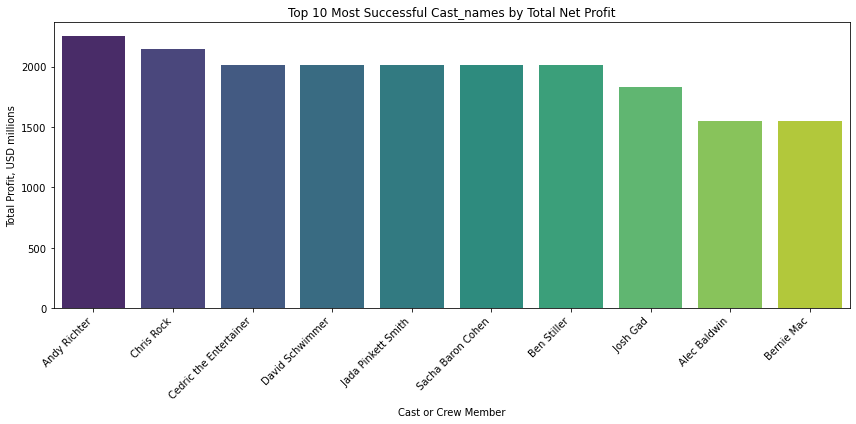

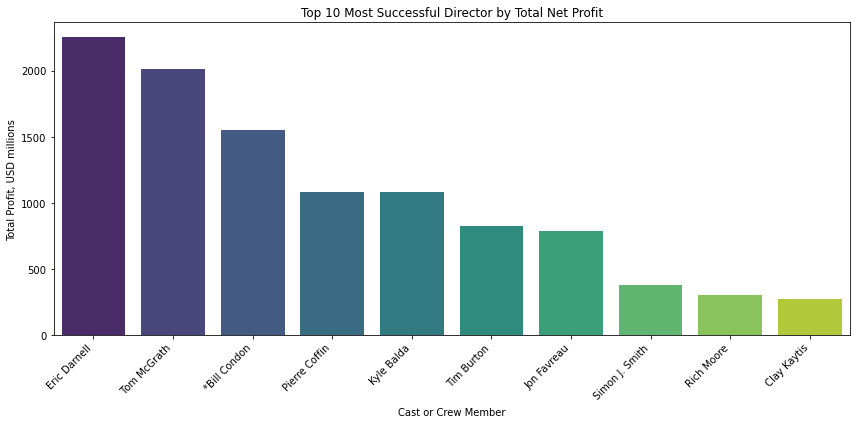

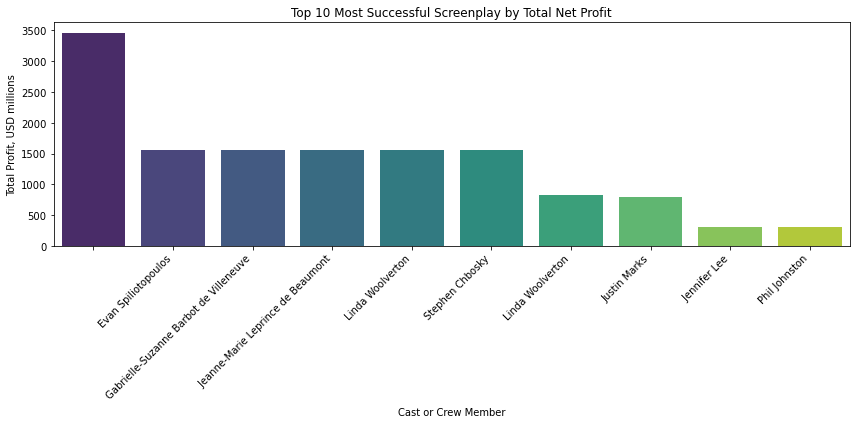

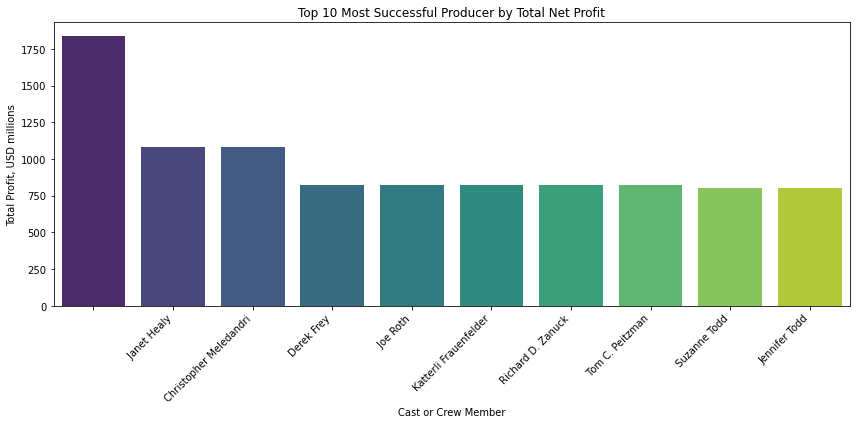

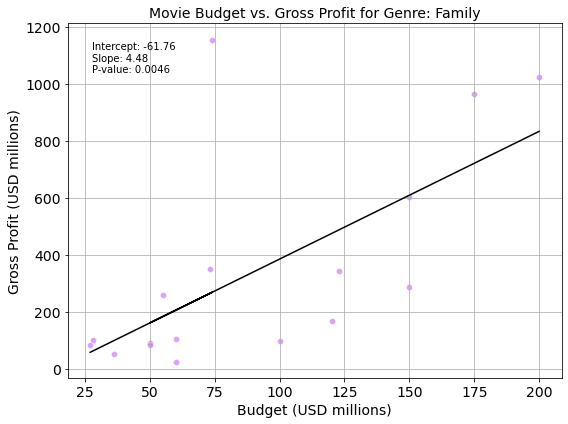

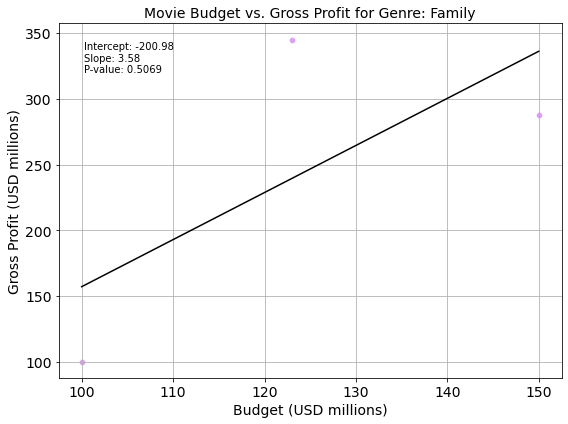

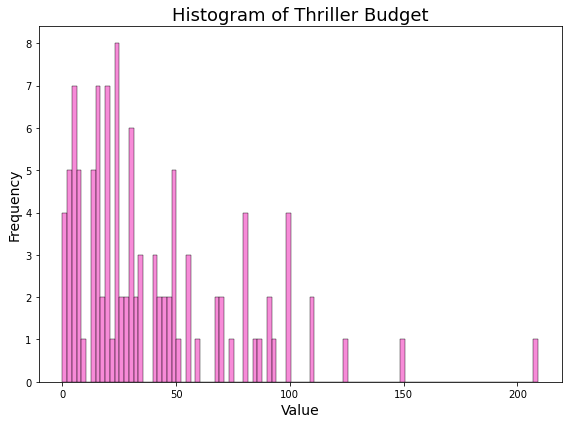

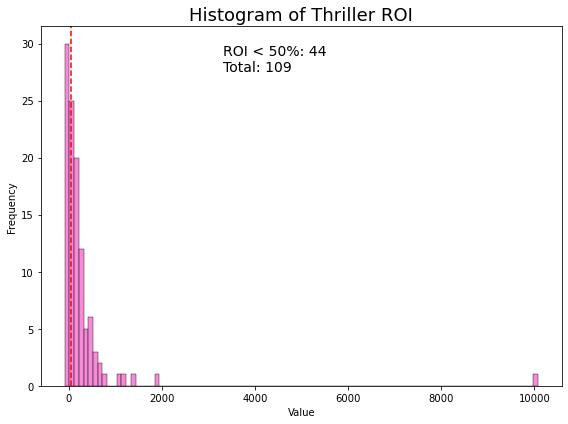

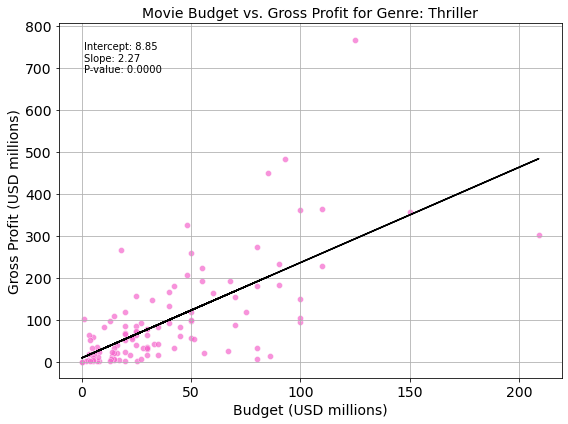

ValueError: min() arg is an empty sequence Thriller


<Figure size 720x432 with 0 Axes>

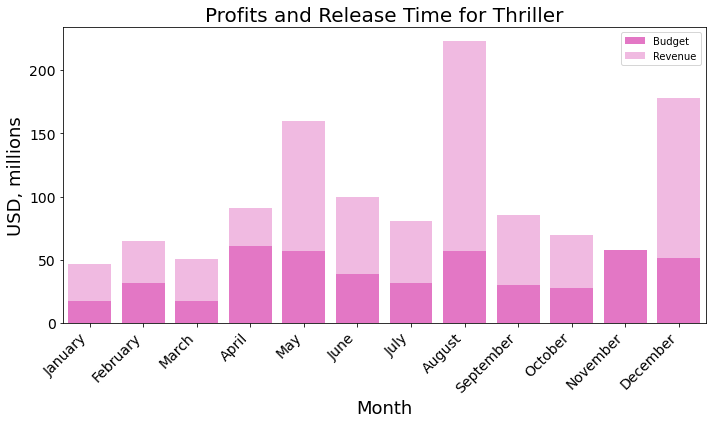

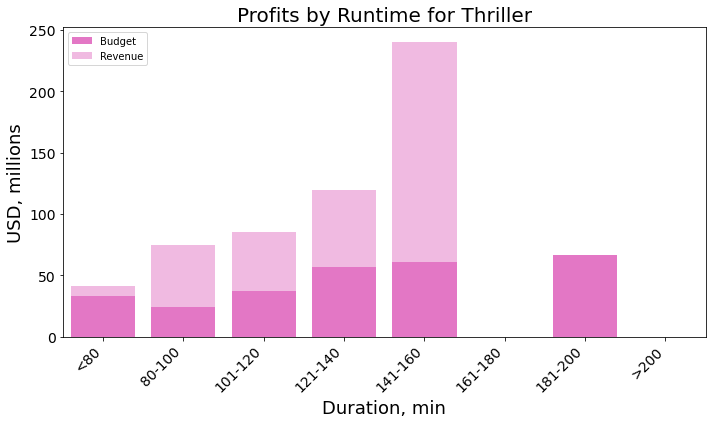

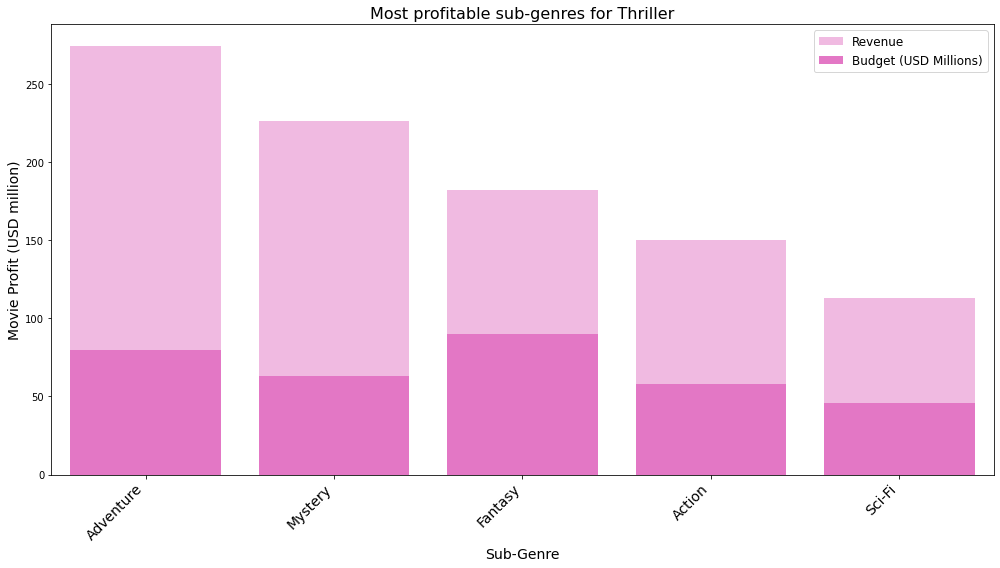

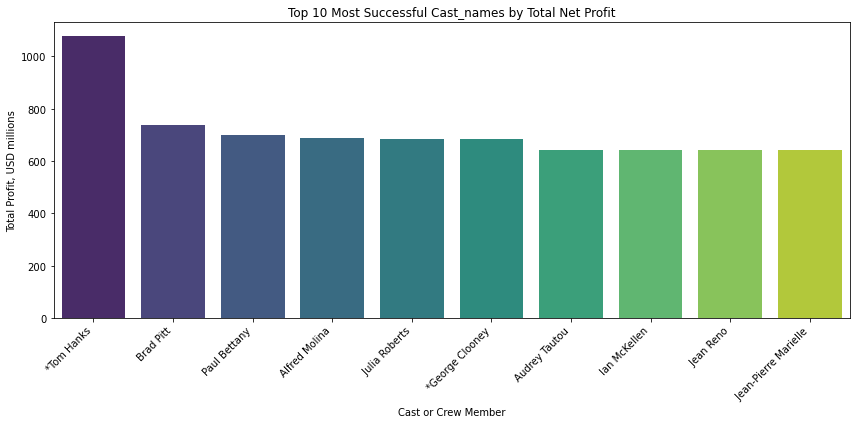

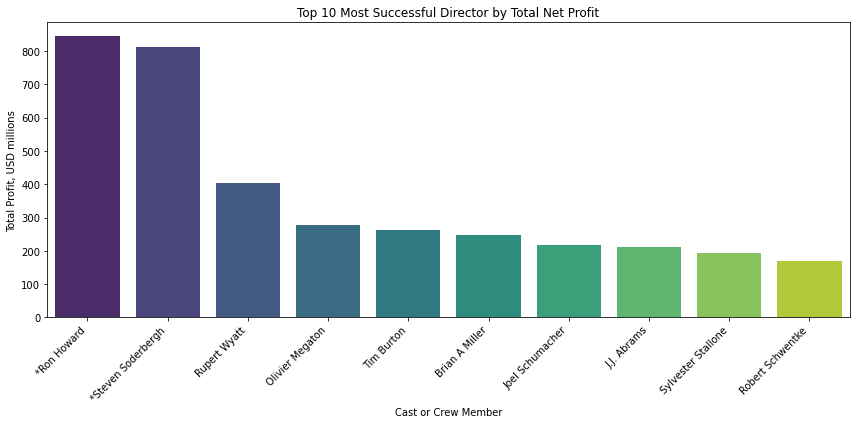

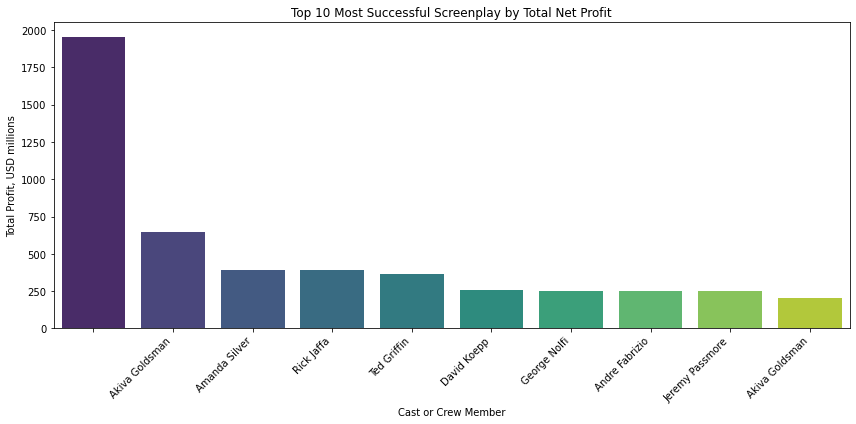

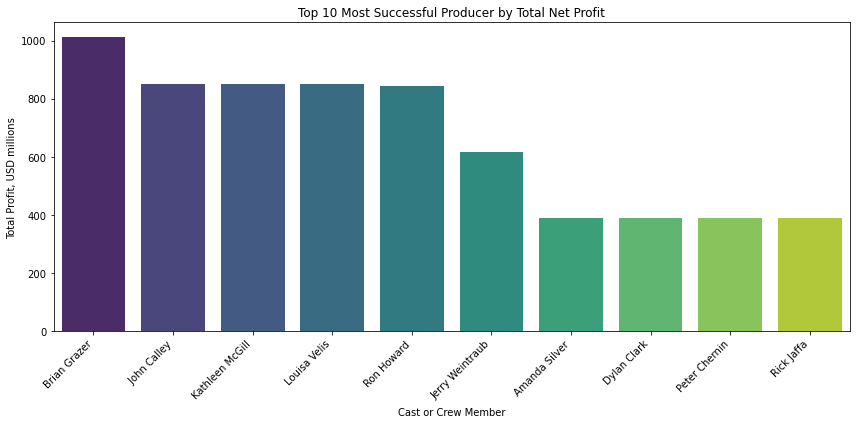

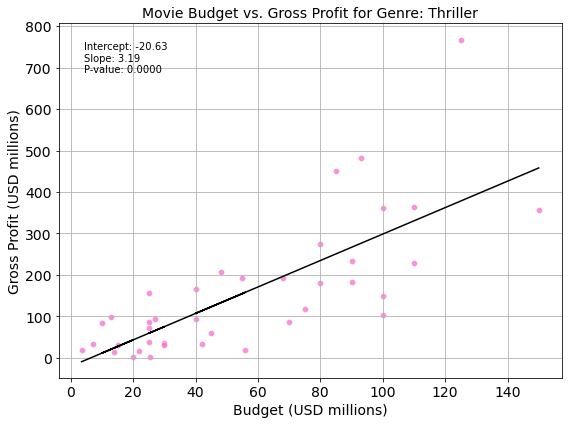

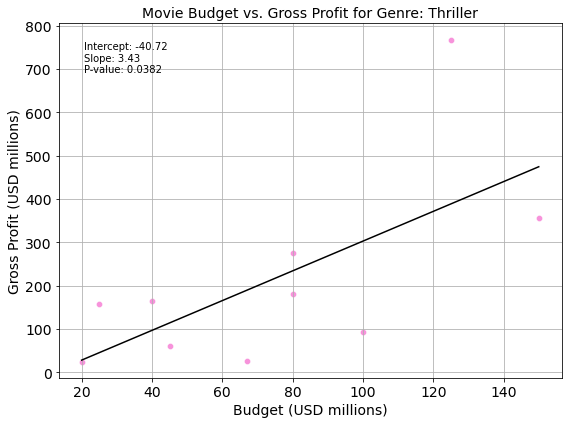

In [118]:
# recommendation table
recommendations_genre = [];
grouped_df = movie_df[movie_df['genre1'].isin(top10_genres)]
grouped_content_df = content_rating_clean_df[content_rating_clean_df['genre1'].isin(top10_genres)]
palette = sns.color_palette("husl", n_colors=len(top10_genres))

for genre, color in zip(top10_genres, palette):
    g_df = grouped_df[grouped_df['genre1'] == genre]
    contentR_df = grouped_content_df[grouped_content_df['genre1'] == genre]
    #display_success_genre(genre_df, genre, color)
    
    #budget historic, success, roi, disribution
    display_genre_budget_hist(g_df, genre, color, path_dir_results)
    display_genre_roi_hist(g_df, genre, color, path_dir_results)
    expected_ret = display_genre_ols(g_df, genre, color, path_dir_results)
    
    median_budget = g_df['budget_usd_mil'].median()
    
    #content rating (try/catch for low-data genre)
    preferred_content = display_genre_content_rating(contentR_df, genre, color, path_dir_results)    
    
    #release month
    preferred_month = display_genre_release_month(g_df, genre, color, path_dir_results)
    #duration
    preferred_duration = display_genre_duration(g_df, genre, color, path_dir_results)

    #subgenre
    preferred_subgenre = plot_genre_subgenre_bar(g_df, genre, color, path_dir_results)
    
    # 
    top_cast = display_top_cast_or_crew_with_awards(g_df, genre, 'cast_names', all_winners_set, color, path_dir_results)
    top_director = display_top_cast_or_crew_with_awards(g_df, genre, 'director', all_winners_set, color, path_dir_results)
    top_screenplay = display_top_cast_or_crew_with_awards(g_df, genre, 'screenplay', all_winners_set, color, path_dir_results)
    top_producer = display_top_cast_or_crew_with_awards(g_df, genre, 'producer', all_winners_set, color, path_dir_results)
    
    #OLD with/without awards
    expected_cast_awards = 'N/A'
    expected_crew_awards = 'N/A'
    
    try:
        genre_df_cast_awarded = g_df[(g_df['cast_awarded']>1)]
        if genre_df_crew_awarded.shape[0] > 1:
            expected_cast_awards = display_genre_ols(genre_df_cast_awarded, genre, color, path_dir_results)
        
    except ValueError as e:
        print('Error')
    try:    
        genre_df_crew_awarded = g_df[(g_df['crew_awards']>1)]
        if genre_df_crew_awarded.shape[0] > 1:
            expected_crew_awards = display_genre_ols(genre_df_crew_awarded, genre, color, path_dir_results)    
    except ValueError as e:
        print('Error')
        
    
    # add values 
    genre_data = {
        'Genre': genre,
        'Median Budget': median_budget,       
        'Recommended Subgenres': preferred_subgenre,
        'Recommended Content Rating': preferred_content,
        'Recommended Months': preferred_month,
        'Recommended Duration': preferred_duration,
        'Recommended Cast': top_cast,
        'Recommended Directors': top_director,
        'Recommended Writers': top_screenplay,
        'Recommended Producers': top_producer,
        'Expected Return': expected_ret,
        'Expected Return with Cast Awards': expected_cast_awards,
        'Expected Return with Crew Awards': expected_crew_awards,        
    }
    
    # Append the dictionary to the list
    recommendations_genre.append(genre_data)
genre_recommend_df = pd.DataFrame(recommendations_genre)

In [119]:
genre_recommend_df

Genre  Median Budget                            Recommended Subgenres  \
0     Action          50.00          Adventure, War, Sci-Fi, Mystery, Horror   
1  Adventure          77.00     Thriller, Fantasy, Action, Family, Animation   
2     Comedy          25.00     Animation, Fantasy, Adventure, Family, Music   
3      Drama          18.00         Adventure, Western, Sport, Action, Music   
4  Animation          77.00         Family, Adventure, Drama, Comedy, Action   
5     Horror          12.55           Horror, Mystery, Action, Drama, Sci-Fi   
6     Sci-Fi          70.00  Adventure, Action, Fantasy, Thriller, Animation   
7    Fantasy          65.00     Adventure, Family, Animation, Action, Comedy   
8     Family          55.00     Fantasy, Adventure, Animation, Comedy, Drama   
9   Thriller          27.22      Adventure, Mystery, Fantasy, Action, Sci-Fi   

  Recommended Content Rating            Recommended Months  \
0                      PG-13           December, June, May   
1                      PG-13           May, November, June   
2                          G           December, May, July   
3                          G      December, February, June   
4                         PG           May, June, November   
5                          R  November, October, September   
6                          R              June, April, May   
7                      PG-13               May, June, July   
8                       None              March, May, June   
9                       None         August, December, May   

        Recommended Duration  \
0  161-180, 141-160, 121-140   
1     >200, 161-180, 141-160   
2   121-140, 101-120, 80-100   
3      141-160, 161-180, <80   
4       101-120, 80-100, <80   
5   121-140, 101-120, 80-100   
6  161-180, 141-160, 121-140   
7   121-140, 80-100, 161-180   
8   121-140, 101-120, 80-100   
9  141-160, 121-140, 101-120   

                                    Recommended Cast  \
0   Michelle Rodriguez, Robert Downey Jr.,  Dwayn...   
1   Orlando Bloom,  Alan Rickman,  Rupert Grint, ...   
2   Justin Long,  Jane Lynch,  Christina Applegat...   
3  *Leonardo DiCaprio,  Eloise Mumford,  Jamie Do...   
4   Denis Leary,  John Ratzenberger,  Kristen Wii...   
5  Tobin Bell, Katie Featherston, Patrick Wilson,...   
6   Stanley Tucci,  Mark Ruffalo,  Chris Hemswort...   
7   J.K. Simmons,  James Franco,  Kirsten Dunst, ...   
8   Andy Richter,  Chris Rock,  Cedric the Entert...   
9  *Tom Hanks,  Brad Pitt,  Paul Bettany,  Alfred...   

                               Recommended Directors  \
0  *Christopher Nolan, *James Cameron, James Wan,...   
1  *Peter Jackson, *Gore Verbinski, Andrew Adamso...   
2  Todd Phillips, Jay Roach, Mike Mitchell, Nancy...   
3  *Christopher Nolan, Ladj Ly, *Tom Hooper, Ridl...   
4  Carlos Saldanha,  Chris Renaud, Pierre Coffin,...   
5  Andy Muschietti, James Wan, Jordan Peele, Darr...   
6  Michael Bay, Joss Whedon, George Lucas, Franci...   
7  Sam Raimi,  Raman Hui, Chris Miller, Robert St...   
8  Eric Darnell,  Tom McGrath, *Bill Condon,  Pie...   
9  *Ron Howard, *Steven Soderbergh, Rupert Wyatt,...   

                                 Recommended Writers  \
0  ,  Derek Connolly,  Stephen McFeely, Jack Kirb...   
1   Fran Walsh,  Philippa Boyens, *Peter Jackson,...   
2  ,  John Hamburg, Jim Herzfeld, Adam Herz,  Joh...   
3  ,  Jonathan Nolan, *Christopher Nolan, Giordan...   
4  , *Andrew Stanton, Michael Berg,  Cinco Paul, ...   
5  , Stephen King,  Cary Joji Fukunaga,  Chase Pa...   
6  , Ehren Kruger, Joss Whedon, George Lucas,  Pe...   
7  Linda Woolverton, David Koepp,  Jon Zack,  Pet...   
8  ,  Evan Spiliotopoulos,  Gabrielle-Suzanne Bar...   
9  , Akiva Goldsman,  Amanda Silver, Rick Jaffa, ...   

                               Recommended Producers  Expected Return  \
0  Kevin Feige, Charles Roven, Michael Fottrell, ...         3.625257   
1  David Heyman, Jerry Bruckheimer,  Peter Jackso...         3.072408   
2  ,  Jay Roach,  Ja

In [121]:
!pip install tabulate

markdown_table = genre_recommend_df.to_markdown()
print(markdown_table)

|    | Genre     |   Median Budget | Recommended Subgenres                           | Recommended Content Rating   | Recommended Months           | Recommended Duration      | Recommended Cast                                                                                                                                                           | Recommended Directors                                                                                                                                            | Recommended Writers                                                                                                                                                                                   | Recommended Producers                                                                                                                                               |   Expected Return | Expected Return with Cast Awards   | Expected Return with Crew Awards   |
|---:|:----------|---------

# 5. Conclusions.

We have performed EDA on multiple dataframes, and explored how movie factors like genre, release time, duration, cast or crew can influence the budget and the gross in box office.    
Here's the extended recommendation table.

|    | Genre     |   Median Budget | Recommended Subgenres                           | Recommended Content Rating   | Recommended Months           | Recommended Duration      | Recommended Cast                                                                                                                                                           | Recommended Directors                                                                                                                                            | Recommended Writers                                                                                                                                                                                   | Recommended Producers                                                                                                                                               |   Expected Return | Expected Return with Cast Awards   | Expected Return with Crew Awards   |
|---:|:----------|----------------:|:------------------------------------------------|:-----------------------------|:-----------------------------|:--------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|:-----------------------------------|:-----------------------------------|
|  0 | Action    |           50    | Adventure, War, Sci-Fi, Mystery, Horror         | PG-13                        | December, June, May          | 161-180, 141-160, 121-140 | Michelle Rodriguez, Robert Downey Jr.,  Dwayne Johnson, Vin Diesel,  Chris Hemsworth,  Zoe Saldana,  Mark Ruffalo, Tom Cruise,  Samuel L. Jackson,  Jordana Brewster       | *Christopher Nolan, *James Cameron, James Wan,  Joe Russo, Anthony Russo, *Brad Bird, Roland Emmerich, Zack Snyder, Rian Johnson, *Christopher McQuarrie         | ,  Derek Connolly,  Stephen McFeely, Jack Kirby, *James Cameron, *Christopher Nolan,  Stan Lee,  Chris McKenna,  Erik Sommers,  Colin Trevorrow                                                       | Kevin Feige, Charles Roven, Michael Fottrell,  Neal H. Moritz,  Emma Thomas,  Jon Landau, *James Cameron, Frank Marshall,  Bryan Burk,  Patrick Crowley             |           3.62526 | 3.4117907189027465                 | 7.302632565781717                  |
|  1 | Adventure |           77    | Thriller, Fantasy, Action, Family, Animation    | PG-13                        | May, November, June          | >200, 161-180, 141-160    | Orlando Bloom,  Alan Rickman,  Rupert Grint, Daniel Radcliffe,  Emma Watson,  Robbie Coltrane,  Ian McKellen,  Tom Felton, Johnny Depp,  Maggie Smith                      | *Peter Jackson, *Gore Verbinski, Andrew Adamson, David Yates, Chris Columbus, *Steven Spielberg,  Eric Guillon,  Pierre Coffin, Kyle Balda, Mike Newell          | Fran Walsh,  Philippa Boyens, *Peter Jackson, Steve Kloves, ,  Terry Rossio, Ted Elliott, Melissa Rosenberg,  Stephen McFeely, Andrew Adamson                                                         | David Heyman, Jerry Bruckheimer,  Peter Jackson, Barrie M. Osborne, Karen Rosenfelt,  Carolynne Cunningham,  Wyck Godfrey,  Fran Walsh, *Peter Jackson, Kevin Feige |           3.07241 | 3.317416449226497                  | 2.7724471438362843                 |
|  2 | Comedy    |           25    | Animation, Fantasy, Adventure, Family, Music    | G                            | December, May, July          | 121-140, 101-120, 80-100  | Justin Long,  Jane Lynch,  Christina Applegate,  Anna Faris,  Owen Wilson,  Julie Andrews, *Meryl Streep,  David Cross,  Colin Firth,  Zach Galifianakis                   | Todd Phillips, Jay Roach, Mike Mitchell, Nancy Meyers, Seth MacFarlane, Phyllida Lloyd, Dennis Dugan, Garry Marshall, Nicholas Stoller,  Peter Farrelly          | ,  John Hamburg, Jim Herzfeld, Adam Herz,  John Morris, Catherine Johnson,  Alec Sulkin,  Wellesley Wild, Seth MacFarlane, Jon Lucas                                                                  | ,  Jay Roach,  Jane Rosenthal, Robert De Niro, Judd Apatow,  Jack Giarraputo, Scott Rudin,  Jason Clark,  John Jacobs,  Daniel Goldberg                             |           2.31177 | 2.4811724953829564                 | 0.3294820481452031                 |
|  3 | Drama     |           18    | Adventure, Western, Sport, Action, Music        | G                            | December, February, June     | 141-160, 161-180, <80     | *Leonardo DiCaprio,  Eloise Mumford,  Jamie Dornan, Dakota Johnson,  Morgan Freeman,  Jennifer Ehle, *Christian Bale,  Aaron Eckhart,  Maggie Gyllenhaal,  Heath Ledger    | *Christopher Nolan, Ladj Ly, *Tom Hooper, Ridley Scott, M. Night Shyamalan, *Pete Docter, James Foley, *Steven Spielberg, Darren Aronofsky, *Clint Eastwood      | ,  Jonathan Nolan, *Christopher Nolan, Giordano Gederlini, Akiva Goldsman,  Josh Cooley,  Meg LeFauve, *Pete Docter,  E.L. James, Niall Leonard                                                       | Dana Brunetti, Michael De Luca, Charles Roven,  Emma Thomas,  Eric Fellner,  Christopher Nolan,  Lorne Orleans, , *Steven Spielberg, Jonas Rivera                   |           2.34063 | 2.386284386159842                  | 2.227592209211498                  |
|  4 | Animation |           77    | Family, Adventure, Drama, Comedy, Action        | PG                           | May, June, November          | 101-120, 80-100, <80      | Denis Leary,  John Ratzenberger,  Kristen Wiig,  Chris Wedge,  Queen Latifah,  Seann William Scott,  Josh Gad,  Will Arnett,  Steve Buscemi,  John Leguizamo               | Carlos Saldanha,  Chris Renaud, Pierre Coffin, *Andrew Stanton,  Jennifer Lee, Chris Buck, *Pete Docter, Steve Martino, *Lee Unkrich, Conrad Vernon              | , *Andrew Stanton, Michael Berg,  Cinco Paul, Ken Daurio, Jennifer Lee,  Peter Ackerman,  Jonathan Aibel, Michael Arndt,  Bob Peterson                                                                | Christopher Meledandri, Lori Forte,  Janet Healy, , Peter Del Vecho, John C. Donkin,  Darla K. Anderson, John Lasseter, Graham Walters,  John C. Donkin             |           3.30585 | 3.2097516763531573                 | 1.2356730408478946                 |
|  5 | Horror    |           12.55 | Horror, Mystery, Action, Drama, Sci-Fi          | R                            | November, October, September | 121-140, 101-120, 80-100  | Tobin Bell, Katie Featherston, Patrick Wilson,  Finn Wolfhard,  Jaeden Martell,  Sophia Lillis, Bill Skarsgård,  Bea Jugo C.,  Gonzalo Moreno,  Isabelle Stokes            | Andy Muschietti, James Wan, Jordan Peele, Darren Lynn Bousman,  Ariel Schulman, Henry Joost, David F. Sandberg, John R. Leonetti, David Gordon Green, Wes Craven | , Stephen King,  Cary Joji Fukunaga,  Chase Palmer,  Gary Dauberman,  Chad Hayes, Carey Hayes, Christopher B. Landon, Leigh Whannell, Gary Dauberman                                                  | Jason Blum,  Oren Peli,  Peter Safran,  Oren Koules, Mark Burg, Seth Grahame-Smith, Rob Cowan,  Gregg Hoffman,  Sean McKittrick,  James Wan                         |           2.07703 | 0.340417508794597                  | N/A                                |
|  6 | Sci-Fi    |           70    | Adventure, Action, Fantasy, Thriller, Animation | R                            | June, April, May             | 161-180, 141-160, 121-140 | Stanley Tucci,  Mark Ruffalo,  Chris Hemsworth,  Clark Gregg,  Cobie Smulders,  Jeremy Renner,  Scarlett Johansson,  Stellan Skarsgård,  Tom Hiddleston, Robert Downey Jr. | Michael Bay, Joss Whedon, George Lucas, Francis Lawrence, Gary Ross, *Alfonso Cuarón, Matt Reeves, Peyton Reed, Bryan Singer, Jonathan Liebesman                 | , Ehren Kruger, Joss Whedon, George Lucas,  Peter Craig, Danny Strong,  Gary Ross,  Suzanne Collins, Billy Ray,  Adam McKay                                                                           | Kevin Feige,  Ian Bryce,  Lorenzo di Bonaventura,  Tom DeSanto, Don Murphy,  Nina Jacobson, Jon Kilik, Rick McCallum,  Alfonso Cuarón, David Heyman                 |           4.10987 | N/A                                | N/A                                |
|  7 | Fantasy   |           65    | Adventure, Family, Animation, Action, Comedy    | PG-13                        | May, June, July              | 121-140, 80-100, 161-180  | J.K. Simmons,  James Franco,  Kirsten Dunst,  Rosemary Harris, Tobey Maguire,  Gerard Butler,  America Ferrera,  Christopher Mintz-Plasse,  Kristen Wiig,  T.J. Miller     | Sam Raimi,  Raman Hui, Chris Miller, Robert Stromberg, Peter Berg, *Hayao Miyazaki, Dean DeBlois, Tom Shadyac,  Dean DeBlois, Chris Sanders                      | Linda Woolverton, David Koepp,  Jon Zack,  Peter S. Seaman, Jeffrey Price,  Alvin Sargent,  Ivan Raimi, Sam Raimi, ,  Vince Gilligan                                                                  | Bonnie Arnold,  Ian Bryce,  Laura Ziskin, Stan Lee,  Denise Nolan Cascino, *Aron Warner,  Avi Arad,  Grant Curtis, Laura Ziskin,                                    |           2.78343 | N/A                                | -0.32835610797417003               |
|  8 | Family    |           55    | Fantasy, Adventure, Animation, Comedy, Drama    |                              | March, May, June             | 121-140, 101-120, 80-100  | Andy Richter,  Chris Rock,  Cedric the Entertainer,  David Schwimmer,  Jada Pinkett Smith,  Sacha Baron Cohen, Ben Stiller,  Josh Gad,  Alec Baldwin,  Bernie Mac          | Eric Darnell,  Tom McGrath, *Bill Condon,  Pierre Coffin, Kyle Balda, Tim Burton, Jon Favreau,  Simon J. Smith, Rich Moore,  Clay Kaytis                         | ,  Evan Spiliotopoulos,  Gabrielle-Suzanne Barbot de Villeneuve,  Jeanne-Marie Leprince de Beaumont,  Linda Woolverton, Stephen Chbosky, Linda Woolverton, Justin Marks,  Jennifer Lee, Phil Johnston | ,  Janet Healy, Christopher Meledandri,  Derek Frey,  Joe Roth,  Katterli Frauenfelder,  Richard D. Zanuck,  Tom C. Peitzman,  Suzanne Todd, Jennifer Todd          |           4.61378 | 4.481137076843299                  | 3.581128506652473                  |
|  9 | Thriller  |           27.22 | Adventure, Mystery, Fantasy, Action, Sci-Fi     |                              | August, December, May        | 141-160, 121-140, 101-120 | *Tom Hanks,  Brad Pitt,  Paul Bettany,  Alfred Molina,  Julia Roberts, *George Clooney,  Audrey Tautou,  Ian McKellen,  Jean Reno,  Jean-Pierre Marielle                   | *Ron Howard, *Steven Soderbergh, Rupert Wyatt, Olivier Megaton, Tim Burton, Brian A Miller, Joel Schumacher, J.J. Abrams, Sylvester Stallone, Robert Schwentke   | , Akiva Goldsman,  Amanda Silver, Rick Jaffa, Ted Griffin, David Koepp, George Nolfi,  Andre Fabrizio, Jeremy Passmore,  Akiva Goldsman                                                               | Brian Grazer,  John Calley,  Kathleen McGill,  Louisa Velis,  Ron Howard, Jerry Weintraub,  Amanda Silver,  Dylan Clark,  Peter Chernin, Rick Jaffa                 |           2.27244 | 3.190626208736071                  | 3.4326579447383745                 |